In [356]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [357]:
reenroll_multiverse = pd.read_csv('reenroll_multiverse_result.csv', low_memory=False)
reenroll_sort_auc = reenroll_multiverse.sort_values('AUC', ascending=True)
reenroll_sort_equalized_sex = reenroll_multiverse.sort_values('Equalized_Odds_Difference_Sex', ascending=False)
reenroll_sort_equalized_race = reenroll_multiverse.sort_values('Equalized_Odds_Difference_Race', ascending=False)
reenroll_sort_equalized_fg = reenroll_multiverse.sort_values('Equalized_Odds_Difference_FG', ascending=False)
reenroll_sort_equalized_income = reenroll_multiverse.sort_values('Equalized_Odds_Difference_Income', ascending=False)
reenroll_sort_equalized_sex_race = reenroll_multiverse.sort_values('Equalized_Odds_Difference_Sex/Race', ascending=False)
reenroll_sort_equalized_fg_income = reenroll_multiverse.sort_values('Equalized_Odds_Difference_FG/Income', ascending=False)

# reenroll_auc = reenroll_sort_auc['AUC']
# num = np.arange(1, len(reenroll_auc) + 1)
# plt.title('AUC for Reenrollment vs Specification')
# plt.plot(num, reenroll_auc)
# print(reenroll_multiverse)

graduation_multiverse = pd.read_csv("graduation_multiverse_result.csv", low_memory=False)
graduation_sort_auc4 = graduation_multiverse.sort_values("AUC_Graduated_In_4", ascending=True)
graduation_sort_equalized_sex_4 = graduation_multiverse.sort_values('Equalized_Odds_Difference_Sex_4', ascending=False)
graduation_sort_equalized_race_4 = graduation_multiverse.sort_values('Equalized_Odds_Difference_Race_4', ascending=False)
graduation_sort_equalized_fg_4 = graduation_multiverse.sort_values('Equalized_Odds_Difference_FG_4', ascending=False)
graduation_sort_equalized_income_4 = graduation_multiverse.sort_values('Equalized_Odds_Difference_Income_4', ascending=False)
graduation_sort_equalized_sex_race_4 = graduation_multiverse.sort_values("Equalized_Odds_Difference_Sex/Race_4", ascending=False)
graduation_sort_equalized_fg_income_4 = graduation_multiverse.sort_values("Equalized_Odds_Difference_FG/Income_4", ascending=False)

graduation_sort_auc6 = graduation_multiverse.sort_values("AUC_Graduated_In_6", ascending=True)
graduation_sort_equalized_sex_6 = graduation_multiverse.sort_values('Equalized_Odds_Difference_Sex_6', ascending=False)
graduation_sort_equalized_race_6 = graduation_multiverse.sort_values('Equalized_Odds_Difference_Race_6', ascending=False)
graduation_sort_equalized_fg_6 = graduation_multiverse.sort_values('Equalized_Odds_Difference_FG_6', ascending=False)
graduation_sort_equalized_income_6 = graduation_multiverse.sort_values('Equalized_Odds_Difference_Income_6', ascending=False)
graduation_sort_equalized_sex_race_6 = graduation_multiverse.sort_values("Equalized_Odds_Difference_Sex/Race_6", ascending=False)
graduation_sort_equalized_fg_income_6 = graduation_multiverse.sort_values("Equalized_Odds_Difference_FG/Income_6", ascending=False)

In [364]:
def save_single_box(original_ax, filename):
    temp_fig, temp_ax = plt.subplots(figsize=(6,4))
    for line in original_ax.lines:
        temp_ax.plot(line.get_xdata(), line.get_ydata(), label=line.get_label())
    
    temp_ax.set_title(original_ax.get_title(), fontsize=12)
    temp_ax.set_xlabel(original_ax.get_xlabel(), fontsize=12)
    temp_ax.set_ylabel(original_ax.get_ylabel(), fontsize=12)
    temp_ax.legend()
    
    temp_fig.savefig(filename, bbox_inches='tight')
    plt.close(temp_fig)


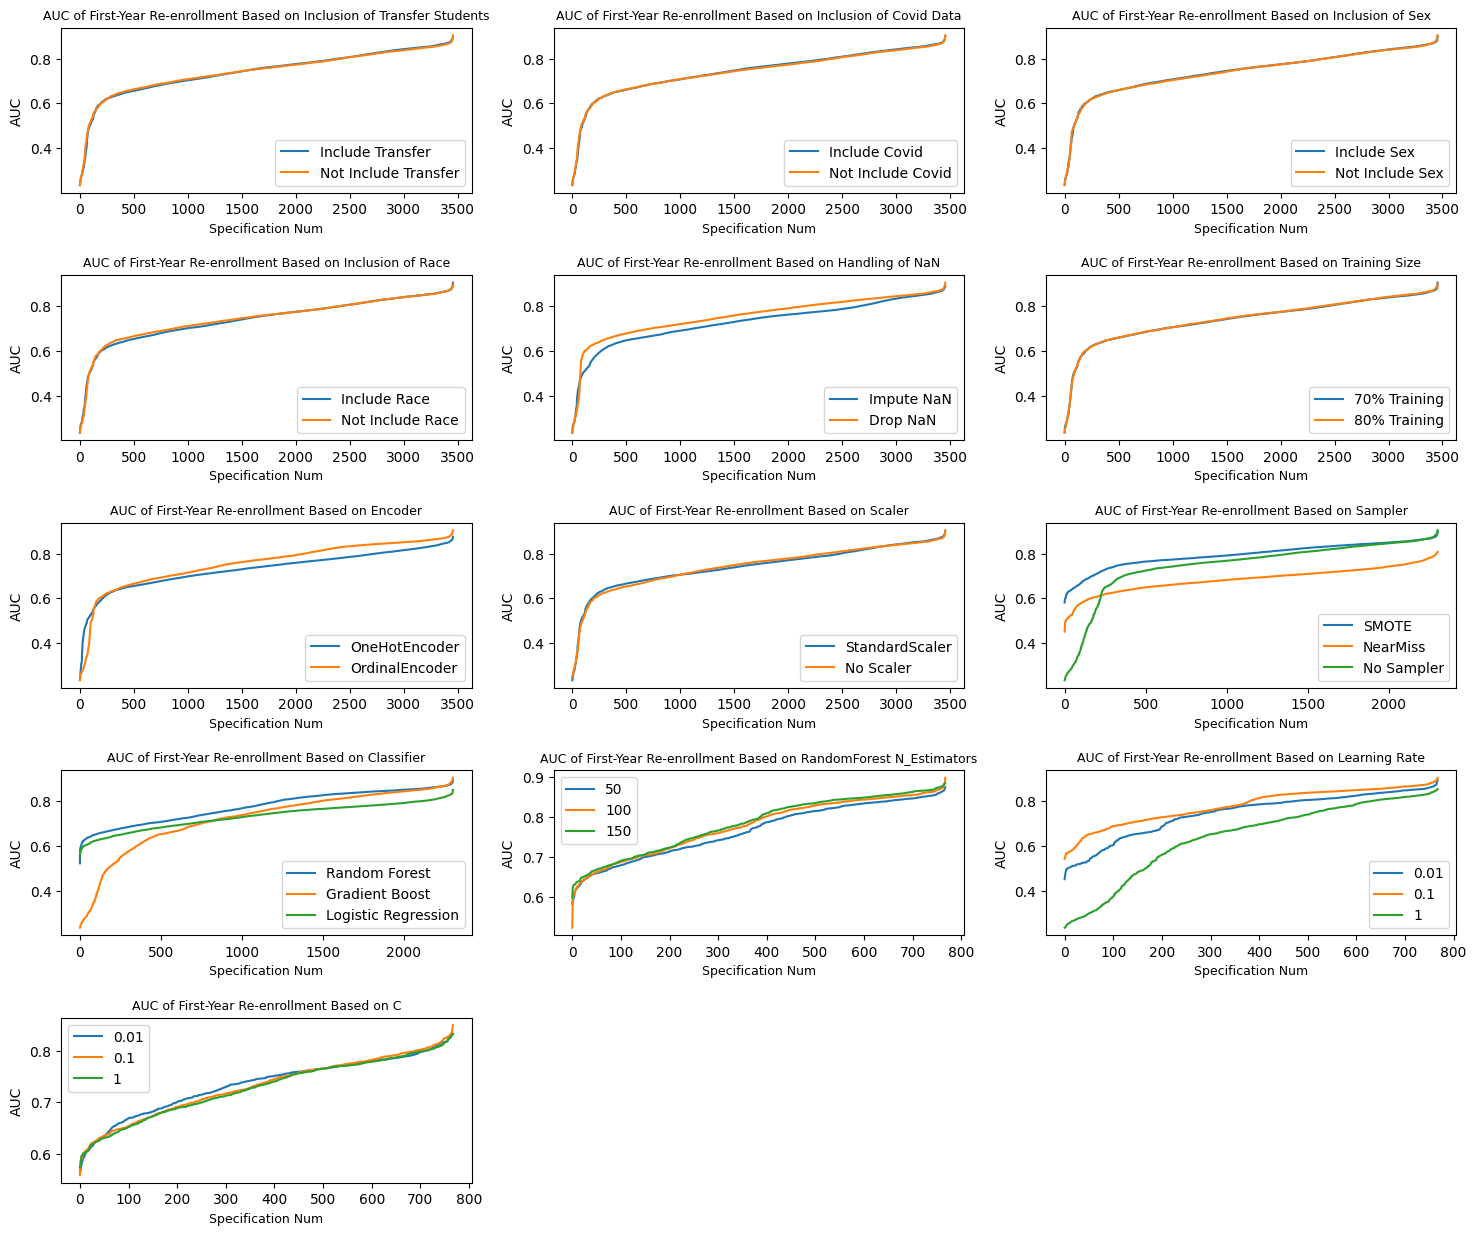

In [366]:
# Creating the subplots for AUC graph
fig, ax = plt.subplots(5, 3, figsize=(18,15))
plt.subplots_adjust(hspace=0.5)
fig.delaxes(ax[4, 1])
fig.delaxes(ax[4, 2])

# Plot Transfer
include_transfer = reenroll_sort_auc[reenroll_sort_auc['Include_Transfer'] == 1]['AUC']
not_include_transfer = reenroll_sort_auc[reenroll_sort_auc['Include_Transfer'] == 0]['AUC']
transfer_num = np.arange(len(include_transfer))
not_include_transfer_num= np.arange(len(not_include_transfer))


ax[0, 0].plot(transfer_num, include_transfer, label='Include Transfer')
ax[0, 0].plot(not_include_transfer_num, not_include_transfer, label='Not Include Transfer')
ax[0, 0].set_title("AUC of First-Year Re-enrollment Based on Inclusion of Transfer Students", fontsize=9)
ax[0, 0].set_xlabel("Specification Num", fontsize=9)
ax[0, 0].set_ylabel("AUC")
ax[0, 0].legend()

# Plot the separate subplot
save_single_box(ax[0,0], "graphs/AUC_Reenroll/AUC_Reenroll_Transfer.pdf")

# Plot Covid
include_covid = reenroll_sort_auc[reenroll_sort_auc['Include_Covid'] == 1]['AUC']
not_include_covid = reenroll_sort_auc[reenroll_sort_auc['Include_Covid'] == 0]['AUC']
covid_num = np.arange(len(include_covid))
not_include_covid_num= np.arange(len(not_include_covid_num))


ax[0, 1].plot(covid_num, include_covid, label='Include Covid')
ax[0, 1].plot(not_include_transfer_num, not_include_transfer, label='Not Include Covid')
ax[0, 1].set_title("AUC of First-Year Re-enrollment Based on Inclusion of Covid Data", fontsize=9)
ax[0, 1].set_xlabel("Specification Num", fontsize=9)
ax[0, 1].set_ylabel("AUC")
ax[0, 1].legend()
save_single_box(ax[0,1], "graphs/AUC_Reenroll/AUC_Reenroll_Covid.pdf")

# Plot Sex
include_sex = reenroll_sort_auc[reenroll_sort_auc['Include_Sex'] == 1]['AUC']
not_include_sex = reenroll_sort_auc[reenroll_sort_auc['Include_Sex'] ==  0]['AUC']
include_sex_num = np.arange(len(include_sex))
not_include_sex_num = np.arange(len(not_include_sex))


ax[0, 2].plot(include_sex_num, include_sex, label='Include Sex')
ax[0, 2].plot(not_include_sex_num, not_include_sex, label='Not Include Sex')
ax[0, 2].set_title("AUC of First-Year Re-enrollment Based on Inclusion of Sex", fontsize=9)
ax[0, 2].set_xlabel("Specification Num", fontsize=9)
ax[0, 2].set_ylabel("AUC")
ax[0, 2].legend()
save_single_box(ax[0,2], "graphs/AUC_Reenroll/AUC_Reenroll_Sex.pdf")

# Plot Race
include_race = reenroll_sort_auc[reenroll_sort_auc['Include_Race'] == 1]['AUC']
not_include_race = reenroll_sort_auc[reenroll_sort_auc['Include_Race'] == 0]['AUC']
include_race_num = np.arange(len(include_race))
not_include_race_num = np.arange(len(not_include_race))


ax[1, 0].plot(include_race_num, include_race, label='Include Race')
ax[1, 0].plot(not_include_race_num, not_include_race, label='Not Include Race')
ax[1, 0].set_title("AUC of First-Year Re-enrollment Based on Inclusion of Race", fontsize=9)
ax[1, 0].set_xlabel("Specification Num", fontsize=9)
ax[1, 0].set_ylabel("AUC")
ax[1, 0].legend()
save_single_box(ax[1,0], "graphs/AUC_Reenroll/AUC_Reenroll_Race.pdf")

# Plot Handle Nan
impute_nan = reenroll_sort_auc[reenroll_sort_auc['Handle_Nan'] == "Impute"]['AUC']
drop_nan = reenroll_sort_auc[reenroll_sort_auc['Handle_Nan'] == "Drop"]['AUC']
impute_nan_num = np.arange(len(impute_nan))
drop_nan_num = np.arange(len(drop_nan))


ax[1, 1].plot(impute_nan_num, impute_nan, label='Impute NaN')
ax[1, 1].plot(drop_nan_num, drop_nan, label='Drop NaN')
ax[1, 1].set_title("AUC of First-Year Re-enrollment Based on Handling of NaN", fontsize=9)
ax[1, 1].set_xlabel("Specification Num", fontsize=9)
ax[1, 1].set_ylabel("AUC")
ax[1, 1].legend()
save_single_box(ax[1,1], "graphs/AUC_Reenroll/AUC_Reenroll_NaN.pdf")

# Plot Train Size
train_07 = reenroll_sort_auc[reenroll_sort_auc['Train_Size'] == 0.7]['AUC']
train_08 = reenroll_sort_auc[reenroll_sort_auc['Train_Size'] == 0.8]['AUC']
train_07_num = np.arange(len(train_07))
train_08_num = np.arange(len(train_08))


ax[1, 2].plot(train_07_num, train_07, label='70% Training')
ax[1, 2].plot(train_08_num, train_08, label='80% Training')
ax[1, 2].set_title("AUC of First-Year Re-enrollment Based on Training Size", fontsize=9)
ax[1, 2].set_xlabel("Specification Num", fontsize=9)
ax[1, 2].set_ylabel("AUC")
ax[1, 2].legend()
save_single_box(ax[1,2], "graphs/AUC_Reenroll/AUC_Reenroll_TrainSize.pdf")


# Plot Encoder
onehot = reenroll_sort_auc[reenroll_sort_auc['Encoder'] == 'OneHotEncoder']['AUC']
ordinal = reenroll_sort_auc[reenroll_sort_auc['Encoder'] == 'OrdinalEncoder']['AUC']
onehot_num = np.arange(len(onehot))
ordinal_num = np.arange(len(ordinal))


ax[2, 0].plot(onehot_num, onehot, label='OneHotEncoder')
ax[2, 0].plot(ordinal_num, ordinal, label='OrdinalEncoder')
ax[2, 0].set_title("AUC of First-Year Re-enrollment Based on Encoder", fontsize=9)
ax[2, 0].set_xlabel("Specification Num", fontsize=9)
ax[2, 0].set_ylabel("AUC")
ax[2, 0].legend()
save_single_box(ax[2,0], "graphs/AUC_Reenroll/AUC_Reenroll_Encoder.pdf")

# Plot Scaler
standard = reenroll_sort_auc[reenroll_sort_auc['Scaler'] == 'StandardScaler']['AUC']
no_scaler = reenroll_sort_auc[reenroll_sort_auc['Scaler'].isna()]['AUC']
standard_num = np.arange(len(standard))
no_scaler_num = np.arange(len(no_scaler))


ax[2, 1].plot(standard_num, standard, label='StandardScaler')
ax[2, 1].plot(no_scaler_num, no_scaler, label='No Scaler')
ax[2, 1].set_title("AUC of First-Year Re-enrollment Based on Scaler", fontsize=9)
ax[2, 1].set_xlabel("Specification Num", fontsize=9)
ax[2, 1].set_ylabel("AUC")
ax[2, 1].legend()
save_single_box(ax[2,1], "graphs/AUC_Reenroll/AUC_Reenroll_Scaler.pdf")

# Plot Sampler
smote = reenroll_sort_auc[reenroll_sort_auc['Sampler'] == 'SMOTE']['AUC']
nearmiss = reenroll_sort_auc[reenroll_sort_auc['Sampler'] == "NearMiss"]['AUC']
no_sampler = reenroll_sort_auc[reenroll_sort_auc['Sampler'].isna()]['AUC']
smote_num = np.arange(len(smote))
nearmiss_num = np.arange(len(nearmiss))
no_sampler_num = np.arange(len(no_sampler))


ax[2, 2].plot(smote_num, smote, label='SMOTE')
ax[2, 2].plot(nearmiss_num, nearmiss, label='NearMiss')
ax[2, 2].plot(no_sampler_num, no_sampler, label='No Sampler')
ax[2, 2].set_title("AUC of First-Year Re-enrollment Based on Sampler", fontsize=9)
ax[2, 2].set_xlabel("Specification Num", fontsize=9)
ax[2, 2].set_ylabel("AUC")
ax[2, 2].legend()
save_single_box(ax[2,2], "graphs/AUC_Reenroll/AUC_Reenroll_Sampler.pdf")


# Plot Classifier
randomforest = reenroll_sort_auc[reenroll_sort_auc['Classifier'] == 'RandomForestClassifier']['AUC']
gradientboost = reenroll_sort_auc[reenroll_sort_auc['Classifier'] == "GradientBoostingClassifier"]['AUC']
logisticregression = reenroll_sort_auc[reenroll_sort_auc['Classifier'] == 'LogisticRegression']['AUC']
randomforest_num = np.arange(len(randomforest))
gradientboost_num = np.arange(len(gradientboost))
logisticregression_num = np.arange(len(logisticregression))


ax[3, 0].plot(randomforest_num, randomforest, label='Random Forest')
ax[3, 0].plot(gradientboost_num, gradientboost, label='Gradient Boost')
ax[3, 0].plot(logisticregression_num, logisticregression, label='Logistic Regression')
ax[3, 0].set_title("AUC of First-Year Re-enrollment Based on Classifier", fontsize=9)
ax[3, 0].set_xlabel("Specification Num", fontsize=9)
ax[3, 0].set_ylabel("AUC")
ax[3, 0].legend()
save_single_box(ax[3,0], "graphs/AUC_Reenroll/AUC_Reenroll_Classifier.pdf")

# Plot N_Estimators
fifty = reenroll_sort_auc[reenroll_sort_auc['N_Estimators'] == 50]['AUC']
onehundred = reenroll_sort_auc[reenroll_sort_auc['N_Estimators'] == 100]['AUC']
onefifty = reenroll_sort_auc[reenroll_sort_auc['N_Estimators'] == 150]['AUC']
fifty_num = np.arange(len(fifty))
onehundred_num = np.arange(len(onehundred))
onefifty_num = np.arange(len(onefifty))


ax[3, 1].plot(fifty_num, fifty, label='50')
ax[3, 1].plot(onehundred_num, onehundred, label='100')
ax[3, 1].plot(onefifty_num, onefifty, label='150')
ax[3, 1].set_title("AUC of First-Year Re-enrollment Based on RandomForest N_Estimators", fontsize=9)
ax[3, 1].set_xlabel("Specification Num", fontsize=9)
ax[3, 1].set_ylabel("AUC")
ax[3, 1].legend()
save_single_box(ax[3,1], "graphs/AUC_Reenroll/AUC_Reenroll_RandomForest_N_Estimators.pdf")

# Plot Learning Rate
rate_001 = reenroll_sort_auc[reenroll_sort_auc['Learning_Rate'] == 0.01]['AUC']
rate_01 = reenroll_sort_auc[reenroll_sort_auc['Learning_Rate'] == 0.1]['AUC']
rate_1 = reenroll_sort_auc[reenroll_sort_auc['Learning_Rate'] == 1]['AUC']
rate_001_num = np.arange(len(rate_001))
rate_01_num = np.arange(len(rate_01))
rate_1_num = np.arange(len(rate_1))


ax[3, 2].plot(rate_001_num, rate_001, label='0.01')
ax[3, 2].plot(rate_01_num, rate_01, label='0.1')
ax[3, 2].plot(rate_1_num, rate_1, label='1')
ax[3, 2].set_title("AUC of First-Year Re-enrollment Based on Learning Rate", fontsize=9)
ax[3, 2].set_xlabel("Specification Num", fontsize=9)
ax[3, 2].set_ylabel("AUC")
ax[3, 2].legend()
save_single_box(ax[3,2], "graphs/AUC_Reenroll/AUC_Reenroll_Learning_Rate.pdf")

# Plot C
c_001 = reenroll_sort_auc[reenroll_sort_auc['C'] == 0.01]['AUC']
c_01 = reenroll_sort_auc[reenroll_sort_auc['C'] == 0.1]['AUC']
c_1 = reenroll_sort_auc[reenroll_sort_auc['C'] == 1]['AUC']
c_001_num = np.arange(len(c_001))
c_01_num = np.arange(len(c_01))
c_1_num = np.arange(len(c_1))


ax[4, 0].plot(c_001_num, c_001, label='0.01')
ax[4, 0].plot(c_01_num, c_01, label='0.1')
ax[4, 0].plot(c_1_num, c_1, label='1')
ax[4, 0].set_title("AUC of First-Year Re-enrollment Based on C", fontsize=9)
ax[4, 0].set_xlabel("Specification Num", fontsize=9)
ax[4, 0].set_ylabel("AUC")
ax[4, 0].legend()
save_single_box(ax[4,0], "graphs/AUC_Reenroll/AUC_Reenroll_C.pdf")

fig.savefig("graphs/AUC_Reenroll/AUC_Reenroll_Overall.pdf")

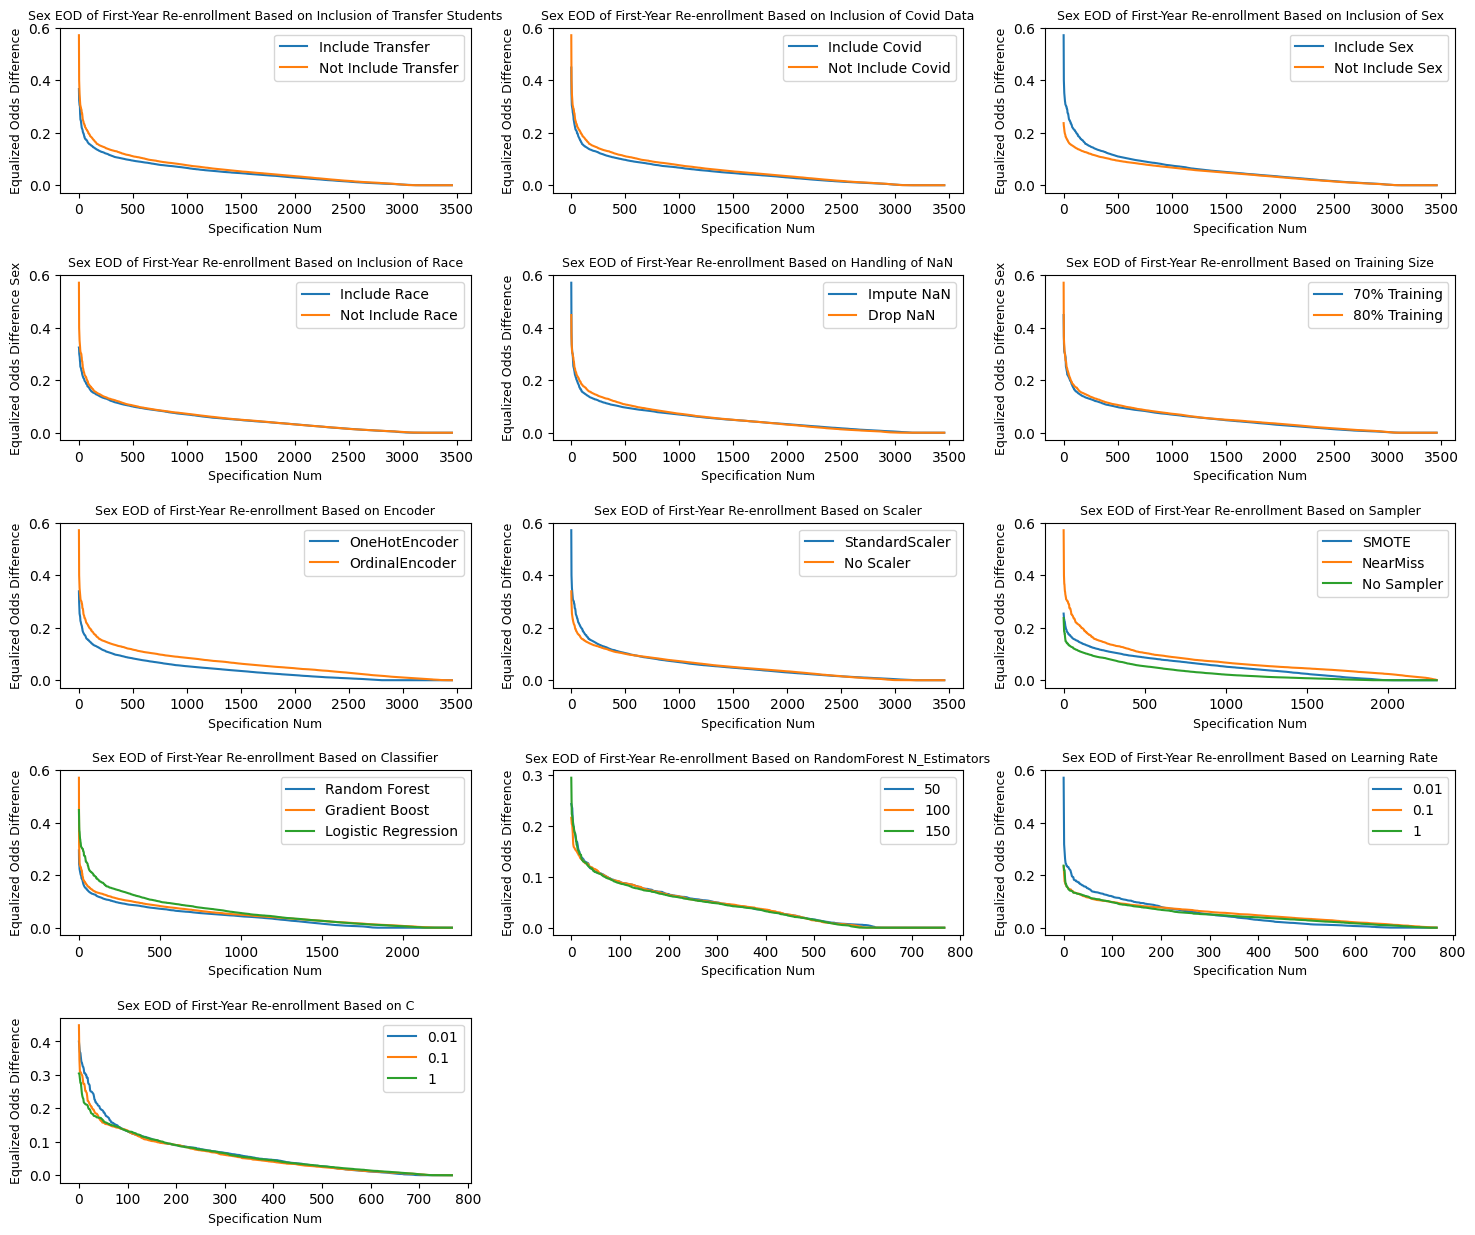

In [368]:
# Creating the subplots for Equalized Odds Difference Sex graph
fig, ax = plt.subplots(5, 3, figsize=(18,15))
plt.subplots_adjust(hspace=0.5)
fig.delaxes(ax[4, 1])
fig.delaxes(ax[4, 2])

# Plot Transfer
include_transfer = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Include_Transfer'] == 1]['Equalized_Odds_Difference_Sex']
not_include_transfer = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Include_Transfer'] == 0]['Equalized_Odds_Difference_Sex']
transfer_num = np.arange(len(include_transfer))
not_include_transfer_num= np.arange(len(not_include_transfer))


ax[0, 0].plot(transfer_num, include_transfer, label='Include Transfer')
ax[0, 0].plot(not_include_transfer_num, not_include_transfer, label='Not Include Transfer')
ax[0, 0].set_title("Sex EOD of First-Year Re-enrollment Based on Inclusion of Transfer Students", fontsize=9)
ax[0, 0].set_xlabel("Specification Num", fontsize=9)
ax[0, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[0, 0].legend()
save_single_box(ax[0,0], "graphs/EOD_Sex_Reenroll/EOD_Sex_Reenroll_Transfer.pdf")

# Plot Covid
include_covid = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Include_Covid'] == 1]['Equalized_Odds_Difference_Sex']
not_include_covid = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Include_Covid'] == 0]['Equalized_Odds_Difference_Sex']
covid_num = np.arange(len(include_covid))
not_include_covid_num= np.arange(len(not_include_covid_num))


ax[0, 1].plot(covid_num, include_covid, label='Include Covid')
ax[0, 1].plot(not_include_transfer_num, not_include_transfer, label='Not Include Covid')
ax[0, 1].set_title("Sex EOD of First-Year Re-enrollment Based on Inclusion of Covid Data", fontsize=9)
ax[0, 1].set_xlabel("Specification Num", fontsize=9)
ax[0, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[0, 1].legend()
save_single_box(ax[0,1], "graphs/EOD_Sex_Reenroll/EOD_Sex_Reenroll_Covid.pdf")

# Plot Sex
include_sex = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Include_Sex'] == 1]['Equalized_Odds_Difference_Sex']
not_include_sex = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Include_Sex'] ==  0]['Equalized_Odds_Difference_Sex']
include_sex_num = np.arange(len(include_sex))
not_include_sex_num = np.arange(len(not_include_sex))


ax[0, 2].plot(include_sex_num, include_sex, label='Include Sex')
ax[0, 2].plot(not_include_sex_num, not_include_sex, label='Not Include Sex')
ax[0, 2].set_title("Sex EOD of First-Year Re-enrollment Based on Inclusion of Sex", fontsize=9)
ax[0, 2].set_xlabel("Specification Num", fontsize=9)
ax[0, 2].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[0, 2].legend()
save_single_box(ax[0,2], "graphs/EOD_Sex_Reenroll/EOD_Sex_Reenroll_Sex.pdf")

# Plot Race
include_race = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Include_Race'] == 1]['Equalized_Odds_Difference_Sex']
not_include_race = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Include_Race'] == 0]['Equalized_Odds_Difference_Sex']
include_race_num = np.arange(len(include_race))
not_include_race_num = np.arange(len(not_include_race))


ax[1, 0].plot(include_race_num, include_race, label='Include Race')
ax[1, 0].plot(not_include_race_num, not_include_race, label='Not Include Race')
ax[1, 0].set_title("Sex EOD of First-Year Re-enrollment Based on Inclusion of Race", fontsize=9)
ax[1, 0].set_xlabel("Specification Num", fontsize=9)
ax[1, 0].set_ylabel("Equalized Odds Difference Sex", fontsize=9)
ax[1, 0].legend()
save_single_box(ax[1,0], "graphs/EOD_Sex_Reenroll/EOD_Sex_Reenroll_Race.pdf")

# Plot Handle Nan
impute_nan = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Handle_Nan'] == "Impute"]['Equalized_Odds_Difference_Sex']
drop_nan = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Handle_Nan'] == "Drop"]['Equalized_Odds_Difference_Sex']
impute_nan_num = np.arange(len(impute_nan))
drop_nan_num = np.arange(len(drop_nan))


ax[1, 1].plot(impute_nan_num, impute_nan, label='Impute NaN')
ax[1, 1].plot(drop_nan_num, drop_nan, label='Drop NaN')
ax[1, 1].set_title("Sex EOD of First-Year Re-enrollment Based on Handling of NaN", fontsize=9)
ax[1, 1].set_xlabel("Specification Num", fontsize=9)
ax[1, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[1, 1].legend()
save_single_box(ax[1,1], "graphs/EOD_Sex_Reenroll/EOD_Sex_Reenroll_NaN.pdf")

# Plot Train Size
train_07 = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Train_Size'] == 0.7]['Equalized_Odds_Difference_Sex']
train_08 = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Train_Size'] == 0.8]['Equalized_Odds_Difference_Sex']
train_07_num = np.arange(len(train_07))
train_08_num = np.arange(len(train_08))


ax[1, 2].plot(train_07_num, train_07, label='70% Training')
ax[1, 2].plot(train_08_num, train_08, label='80% Training')
ax[1, 2].set_title("Sex EOD of First-Year Re-enrollment Based on Training Size", fontsize=9)
ax[1, 2].set_xlabel("Specification Num", fontsize=9)
ax[1, 2].set_ylabel("Equalized Odds Difference Sex", fontsize=9)
ax[1, 2].legend()
save_single_box(ax[1,2], "graphs/EOD_Sex_Reenroll/EOD_Sex_Reenroll_TrainSize.pdf")


# Plot Encoder
onehot = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Encoder'] == 'OneHotEncoder']['Equalized_Odds_Difference_Sex']
ordinal = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Encoder'] == 'OrdinalEncoder']['Equalized_Odds_Difference_Sex']
onehot_num = np.arange(len(onehot))
ordinal_num = np.arange(len(ordinal))


ax[2, 0].plot(onehot_num, onehot, label='OneHotEncoder')
ax[2, 0].plot(ordinal_num, ordinal, label='OrdinalEncoder')
ax[2, 0].set_title("Sex EOD of First-Year Re-enrollment Based on Encoder", fontsize=9)
ax[2, 0].set_xlabel("Specification Num", fontsize=9)
ax[2, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[2, 0].legend()
save_single_box(ax[2,0], "graphs/EOD_Sex_Reenroll/EOD_Sex_Reenroll_Encoder.pdf")

# Plot Scaler
standard = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Scaler'] == 'StandardScaler']['Equalized_Odds_Difference_Sex']
no_scaler = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Scaler'].isna()]['Equalized_Odds_Difference_Sex']
standard_num = np.arange(len(standard))
no_scaler_num = np.arange(len(no_scaler))


ax[2, 1].plot(standard_num, standard, label='StandardScaler')
ax[2, 1].plot(no_scaler_num, no_scaler, label='No Scaler')
ax[2, 1].set_title("Sex EOD of First-Year Re-enrollment Based on Scaler", fontsize=9)
ax[2, 1].set_xlabel("Specification Num", fontsize=9)
ax[2, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[2, 1].legend()
save_single_box(ax[2,1], "graphs/EOD_Sex_Reenroll/EOD_Sex_Reenroll_Scaler.pdf")

# Plot Sampler
smote = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Sampler'] == 'SMOTE']['Equalized_Odds_Difference_Sex']
nearmiss = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Sampler'] == "NearMiss"]['Equalized_Odds_Difference_Sex']
no_sampler = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Sampler'].isna()]['Equalized_Odds_Difference_Sex']
smote_num = np.arange(len(smote))
nearmiss_num = np.arange(len(nearmiss))
no_sampler_num = np.arange(len(no_sampler))


ax[2, 2].plot(smote_num, smote, label='SMOTE')
ax[2, 2].plot(nearmiss_num, nearmiss, label='NearMiss')
ax[2, 2].plot(no_sampler_num, no_sampler, label='No Sampler')
ax[2, 2].set_title("Sex EOD of First-Year Re-enrollment Based on Sampler", fontsize=9)
ax[2, 2].set_xlabel("Specification Num", fontsize=9)
ax[2, 2].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[2, 2].legend()
save_single_box(ax[2,2], "graphs/EOD_Sex_Reenroll/EOD_Sex_Reenroll_Sampler.pdf")


# Plot Classifier
randomforest = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Classifier'] == 'RandomForestClassifier']['Equalized_Odds_Difference_Sex']
gradientboost = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Classifier'] == "GradientBoostingClassifier"]['Equalized_Odds_Difference_Sex']
logisticregression = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Classifier'] == 'LogisticRegression']['Equalized_Odds_Difference_Sex']
randomforest_num = np.arange(len(randomforest))
gradientboost_num = np.arange(len(gradientboost))
logisticregression_num = np.arange(len(logisticregression))


ax[3, 0].plot(randomforest_num, randomforest, label='Random Forest')
ax[3, 0].plot(gradientboost_num, gradientboost, label='Gradient Boost')
ax[3, 0].plot(logisticregression_num, logisticregression, label='Logistic Regression')
ax[3, 0].set_title("Sex EOD of First-Year Re-enrollment Based on Classifier", fontsize=9)
ax[3, 0].set_xlabel("Specification Num", fontsize=9)
ax[3, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[3, 0].legend()
save_single_box(ax[3,0], "graphs/EOD_Sex_Reenroll/EOD_Sex_Reenroll_Classifier.pdf")

# Plot N_Estimators
fifty = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['N_Estimators'] == 50]['Equalized_Odds_Difference_Sex']
onehundred = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['N_Estimators'] == 100]['Equalized_Odds_Difference_Sex']
onefifty = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['N_Estimators'] == 150]['Equalized_Odds_Difference_Sex']
fifty_num = np.arange(len(fifty))
onehundred_num = np.arange(len(onehundred))
onefifty_num = np.arange(len(onefifty))


ax[3, 1].plot(fifty_num, fifty, label='50')
ax[3, 1].plot(onehundred_num, onehundred, label='100')
ax[3, 1].plot(onefifty_num, onefifty, label='150')
ax[3, 1].set_title("Sex EOD of First-Year Re-enrollment Based on RandomForest N_Estimators", fontsize=9)
ax[3, 1].set_xlabel("Specification Num", fontsize=9)
ax[3, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[3, 1].legend()
save_single_box(ax[3,1], "graphs/EOD_Sex_Reenroll/EOD_Sex_Reenroll_RandomForest_N_Estimators.pdf")

# Plot Learning Rate
rate_001 = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Learning_Rate'] == 0.01]['Equalized_Odds_Difference_Sex']
rate_01 = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Learning_Rate'] == 0.1]['Equalized_Odds_Difference_Sex']
rate_1 = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['Learning_Rate'] == 1]['Equalized_Odds_Difference_Sex']
rate_001_num = np.arange(len(rate_001))
rate_01_num = np.arange(len(rate_01))
rate_1_num = np.arange(len(rate_1))


ax[3, 2].plot(rate_001_num, rate_001, label='0.01')
ax[3, 2].plot(rate_01_num, rate_01, label='0.1')
ax[3, 2].plot(rate_1_num, rate_1, label='1')
ax[3, 2].set_title("Sex EOD of First-Year Re-enrollment Based on Learning Rate", fontsize=9)
ax[3, 2].set_xlabel("Specification Num", fontsize=9)
ax[3, 2].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[3, 2].legend()
save_single_box(ax[3,2], "graphs/EOD_Sex_Reenroll/EOD_Sex_Reenroll_Learning_Rate.pdf")

# Plot C
c_001 = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['C'] == 0.01]['Equalized_Odds_Difference_Sex']
c_01 = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['C'] == 0.1]['Equalized_Odds_Difference_Sex']
c_1 = reenroll_sort_equalized_sex[reenroll_sort_equalized_sex['C'] == 1]['Equalized_Odds_Difference_Sex']
c_001_num = np.arange(len(c_001))
c_01_num = np.arange(len(c_01))
c_1_num = np.arange(len(c_1))


ax[4, 0].plot(c_001_num, c_001, label='0.01')
ax[4, 0].plot(c_01_num, c_01, label='0.1')
ax[4, 0].plot(c_1_num, c_1, label='1')
ax[4, 0].set_title("Sex EOD of First-Year Re-enrollment Based on C", fontsize=9)
ax[4, 0].set_xlabel("Specification Num", fontsize=9)
ax[4, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[4, 0].legend()
save_single_box(ax[4,0], "graphs/EOD_Sex_Reenroll/EOD_Sex_Reenroll_C.pdf")
fig.savefig("graphs/EOD_Sex_Reenroll/EOD_Sex_Reenroll_Overall.pdf")

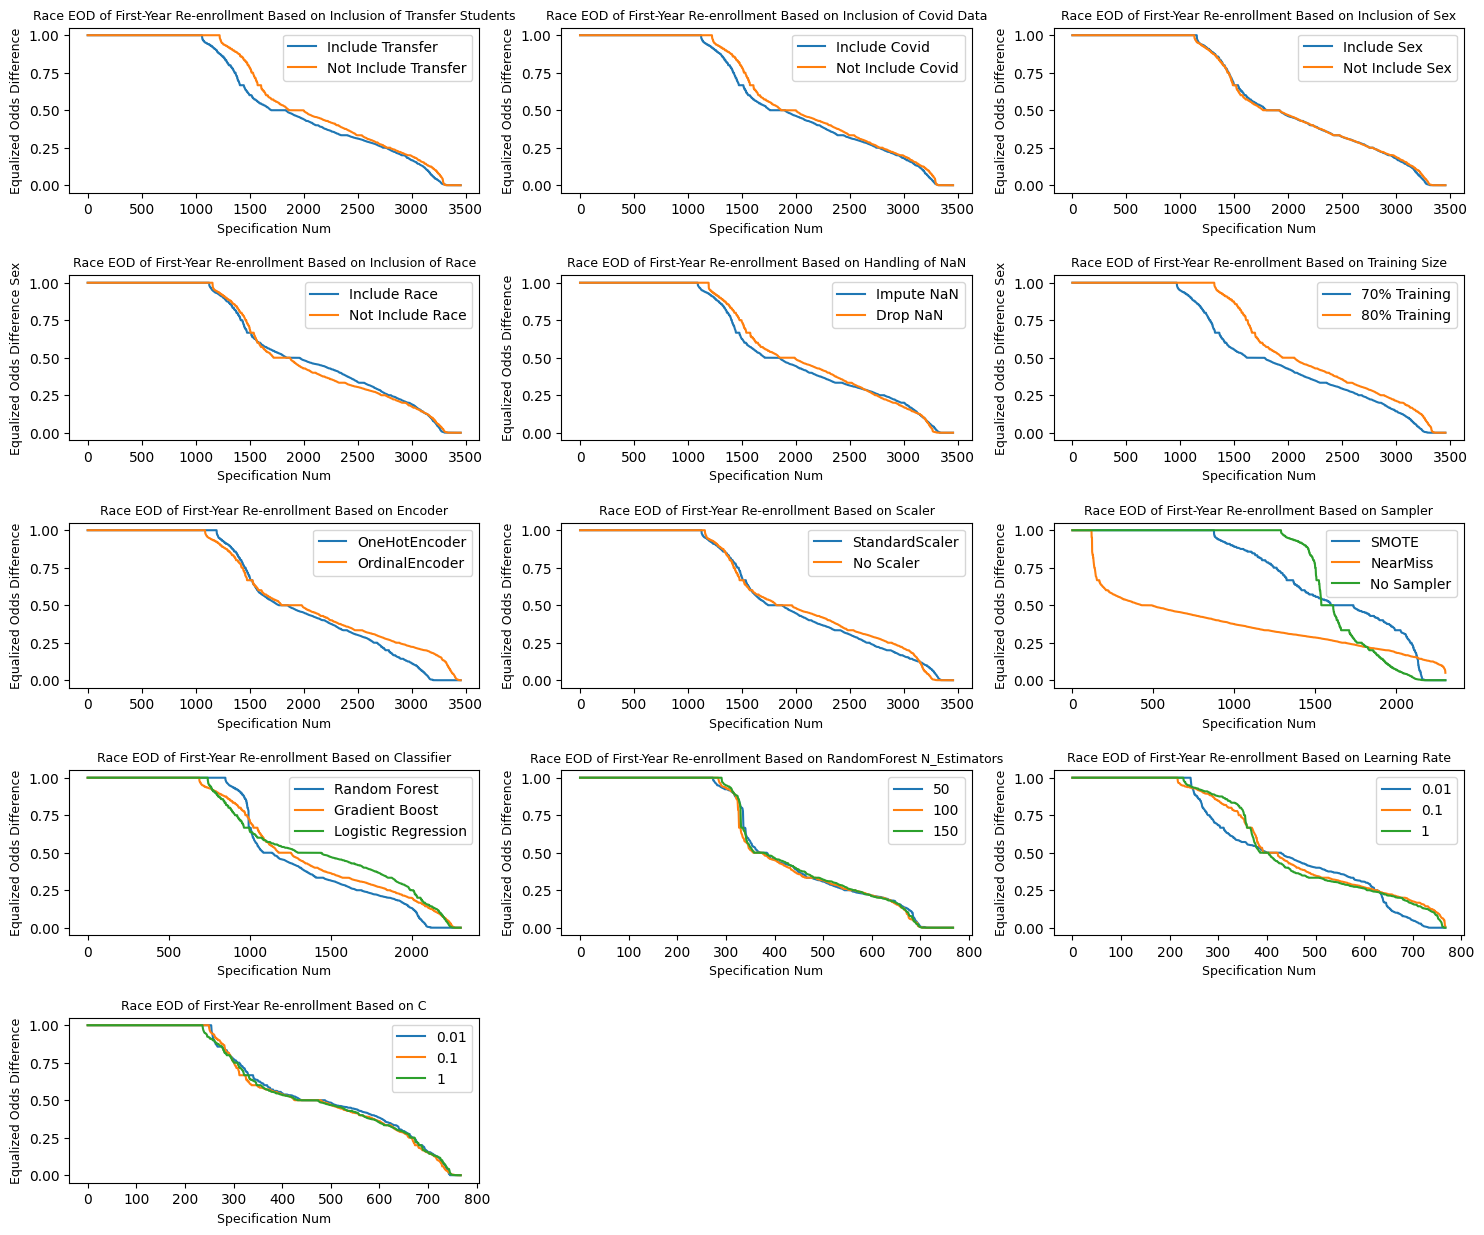

In [369]:
# Creating the subplots for Equalized Odds Difference Race graph
fig, ax = plt.subplots(5, 3, figsize=(18,15))
plt.subplots_adjust(hspace=0.5)
fig.delaxes(ax[4, 1])
fig.delaxes(ax[4, 2])

# Plot Transfer
include_transfer = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Include_Transfer'] == 1]['Equalized_Odds_Difference_Race']
not_include_transfer = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Include_Transfer'] == 0]['Equalized_Odds_Difference_Race']
transfer_num = np.arange(len(include_transfer))
not_include_transfer_num= np.arange(len(not_include_transfer))


ax[0, 0].plot(transfer_num, include_transfer, label='Include Transfer')
ax[0, 0].plot(not_include_transfer_num, not_include_transfer, label='Not Include Transfer')
ax[0, 0].set_title("Race EOD of First-Year Re-enrollment Based on Inclusion of Transfer Students", fontsize=9)
ax[0, 0].set_xlabel("Specification Num", fontsize=9)
ax[0, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[0, 0].legend()
save_single_box(ax[0,0], "graphs/EOD_Race_Reenroll/EOD_Race_Reenroll_Transfer.pdf")
# Plot Covid
include_covid = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Include_Covid'] == 1]['Equalized_Odds_Difference_Race']
not_include_covid = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Include_Covid'] == 0]['Equalized_Odds_Difference_Race']
covid_num = np.arange(len(include_covid))
not_include_covid_num= np.arange(len(not_include_covid_num))


ax[0, 1].plot(covid_num, include_covid, label='Include Covid')
ax[0, 1].plot(not_include_transfer_num, not_include_transfer, label='Not Include Covid')
ax[0, 1].set_title("Race EOD of First-Year Re-enrollment Based on Inclusion of Covid Data", fontsize=9)
ax[0, 1].set_xlabel("Specification Num", fontsize=9)
ax[0, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[0, 1].legend()
save_single_box(ax[0,1], "graphs/EOD_Race_Reenroll/EOD_Race_Reenroll_Covid.pdf")

# Plot Sex
include_sex = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Include_Sex'] == 1]['Equalized_Odds_Difference_Race']
not_include_sex = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Include_Sex'] ==  0]['Equalized_Odds_Difference_Race']
include_sex_num = np.arange(len(include_sex))
not_include_sex_num = np.arange(len(not_include_sex))


ax[0, 2].plot(include_sex_num, include_sex, label='Include Sex')
ax[0, 2].plot(not_include_sex_num, not_include_sex, label='Not Include Sex')
ax[0, 2].set_title("Race EOD of First-Year Re-enrollment Based on Inclusion of Sex", fontsize=9)
ax[0, 2].set_xlabel("Specification Num", fontsize=9)
ax[0, 2].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[0, 2].legend()
save_single_box(ax[0,2], "graphs/EOD_Race_Reenroll/EOD_Race_Reenroll_Sex.pdf")
# Plot Race
include_race = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Include_Race'] == 1]['Equalized_Odds_Difference_Race']
not_include_race = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Include_Race'] == 0]['Equalized_Odds_Difference_Race']
include_race_num = np.arange(len(include_race))
not_include_race_num = np.arange(len(not_include_race))


ax[1, 0].plot(include_race_num, include_race, label='Include Race')
ax[1, 0].plot(not_include_race_num, not_include_race, label='Not Include Race')
ax[1, 0].set_title("Race EOD of First-Year Re-enrollment Based on Inclusion of Race", fontsize=9)
ax[1, 0].set_xlabel("Specification Num", fontsize=9)
ax[1, 0].set_ylabel("Equalized Odds Difference Sex", fontsize=9)
ax[1, 0].legend()
save_single_box(ax[1,0], "graphs/EOD_Race_Reenroll/EOD_Race_Reenroll_Race.pdf")

# Plot Handle Nan
impute_nan = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Handle_Nan'] == "Impute"]['Equalized_Odds_Difference_Race']
drop_nan = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Handle_Nan'] == "Drop"]['Equalized_Odds_Difference_Race']
impute_nan_num = np.arange(len(impute_nan))
drop_nan_num = np.arange(len(drop_nan))


ax[1, 1].plot(impute_nan_num, impute_nan, label='Impute NaN')
ax[1, 1].plot(drop_nan_num, drop_nan, label='Drop NaN')
ax[1, 1].set_title("Race EOD of First-Year Re-enrollment Based on Handling of NaN", fontsize=9)
ax[1, 1].set_xlabel("Specification Num", fontsize=9)
ax[1, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[1, 1].legend()
save_single_box(ax[1,1], "graphs/EOD_Race_Reenroll/EOD_Race_Reenroll_NaN.pdf")

# Plot Train Size
train_07 = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Train_Size'] == 0.7]['Equalized_Odds_Difference_Race']
train_08 = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Train_Size'] == 0.8]['Equalized_Odds_Difference_Race']
train_07_num = np.arange(len(train_07))
train_08_num = np.arange(len(train_08))


ax[1, 2].plot(train_07_num, train_07, label='70% Training')
ax[1, 2].plot(train_08_num, train_08, label='80% Training')
ax[1, 2].set_title("Race EOD of First-Year Re-enrollment Based on Training Size", fontsize=9)
ax[1, 2].set_xlabel("Specification Num", fontsize=9)
ax[1, 2].set_ylabel("Equalized Odds Difference Sex", fontsize=9)
ax[1, 2].legend()
save_single_box(ax[1,2], "graphs/EOD_Race_Reenroll/EOD_Race_Reenroll_TrainSize.pdf")


# Plot Encoder
onehot = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Encoder'] == 'OneHotEncoder']['Equalized_Odds_Difference_Race']
ordinal = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Encoder'] == 'OrdinalEncoder']['Equalized_Odds_Difference_Race']
onehot_num = np.arange(len(onehot))
ordinal_num = np.arange(len(ordinal))


ax[2, 0].plot(onehot_num, onehot, label='OneHotEncoder')
ax[2, 0].plot(ordinal_num, ordinal, label='OrdinalEncoder')
ax[2, 0].set_title("Race EOD of First-Year Re-enrollment Based on Encoder", fontsize=9)
ax[2, 0].set_xlabel("Specification Num", fontsize=9)
ax[2, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[2, 0].legend()
save_single_box(ax[2,0], "graphs/EOD_Race_Reenroll/EOD_Race_Reenroll_Encoder.pdf")

# Plot Scaler
standard = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Scaler'] == 'StandardScaler']['Equalized_Odds_Difference_Race']
no_scaler = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Scaler'].isna()]['Equalized_Odds_Difference_Race']
standard_num = np.arange(len(standard))
no_scaler_num = np.arange(len(no_scaler))


ax[2, 1].plot(standard_num, standard, label='StandardScaler')
ax[2, 1].plot(no_scaler_num, no_scaler, label='No Scaler')
ax[2, 1].set_title("Race EOD of First-Year Re-enrollment Based on Scaler", fontsize=9)
ax[2, 1].set_xlabel("Specification Num", fontsize=9)
ax[2, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[2, 1].legend()
save_single_box(ax[2,1], "graphs/EOD_Race_Reenroll/EOD_Race_Reenroll_Scaler.pdf")

# Plot Sampler
smote = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Sampler'] == 'SMOTE']['Equalized_Odds_Difference_Race']
nearmiss = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Sampler'] == "NearMiss"]['Equalized_Odds_Difference_Race']
no_sampler = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Sampler'].isna()]['Equalized_Odds_Difference_Race']
smote_num = np.arange(len(smote))
nearmiss_num = np.arange(len(nearmiss))
no_sampler_num = np.arange(len(no_sampler))


ax[2, 2].plot(smote_num, smote, label='SMOTE')
ax[2, 2].plot(nearmiss_num, nearmiss, label='NearMiss')
ax[2, 2].plot(no_sampler_num, no_sampler, label='No Sampler')
ax[2, 2].set_title("Race EOD of First-Year Re-enrollment Based on Sampler", fontsize=9)
ax[2, 2].set_xlabel("Specification Num", fontsize=9)
ax[2, 2].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[2, 2].legend()
save_single_box(ax[2,2], "graphs/EOD_Race_Reenroll/EOD_Race_Reenroll_Sampler.pdf")


# Plot Classifier
randomforest = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Classifier'] == 'RandomForestClassifier']['Equalized_Odds_Difference_Race']
gradientboost = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Classifier'] == "GradientBoostingClassifier"]['Equalized_Odds_Difference_Race']
logisticregression = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Classifier'] == 'LogisticRegression']['Equalized_Odds_Difference_Race']
randomforest_num = np.arange(len(randomforest))
gradientboost_num = np.arange(len(gradientboost))
logisticregression_num = np.arange(len(logisticregression))


ax[3, 0].plot(randomforest_num, randomforest, label='Random Forest')
ax[3, 0].plot(gradientboost_num, gradientboost, label='Gradient Boost')
ax[3, 0].plot(logisticregression_num, logisticregression, label='Logistic Regression')
ax[3, 0].set_title("Race EOD of First-Year Re-enrollment Based on Classifier", fontsize=9)
ax[3, 0].set_xlabel("Specification Num", fontsize=9)
ax[3, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[3, 0].legend()
save_single_box(ax[3,0], "graphs/EOD_Race_Reenroll/EOD_Race_Reenroll_Classifier.pdf")

# Plot N_Estimators
fifty = reenroll_sort_equalized_race[reenroll_sort_equalized_race['N_Estimators'] == 50]['Equalized_Odds_Difference_Race']
onehundred = reenroll_sort_equalized_race[reenroll_sort_equalized_race['N_Estimators'] == 100]['Equalized_Odds_Difference_Race']
onefifty = reenroll_sort_equalized_race[reenroll_sort_equalized_race['N_Estimators'] == 150]['Equalized_Odds_Difference_Race']
fifty_num = np.arange(len(fifty))
onehundred_num = np.arange(len(onehundred))
onefifty_num = np.arange(len(onefifty))


ax[3, 1].plot(fifty_num, fifty, label='50')
ax[3, 1].plot(onehundred_num, onehundred, label='100')
ax[3, 1].plot(onefifty_num, onefifty, label='150')
ax[3, 1].set_title("Race EOD of First-Year Re-enrollment Based on RandomForest N_Estimators", fontsize=9)
ax[3, 1].set_xlabel("Specification Num", fontsize=9)
ax[3, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[3, 1].legend()
save_single_box(ax[3,1], "graphs/EOD_Race_Reenroll/EOD_Race_Reenroll_RandomForest_N_Estimators.pdf")

# Plot Learning Rate
rate_001 = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Learning_Rate'] == 0.01]['Equalized_Odds_Difference_Race']
rate_01 = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Learning_Rate'] == 0.1]['Equalized_Odds_Difference_Race']
rate_1 = reenroll_sort_equalized_race[reenroll_sort_equalized_race['Learning_Rate'] == 1]['Equalized_Odds_Difference_Race']
rate_001_num = np.arange(len(rate_001))
rate_01_num = np.arange(len(rate_01))
rate_1_num = np.arange(len(rate_1))


ax[3, 2].plot(rate_001_num, rate_001, label='0.01')
ax[3, 2].plot(rate_01_num, rate_01, label='0.1')
ax[3, 2].plot(rate_1_num, rate_1, label='1')
ax[3, 2].set_title("Race EOD of First-Year Re-enrollment Based on Learning Rate", fontsize=9)
ax[3, 2].set_xlabel("Specification Num", fontsize=9)
ax[3, 2].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[3, 2].legend()
save_single_box(ax[3,2], "graphs/EOD_Race_Reenroll/EOD_Race_Reenroll_Learning_Rate.pdf")

# Plot C
c_001 = reenroll_sort_equalized_race[reenroll_sort_equalized_race['C'] == 0.01]['Equalized_Odds_Difference_Race']
c_01 = reenroll_sort_equalized_race[reenroll_sort_equalized_race['C'] == 0.1]['Equalized_Odds_Difference_Race']
c_1 = reenroll_sort_equalized_race[reenroll_sort_equalized_race['C'] == 1]['Equalized_Odds_Difference_Race']
c_001_num = np.arange(len(c_001))
c_01_num = np.arange(len(c_01))
c_1_num = np.arange(len(c_1))


ax[4, 0].plot(c_001_num, c_001, label='0.01')
ax[4, 0].plot(c_01_num, c_01, label='0.1')
ax[4, 0].plot(c_1_num, c_1, label='1')
ax[4, 0].set_title("Race EOD of First-Year Re-enrollment Based on C", fontsize=9)
ax[4, 0].set_xlabel("Specification Num", fontsize=9)
ax[4, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[4, 0].legend()
save_single_box(ax[4,0], "graphs/EOD_Race_Reenroll/EOD_Race_Reenroll_C.pdf")
fig.savefig("graphs/EOD_Race_Reenroll/EOD_Race_Reenroll_Overall.pdf")

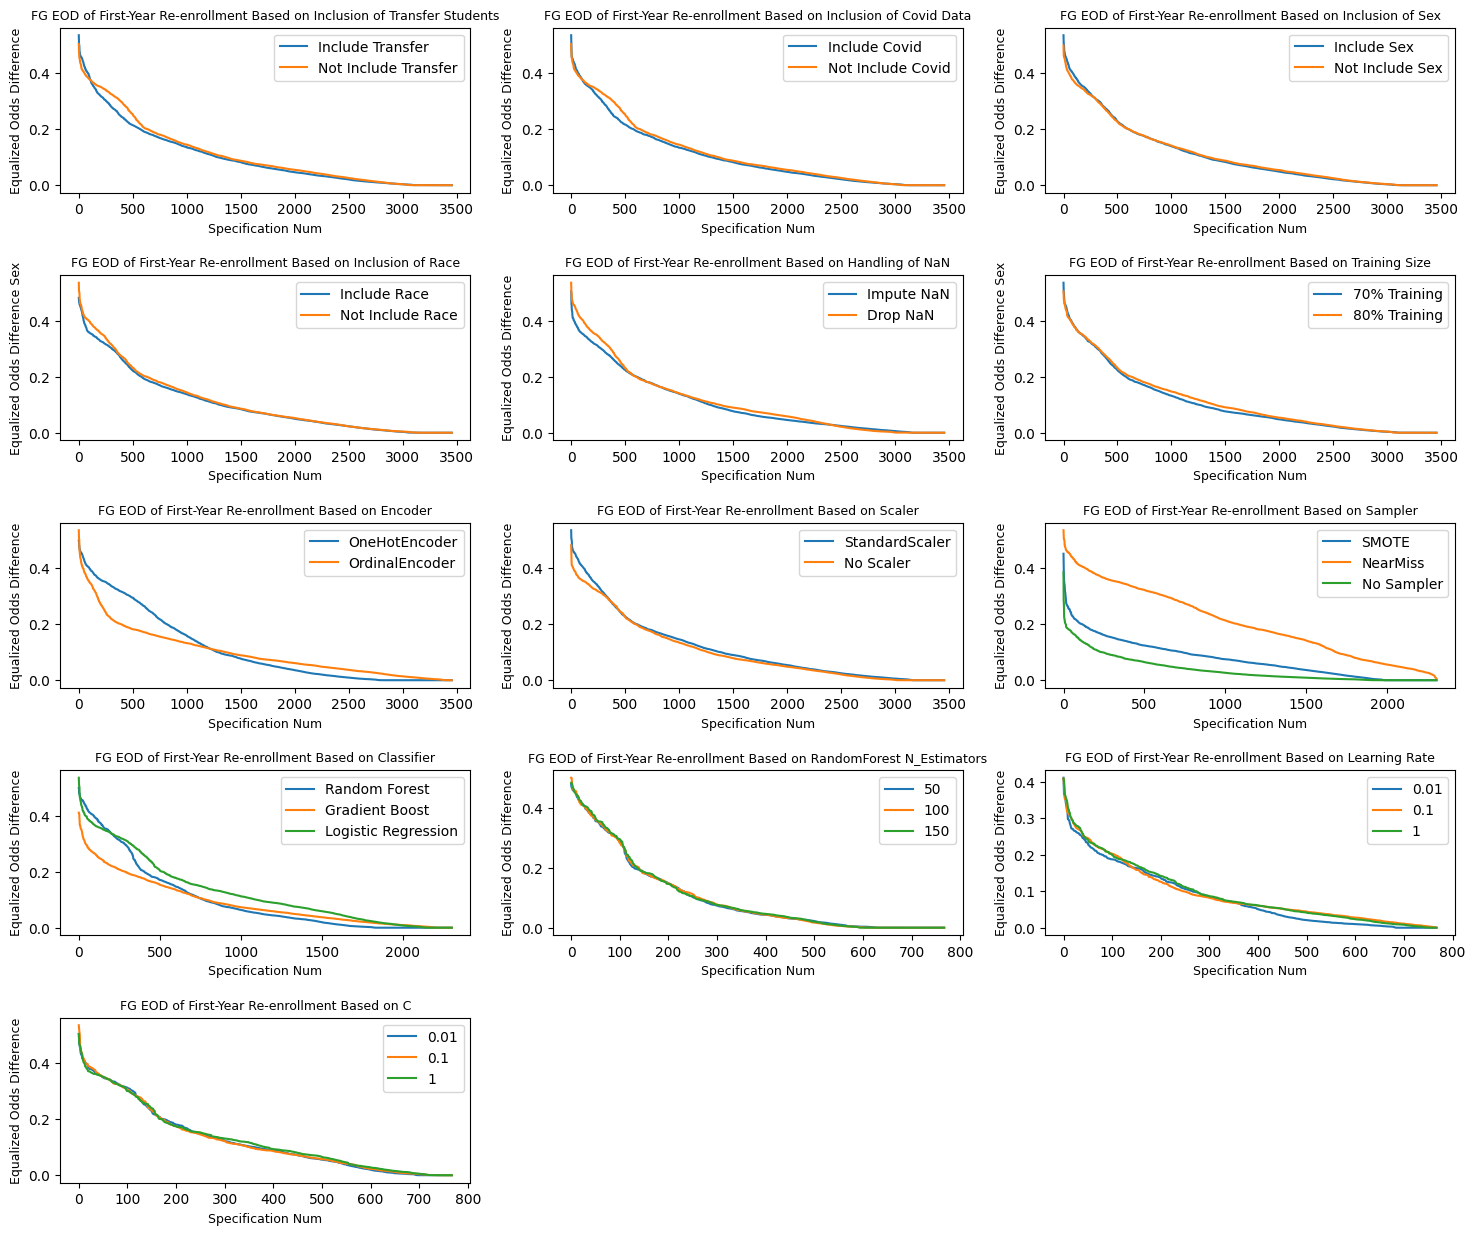

In [344]:
# Creating the subplots for Equalized Odds Difference FG graph
fig, ax = plt.subplots(5, 3, figsize=(18,15))
plt.subplots_adjust(hspace=0.5)
fig.delaxes(ax[4, 1])
fig.delaxes(ax[4, 2])

# Plot Transfer
include_transfer = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Include_Transfer'] == 1]['Equalized_Odds_Difference_FG']
not_include_transfer = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Include_Transfer'] == 0]['Equalized_Odds_Difference_FG']
transfer_num = np.arange(len(include_transfer))
not_include_transfer_num= np.arange(len(not_include_transfer))


ax[0, 0].plot(transfer_num, include_transfer, label='Include Transfer')
ax[0, 0].plot(not_include_transfer_num, not_include_transfer, label='Not Include Transfer')
ax[0, 0].set_title("FG EOD of First-Year Re-enrollment Based on Inclusion of Transfer Students", fontsize=9)
ax[0, 0].set_xlabel("Specification Num", fontsize=9)
ax[0, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[0, 0].legend()

# Plot Covid
include_covid = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Include_Covid'] == 1]['Equalized_Odds_Difference_FG']
not_include_covid = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Include_Covid'] == 0]['Equalized_Odds_Difference_FG']
covid_num = np.arange(len(include_covid))
not_include_covid_num= np.arange(len(not_include_covid_num))


ax[0, 1].plot(covid_num, include_covid, label='Include Covid')
ax[0, 1].plot(not_include_transfer_num, not_include_transfer, label='Not Include Covid')
ax[0, 1].set_title("FG EOD of First-Year Re-enrollment Based on Inclusion of Covid Data", fontsize=9)
ax[0, 1].set_xlabel("Specification Num", fontsize=9)
ax[0, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[0, 1].legend()


# Plot Sex
include_sex = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Include_Sex'] == 1]['Equalized_Odds_Difference_FG']
not_include_sex = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Include_Sex'] ==  0]['Equalized_Odds_Difference_FG']
include_sex_num = np.arange(len(include_sex))
not_include_sex_num = np.arange(len(not_include_sex))


ax[0, 2].plot(include_sex_num, include_sex, label='Include Sex')
ax[0, 2].plot(not_include_sex_num, not_include_sex, label='Not Include Sex')
ax[0, 2].set_title("FG EOD of First-Year Re-enrollment Based on Inclusion of Sex", fontsize=9)
ax[0, 2].set_xlabel("Specification Num", fontsize=9)
ax[0, 2].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[0, 2].legend()

# Plot Race
include_race = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Include_Race'] == 1]['Equalized_Odds_Difference_FG']
not_include_race = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Include_Race'] == 0]['Equalized_Odds_Difference_FG']
include_race_num = np.arange(len(include_race))
not_include_race_num = np.arange(len(not_include_race))


ax[1, 0].plot(include_race_num, include_race, label='Include Race')
ax[1, 0].plot(not_include_race_num, not_include_race, label='Not Include Race')
ax[1, 0].set_title("FG EOD of First-Year Re-enrollment Based on Inclusion of Race", fontsize=9)
ax[1, 0].set_xlabel("Specification Num", fontsize=9)
ax[1, 0].set_ylabel("Equalized Odds Difference Sex", fontsize=9)
ax[1, 0].legend()


# Plot Handle Nan
impute_nan = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Handle_Nan'] == "Impute"]['Equalized_Odds_Difference_FG']
drop_nan = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Handle_Nan'] == "Drop"]['Equalized_Odds_Difference_FG']
impute_nan_num = np.arange(len(impute_nan))
drop_nan_num = np.arange(len(drop_nan))


ax[1, 1].plot(impute_nan_num, impute_nan, label='Impute NaN')
ax[1, 1].plot(drop_nan_num, drop_nan, label='Drop NaN')
ax[1, 1].set_title("FG EOD of First-Year Re-enrollment Based on Handling of NaN", fontsize=9)
ax[1, 1].set_xlabel("Specification Num", fontsize=9)
ax[1, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[1, 1].legend()


# Plot Train Size
train_07 = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Train_Size'] == 0.7]['Equalized_Odds_Difference_FG']
train_08 = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Train_Size'] == 0.8]['Equalized_Odds_Difference_FG']
train_07_num = np.arange(len(train_07))
train_08_num = np.arange(len(train_08))


ax[1, 2].plot(train_07_num, train_07, label='70% Training')
ax[1, 2].plot(train_08_num, train_08, label='80% Training')
ax[1, 2].set_title("FG EOD of First-Year Re-enrollment Based on Training Size", fontsize=9)
ax[1, 2].set_xlabel("Specification Num", fontsize=9)
ax[1, 2].set_ylabel("Equalized Odds Difference Sex", fontsize=9)
ax[1, 2].legend()



# Plot Encoder
onehot = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Encoder'] == 'OneHotEncoder']['Equalized_Odds_Difference_FG']
ordinal = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Encoder'] == 'OrdinalEncoder']['Equalized_Odds_Difference_FG']
onehot_num = np.arange(len(onehot))
ordinal_num = np.arange(len(ordinal))


ax[2, 0].plot(onehot_num, onehot, label='OneHotEncoder')
ax[2, 0].plot(ordinal_num, ordinal, label='OrdinalEncoder')
ax[2, 0].set_title("FG EOD of First-Year Re-enrollment Based on Encoder", fontsize=9)
ax[2, 0].set_xlabel("Specification Num", fontsize=9)
ax[2, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[2, 0].legend()


# Plot Scaler
standard = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Scaler'] == 'StandardScaler']['Equalized_Odds_Difference_FG']
no_scaler = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Scaler'].isna()]['Equalized_Odds_Difference_FG']
standard_num = np.arange(len(standard))
no_scaler_num = np.arange(len(no_scaler))


ax[2, 1].plot(standard_num, standard, label='StandardScaler')
ax[2, 1].plot(no_scaler_num, no_scaler, label='No Scaler')
ax[2, 1].set_title("FG EOD of First-Year Re-enrollment Based on Scaler", fontsize=9)
ax[2, 1].set_xlabel("Specification Num", fontsize=9)
ax[2, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[2, 1].legend()


# Plot Sampler
smote = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Sampler'] == 'SMOTE']['Equalized_Odds_Difference_FG']
nearmiss = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Sampler'] == "NearMiss"]['Equalized_Odds_Difference_FG']
no_sampler = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Sampler'].isna()]['Equalized_Odds_Difference_FG']
smote_num = np.arange(len(smote))
nearmiss_num = np.arange(len(nearmiss))
no_sampler_num = np.arange(len(no_sampler))


ax[2, 2].plot(smote_num, smote, label='SMOTE')
ax[2, 2].plot(nearmiss_num, nearmiss, label='NearMiss')
ax[2, 2].plot(no_sampler_num, no_sampler, label='No Sampler')
ax[2, 2].set_title("FG EOD of First-Year Re-enrollment Based on Sampler", fontsize=9)
ax[2, 2].set_xlabel("Specification Num", fontsize=9)
ax[2, 2].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[2, 2].legend()



# Plot Classifier
randomforest = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Classifier'] == 'RandomForestClassifier']['Equalized_Odds_Difference_FG']
gradientboost = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Classifier'] == "GradientBoostingClassifier"]['Equalized_Odds_Difference_FG']
logisticregression = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Classifier'] == 'LogisticRegression']['Equalized_Odds_Difference_FG']
randomforest_num = np.arange(len(randomforest))
gradientboost_num = np.arange(len(gradientboost))
logisticregression_num = np.arange(len(logisticregression))


ax[3, 0].plot(randomforest_num, randomforest, label='Random Forest')
ax[3, 0].plot(gradientboost_num, gradientboost, label='Gradient Boost')
ax[3, 0].plot(logisticregression_num, logisticregression, label='Logistic Regression')
ax[3, 0].set_title("FG EOD of First-Year Re-enrollment Based on Classifier", fontsize=9)
ax[3, 0].set_xlabel("Specification Num", fontsize=9)
ax[3, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[3, 0].legend()


# Plot N_Estimators
fifty = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['N_Estimators'] == 50]['Equalized_Odds_Difference_FG']
onehundred = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['N_Estimators'] == 100]['Equalized_Odds_Difference_FG']
onefifty = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['N_Estimators'] == 150]['Equalized_Odds_Difference_FG']
fifty_num = np.arange(len(fifty))
onehundred_num = np.arange(len(onehundred))
onefifty_num = np.arange(len(onefifty))


ax[3, 1].plot(fifty_num, fifty, label='50')
ax[3, 1].plot(onehundred_num, onehundred, label='100')
ax[3, 1].plot(onefifty_num, onefifty, label='150')
ax[3, 1].set_title("FG EOD of First-Year Re-enrollment Based on RandomForest N_Estimators", fontsize=9)
ax[3, 1].set_xlabel("Specification Num", fontsize=9)
ax[3, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[3, 1].legend()


# Plot Learning Rate
rate_001 = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Learning_Rate'] == 0.01]['Equalized_Odds_Difference_FG']
rate_01 = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Learning_Rate'] == 0.1]['Equalized_Odds_Difference_FG']
rate_1 = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['Learning_Rate'] == 1]['Equalized_Odds_Difference_FG']
rate_001_num = np.arange(len(rate_001))
rate_01_num = np.arange(len(rate_01))
rate_1_num = np.arange(len(rate_1))


ax[3, 2].plot(rate_001_num, rate_001, label='0.01')
ax[3, 2].plot(rate_01_num, rate_01, label='0.1')
ax[3, 2].plot(rate_1_num, rate_1, label='1')
ax[3, 2].set_title("FG EOD of First-Year Re-enrollment Based on Learning Rate", fontsize=9)
ax[3, 2].set_xlabel("Specification Num", fontsize=9)
ax[3, 2].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[3, 2].legend()


# Plot C
c_001 = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['C'] == 0.01]['Equalized_Odds_Difference_FG']
c_01 = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['C'] == 0.1]['Equalized_Odds_Difference_FG']
c_1 = reenroll_sort_equalized_fg[reenroll_sort_equalized_fg['C'] == 1]['Equalized_Odds_Difference_FG']
c_001_num = np.arange(len(c_001))
c_01_num = np.arange(len(c_01))
c_1_num = np.arange(len(c_1))


ax[4, 0].plot(c_001_num, c_001, label='0.01')
ax[4, 0].plot(c_01_num, c_01, label='0.1')
ax[4, 0].plot(c_1_num, c_1, label='1')
ax[4, 0].set_title("FG EOD of First-Year Re-enrollment Based on C", fontsize=9)
ax[4, 0].set_xlabel("Specification Num", fontsize=9)
ax[4, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[4, 0].legend()

fig.savefig("graphs/EOD_FG_Re-Enroll.png")

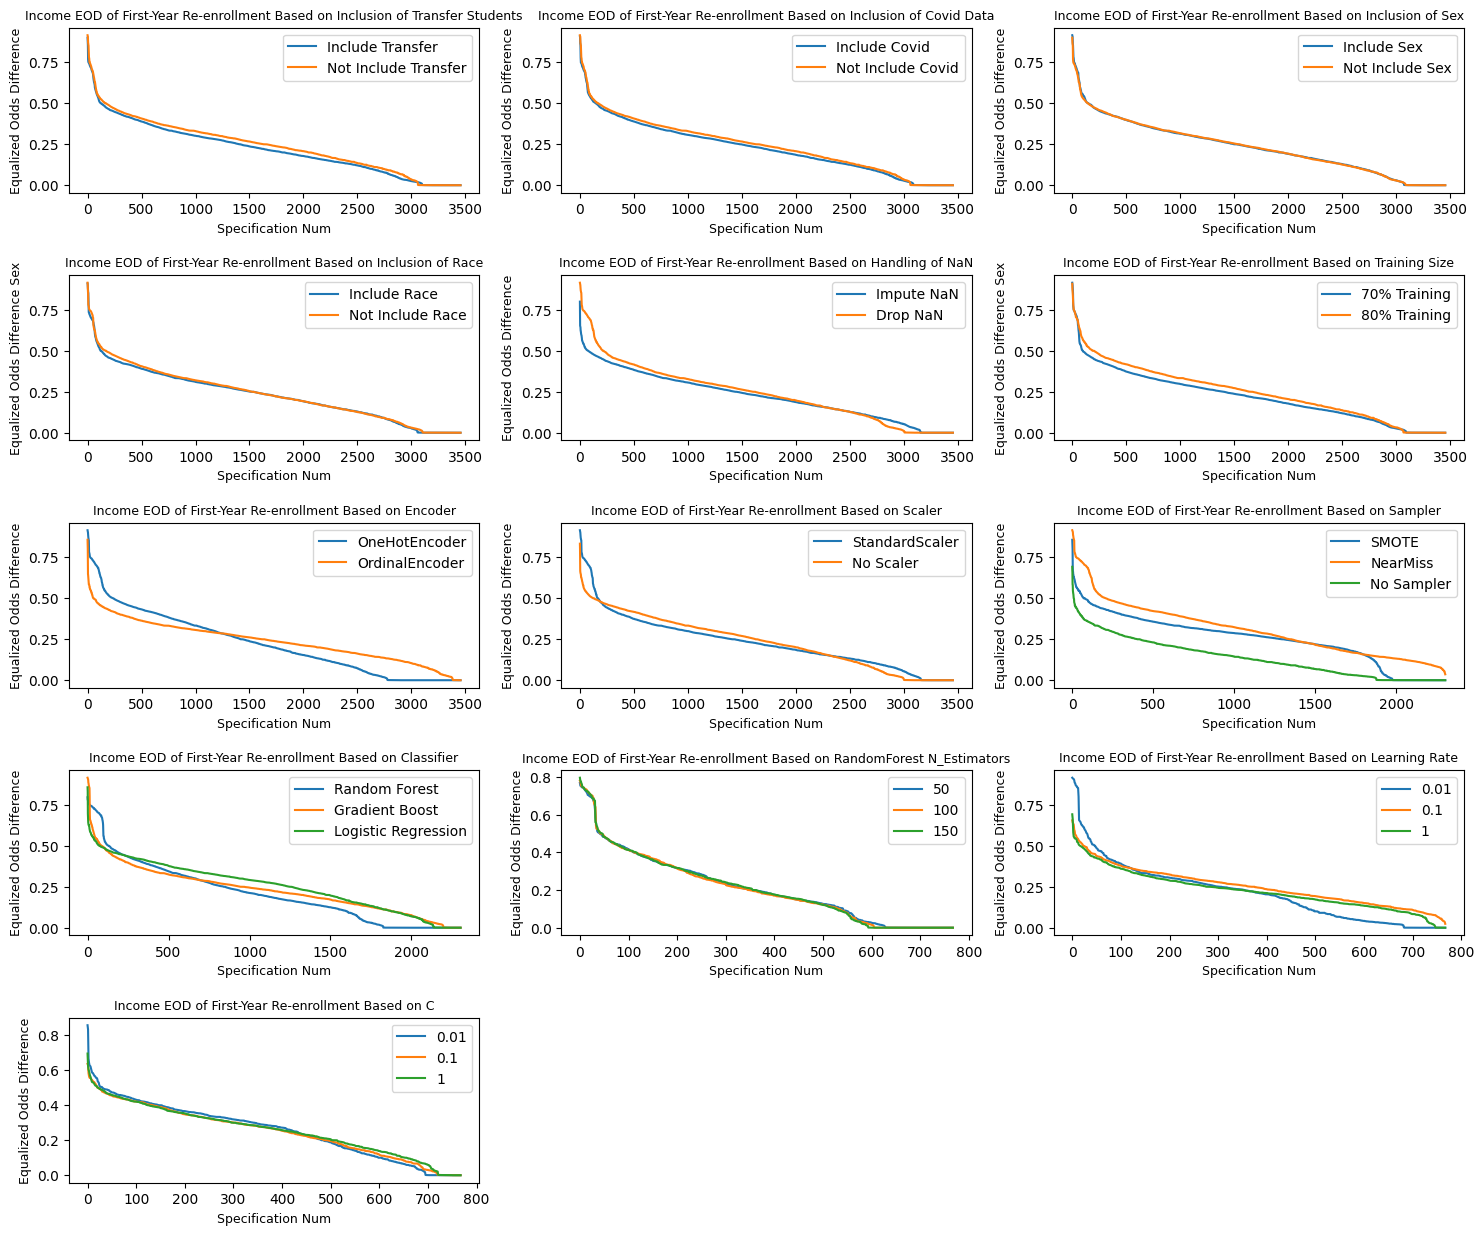

In [345]:
# Creating the subplots for Equalized Odds Difference Income graph
fig, ax = plt.subplots(5, 3, figsize=(18,15))
plt.subplots_adjust(hspace=0.5)
fig.delaxes(ax[4, 1])
fig.delaxes(ax[4, 2])

# Plot Transfer
include_transfer = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Include_Transfer'] == 1]['Equalized_Odds_Difference_Income']
not_include_transfer = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Include_Transfer'] == 0]['Equalized_Odds_Difference_Income']
transfer_num = np.arange(len(include_transfer))
not_include_transfer_num= np.arange(len(not_include_transfer))


ax[0, 0].plot(transfer_num, include_transfer, label='Include Transfer')
ax[0, 0].plot(not_include_transfer_num, not_include_transfer, label='Not Include Transfer')
ax[0, 0].set_title("Income EOD of First-Year Re-enrollment Based on Inclusion of Transfer Students", fontsize=9)
ax[0, 0].set_xlabel("Specification Num", fontsize=9)
ax[0, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[0, 0].legend()

# Plot Covid
include_covid = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Include_Covid'] == 1]['Equalized_Odds_Difference_Income']
not_include_covid = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Include_Covid'] == 0]['Equalized_Odds_Difference_Income']
covid_num = np.arange(len(include_covid))
not_include_covid_num= np.arange(len(not_include_covid_num))


ax[0, 1].plot(covid_num, include_covid, label='Include Covid')
ax[0, 1].plot(not_include_transfer_num, not_include_transfer, label='Not Include Covid')
ax[0, 1].set_title("Income EOD of First-Year Re-enrollment Based on Inclusion of Covid Data", fontsize=9)
ax[0, 1].set_xlabel("Specification Num", fontsize=9)
ax[0, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[0, 1].legend()


# Plot Sex
include_sex = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Include_Sex'] == 1]['Equalized_Odds_Difference_Income']
not_include_sex = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Include_Sex'] ==  0]['Equalized_Odds_Difference_Income']
include_sex_num = np.arange(len(include_sex))
not_include_sex_num = np.arange(len(not_include_sex))


ax[0, 2].plot(include_sex_num, include_sex, label='Include Sex')
ax[0, 2].plot(not_include_sex_num, not_include_sex, label='Not Include Sex')
ax[0, 2].set_title("Income EOD of First-Year Re-enrollment Based on Inclusion of Sex", fontsize=9)
ax[0, 2].set_xlabel("Specification Num", fontsize=9)
ax[0, 2].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[0, 2].legend()

# Plot Race
include_race = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Include_Race'] == 1]['Equalized_Odds_Difference_Income']
not_include_race = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Include_Race'] == 0]['Equalized_Odds_Difference_Income']
include_race_num = np.arange(len(include_race))
not_include_race_num = np.arange(len(not_include_race))


ax[1, 0].plot(include_race_num, include_race, label='Include Race')
ax[1, 0].plot(not_include_race_num, not_include_race, label='Not Include Race')
ax[1, 0].set_title("Income EOD of First-Year Re-enrollment Based on Inclusion of Race", fontsize=9)
ax[1, 0].set_xlabel("Specification Num", fontsize=9)
ax[1, 0].set_ylabel("Equalized Odds Difference Sex", fontsize=9)
ax[1, 0].legend()


# Plot Handle Nan
impute_nan = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Handle_Nan'] == "Impute"]['Equalized_Odds_Difference_Income']
drop_nan = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Handle_Nan'] == "Drop"]['Equalized_Odds_Difference_Income']
impute_nan_num = np.arange(len(impute_nan))
drop_nan_num = np.arange(len(drop_nan))


ax[1, 1].plot(impute_nan_num, impute_nan, label='Impute NaN')
ax[1, 1].plot(drop_nan_num, drop_nan, label='Drop NaN')
ax[1, 1].set_title("Income EOD of First-Year Re-enrollment Based on Handling of NaN", fontsize=9)
ax[1, 1].set_xlabel("Specification Num", fontsize=9)
ax[1, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[1, 1].legend()


# Plot Train Size
train_07 = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Train_Size'] == 0.7]['Equalized_Odds_Difference_Income']
train_08 = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Train_Size'] == 0.8]['Equalized_Odds_Difference_Income']
train_07_num = np.arange(len(train_07))
train_08_num = np.arange(len(train_08))


ax[1, 2].plot(train_07_num, train_07, label='70% Training')
ax[1, 2].plot(train_08_num, train_08, label='80% Training')
ax[1, 2].set_title("Income EOD of First-Year Re-enrollment Based on Training Size", fontsize=9)
ax[1, 2].set_xlabel("Specification Num", fontsize=9)
ax[1, 2].set_ylabel("Equalized Odds Difference Sex", fontsize=9)
ax[1, 2].legend()



# Plot Encoder
onehot = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Encoder'] == 'OneHotEncoder']['Equalized_Odds_Difference_Income']
ordinal = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Encoder'] == 'OrdinalEncoder']['Equalized_Odds_Difference_Income']
onehot_num = np.arange(len(onehot))
ordinal_num = np.arange(len(ordinal))


ax[2, 0].plot(onehot_num, onehot, label='OneHotEncoder')
ax[2, 0].plot(ordinal_num, ordinal, label='OrdinalEncoder')
ax[2, 0].set_title("Income EOD of First-Year Re-enrollment Based on Encoder", fontsize=9)
ax[2, 0].set_xlabel("Specification Num", fontsize=9)
ax[2, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[2, 0].legend()


# Plot Scaler
standard = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Scaler'] == 'StandardScaler']['Equalized_Odds_Difference_Income']
no_scaler = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Scaler'].isna()]['Equalized_Odds_Difference_Income']
standard_num = np.arange(len(standard))
no_scaler_num = np.arange(len(no_scaler))


ax[2, 1].plot(standard_num, standard, label='StandardScaler')
ax[2, 1].plot(no_scaler_num, no_scaler, label='No Scaler')
ax[2, 1].set_title("Income EOD of First-Year Re-enrollment Based on Scaler", fontsize=9)
ax[2, 1].set_xlabel("Specification Num", fontsize=9)
ax[2, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[2, 1].legend()


# Plot Sampler
smote = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Sampler'] == 'SMOTE']['Equalized_Odds_Difference_Income']
nearmiss = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Sampler'] == "NearMiss"]['Equalized_Odds_Difference_Income']
no_sampler = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Sampler'].isna()]['Equalized_Odds_Difference_Income']
smote_num = np.arange(len(smote))
nearmiss_num = np.arange(len(nearmiss))
no_sampler_num = np.arange(len(no_sampler))


ax[2, 2].plot(smote_num, smote, label='SMOTE')
ax[2, 2].plot(nearmiss_num, nearmiss, label='NearMiss')
ax[2, 2].plot(no_sampler_num, no_sampler, label='No Sampler')
ax[2, 2].set_title("Income EOD of First-Year Re-enrollment Based on Sampler", fontsize=9)
ax[2, 2].set_xlabel("Specification Num", fontsize=9)
ax[2, 2].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[2, 2].legend()



# Plot Classifier
randomforest = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Classifier'] == 'RandomForestClassifier']['Equalized_Odds_Difference_Income']
gradientboost = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Classifier'] == "GradientBoostingClassifier"]['Equalized_Odds_Difference_Income']
logisticregression = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Classifier'] == 'LogisticRegression']['Equalized_Odds_Difference_Income']
randomforest_num = np.arange(len(randomforest))
gradientboost_num = np.arange(len(gradientboost))
logisticregression_num = np.arange(len(logisticregression))


ax[3, 0].plot(randomforest_num, randomforest, label='Random Forest')
ax[3, 0].plot(gradientboost_num, gradientboost, label='Gradient Boost')
ax[3, 0].plot(logisticregression_num, logisticregression, label='Logistic Regression')
ax[3, 0].set_title("Income EOD of First-Year Re-enrollment Based on Classifier", fontsize=9)
ax[3, 0].set_xlabel("Specification Num", fontsize=9)
ax[3, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[3, 0].legend()


# Plot N_Estimators
fifty = reenroll_sort_equalized_income[reenroll_sort_equalized_income['N_Estimators'] == 50]['Equalized_Odds_Difference_Income']
onehundred = reenroll_sort_equalized_income[reenroll_sort_equalized_income['N_Estimators'] == 100]['Equalized_Odds_Difference_Income']
onefifty = reenroll_sort_equalized_income[reenroll_sort_equalized_income['N_Estimators'] == 150]['Equalized_Odds_Difference_Income']
fifty_num = np.arange(len(fifty))
onehundred_num = np.arange(len(onehundred))
onefifty_num = np.arange(len(onefifty))


ax[3, 1].plot(fifty_num, fifty, label='50')
ax[3, 1].plot(onehundred_num, onehundred, label='100')
ax[3, 1].plot(onefifty_num, onefifty, label='150')
ax[3, 1].set_title("Income EOD of First-Year Re-enrollment Based on RandomForest N_Estimators", fontsize=9)
ax[3, 1].set_xlabel("Specification Num", fontsize=9)
ax[3, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[3, 1].legend()


# Plot Learning Rate
rate_001 = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Learning_Rate'] == 0.01]['Equalized_Odds_Difference_Income']
rate_01 = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Learning_Rate'] == 0.1]['Equalized_Odds_Difference_Income']
rate_1 = reenroll_sort_equalized_income[reenroll_sort_equalized_income['Learning_Rate'] == 1]['Equalized_Odds_Difference_Income']
rate_001_num = np.arange(len(rate_001))
rate_01_num = np.arange(len(rate_01))
rate_1_num = np.arange(len(rate_1))


ax[3, 2].plot(rate_001_num, rate_001, label='0.01')
ax[3, 2].plot(rate_01_num, rate_01, label='0.1')
ax[3, 2].plot(rate_1_num, rate_1, label='1')
ax[3, 2].set_title("Income EOD of First-Year Re-enrollment Based on Learning Rate", fontsize=9)
ax[3, 2].set_xlabel("Specification Num", fontsize=9)
ax[3, 2].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[3, 2].legend()


# Plot C
c_001 = reenroll_sort_equalized_income[reenroll_sort_equalized_income['C'] == 0.01]['Equalized_Odds_Difference_Income']
c_01 = reenroll_sort_equalized_income[reenroll_sort_equalized_income['C'] == 0.1]['Equalized_Odds_Difference_Income']
c_1 = reenroll_sort_equalized_income[reenroll_sort_equalized_income['C'] == 1]['Equalized_Odds_Difference_Income']
c_001_num = np.arange(len(c_001))
c_01_num = np.arange(len(c_01))
c_1_num = np.arange(len(c_1))


ax[4, 0].plot(c_001_num, c_001, label='0.01')
ax[4, 0].plot(c_01_num, c_01, label='0.1')
ax[4, 0].plot(c_1_num, c_1, label='1')
ax[4, 0].set_title("Income EOD of First-Year Re-enrollment Based on C", fontsize=9)
ax[4, 0].set_xlabel("Specification Num", fontsize=9)
ax[4, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[4, 0].legend()

fig.savefig("graphs/EOD_Income_Re-Enroll.png")

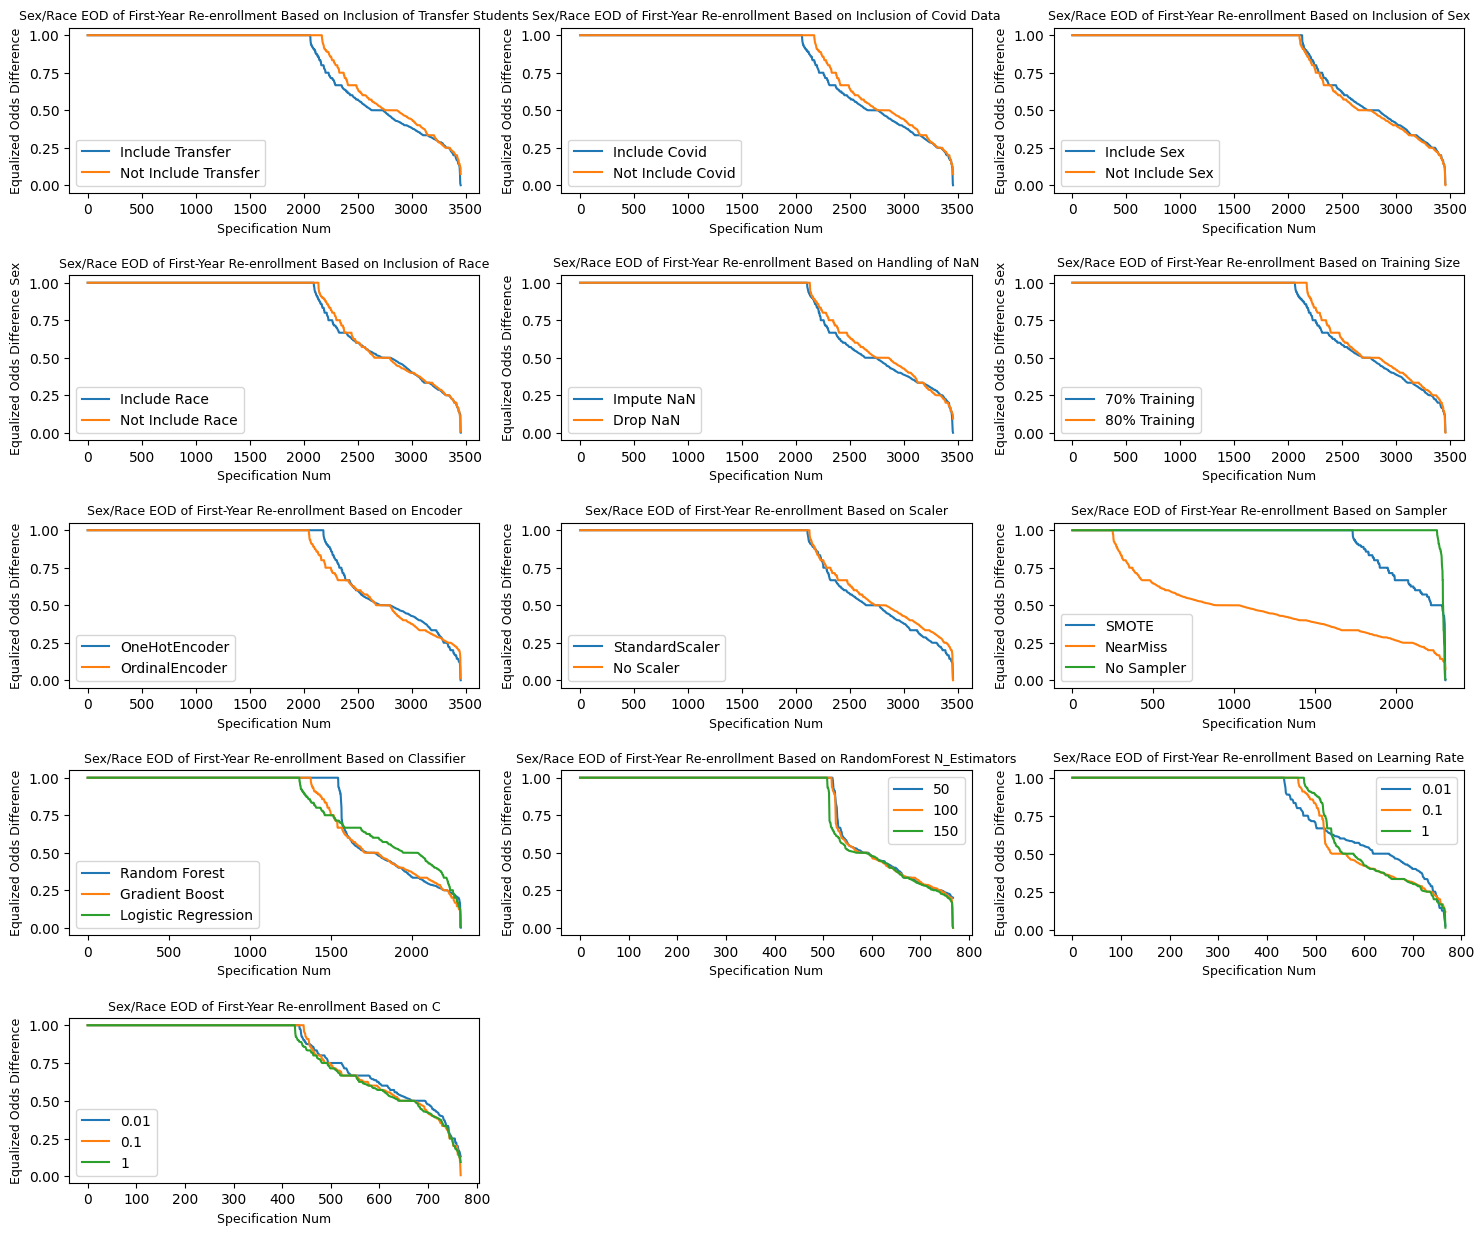

In [346]:
# Creating the subplots for Equalized Odds Difference Sex/Race graph
fig, ax = plt.subplots(5, 3, figsize=(18,15))
plt.subplots_adjust(hspace=0.5)
fig.delaxes(ax[4, 1])
fig.delaxes(ax[4, 2])

# Plot Transfer
include_transfer = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Include_Transfer'] == 1]['Equalized_Odds_Difference_Sex/Race']
not_include_transfer = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Include_Transfer'] == 0]['Equalized_Odds_Difference_Sex/Race']
transfer_num = np.arange(len(include_transfer))
not_include_transfer_num= np.arange(len(not_include_transfer))


ax[0, 0].plot(transfer_num, include_transfer, label='Include Transfer')
ax[0, 0].plot(not_include_transfer_num, not_include_transfer, label='Not Include Transfer')
ax[0, 0].set_title("Sex/Race EOD of First-Year Re-enrollment Based on Inclusion of Transfer Students", fontsize=9)
ax[0, 0].set_xlabel("Specification Num", fontsize=9)
ax[0, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[0, 0].legend()

# Plot Covid
include_covid = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Include_Covid'] == 1]['Equalized_Odds_Difference_Sex/Race']
not_include_covid = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Include_Covid'] == 0]['Equalized_Odds_Difference_Sex/Race']
covid_num = np.arange(len(include_covid))
not_include_covid_num= np.arange(len(not_include_covid_num))


ax[0, 1].plot(covid_num, include_covid, label='Include Covid')
ax[0, 1].plot(not_include_transfer_num, not_include_transfer, label='Not Include Covid')
ax[0, 1].set_title("Sex/Race EOD of First-Year Re-enrollment Based on Inclusion of Covid Data", fontsize=9)
ax[0, 1].set_xlabel("Specification Num", fontsize=9)
ax[0, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[0, 1].legend()


# Plot Sex
include_sex = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Include_Sex'] == 1]['Equalized_Odds_Difference_Sex/Race']
not_include_sex = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Include_Sex'] ==  0]['Equalized_Odds_Difference_Sex/Race']
include_sex_num = np.arange(len(include_sex))
not_include_sex_num = np.arange(len(not_include_sex))


ax[0, 2].plot(include_sex_num, include_sex, label='Include Sex')
ax[0, 2].plot(not_include_sex_num, not_include_sex, label='Not Include Sex')
ax[0, 2].set_title("Sex/Race EOD of First-Year Re-enrollment Based on Inclusion of Sex", fontsize=9)
ax[0, 2].set_xlabel("Specification Num", fontsize=9)
ax[0, 2].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[0, 2].legend()

# Plot Race
include_race = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Include_Race'] == 1]['Equalized_Odds_Difference_Sex/Race']
not_include_race = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Include_Race'] == 0]['Equalized_Odds_Difference_Sex/Race']
include_race_num = np.arange(len(include_race))
not_include_race_num = np.arange(len(not_include_race))


ax[1, 0].plot(include_race_num, include_race, label='Include Race')
ax[1, 0].plot(not_include_race_num, not_include_race, label='Not Include Race')
ax[1, 0].set_title("Sex/Race EOD of First-Year Re-enrollment Based on Inclusion of Race", fontsize=9)
ax[1, 0].set_xlabel("Specification Num", fontsize=9)
ax[1, 0].set_ylabel("Equalized Odds Difference Sex", fontsize=9)
ax[1, 0].legend()


# Plot Handle Nan
impute_nan = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Handle_Nan'] == "Impute"]['Equalized_Odds_Difference_Sex/Race']
drop_nan = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Handle_Nan'] == "Drop"]['Equalized_Odds_Difference_Sex/Race']
impute_nan_num = np.arange(len(impute_nan))
drop_nan_num = np.arange(len(drop_nan))


ax[1, 1].plot(impute_nan_num, impute_nan, label='Impute NaN')
ax[1, 1].plot(drop_nan_num, drop_nan, label='Drop NaN')
ax[1, 1].set_title("Sex/Race EOD of First-Year Re-enrollment Based on Handling of NaN", fontsize=9)
ax[1, 1].set_xlabel("Specification Num", fontsize=9)
ax[1, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[1, 1].legend()


# Plot Train Size
train_07 = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Train_Size'] == 0.7]['Equalized_Odds_Difference_Sex/Race']
train_08 = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Train_Size'] == 0.8]['Equalized_Odds_Difference_Sex/Race']
train_07_num = np.arange(len(train_07))
train_08_num = np.arange(len(train_08))


ax[1, 2].plot(train_07_num, train_07, label='70% Training')
ax[1, 2].plot(train_08_num, train_08, label='80% Training')
ax[1, 2].set_title("Sex/Race EOD of First-Year Re-enrollment Based on Training Size", fontsize=9)
ax[1, 2].set_xlabel("Specification Num", fontsize=9)
ax[1, 2].set_ylabel("Equalized Odds Difference Sex", fontsize=9)
ax[1, 2].legend()



# Plot Encoder
onehot = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Encoder'] == 'OneHotEncoder']['Equalized_Odds_Difference_Sex/Race']
ordinal = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Encoder'] == 'OrdinalEncoder']['Equalized_Odds_Difference_Sex/Race']
onehot_num = np.arange(len(onehot))
ordinal_num = np.arange(len(ordinal))


ax[2, 0].plot(onehot_num, onehot, label='OneHotEncoder')
ax[2, 0].plot(ordinal_num, ordinal, label='OrdinalEncoder')
ax[2, 0].set_title("Sex/Race EOD of First-Year Re-enrollment Based on Encoder", fontsize=9)
ax[2, 0].set_xlabel("Specification Num", fontsize=9)
ax[2, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[2, 0].legend()


# Plot Scaler
standard = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Scaler'] == 'StandardScaler']['Equalized_Odds_Difference_Sex/Race']
no_scaler = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Scaler'].isna()]['Equalized_Odds_Difference_Sex/Race']
standard_num = np.arange(len(standard))
no_scaler_num = np.arange(len(no_scaler))


ax[2, 1].plot(standard_num, standard, label='StandardScaler')
ax[2, 1].plot(no_scaler_num, no_scaler, label='No Scaler')
ax[2, 1].set_title("Sex/Race EOD of First-Year Re-enrollment Based on Scaler", fontsize=9)
ax[2, 1].set_xlabel("Specification Num", fontsize=9)
ax[2, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[2, 1].legend()


# Plot Sampler
smote = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Sampler'] == 'SMOTE']['Equalized_Odds_Difference_Sex/Race']
nearmiss = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Sampler'] == "NearMiss"]['Equalized_Odds_Difference_Sex/Race']
no_sampler = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Sampler'].isna()]['Equalized_Odds_Difference_Sex/Race']
smote_num = np.arange(len(smote))
nearmiss_num = np.arange(len(nearmiss))
no_sampler_num = np.arange(len(no_sampler))


ax[2, 2].plot(smote_num, smote, label='SMOTE')
ax[2, 2].plot(nearmiss_num, nearmiss, label='NearMiss')
ax[2, 2].plot(no_sampler_num, no_sampler, label='No Sampler')
ax[2, 2].set_title("Sex/Race EOD of First-Year Re-enrollment Based on Sampler", fontsize=9)
ax[2, 2].set_xlabel("Specification Num", fontsize=9)
ax[2, 2].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[2, 2].legend()



# Plot Classifier
randomforest = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Classifier'] == 'RandomForestClassifier']['Equalized_Odds_Difference_Sex/Race']
gradientboost = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Classifier'] == "GradientBoostingClassifier"]['Equalized_Odds_Difference_Sex/Race']
logisticregression = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Classifier'] == 'LogisticRegression']['Equalized_Odds_Difference_Sex/Race']
randomforest_num = np.arange(len(randomforest))
gradientboost_num = np.arange(len(gradientboost))
logisticregression_num = np.arange(len(logisticregression))


ax[3, 0].plot(randomforest_num, randomforest, label='Random Forest')
ax[3, 0].plot(gradientboost_num, gradientboost, label='Gradient Boost')
ax[3, 0].plot(logisticregression_num, logisticregression, label='Logistic Regression')
ax[3, 0].set_title("Sex/Race EOD of First-Year Re-enrollment Based on Classifier", fontsize=9)
ax[3, 0].set_xlabel("Specification Num", fontsize=9)
ax[3, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[3, 0].legend()


# Plot N_Estimators
fifty = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['N_Estimators'] == 50]['Equalized_Odds_Difference_Sex/Race']
onehundred = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['N_Estimators'] == 100]['Equalized_Odds_Difference_Sex/Race']
onefifty = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['N_Estimators'] == 150]['Equalized_Odds_Difference_Sex/Race']
fifty_num = np.arange(len(fifty))
onehundred_num = np.arange(len(onehundred))
onefifty_num = np.arange(len(onefifty))


ax[3, 1].plot(fifty_num, fifty, label='50')
ax[3, 1].plot(onehundred_num, onehundred, label='100')
ax[3, 1].plot(onefifty_num, onefifty, label='150')
ax[3, 1].set_title("Sex/Race EOD of First-Year Re-enrollment Based on RandomForest N_Estimators", fontsize=9)
ax[3, 1].set_xlabel("Specification Num", fontsize=9)
ax[3, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[3, 1].legend()


# Plot Learning Rate
rate_001 = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Learning_Rate'] == 0.01]['Equalized_Odds_Difference_Sex/Race']
rate_01 = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Learning_Rate'] == 0.1]['Equalized_Odds_Difference_Sex/Race']
rate_1 = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['Learning_Rate'] == 1]['Equalized_Odds_Difference_Sex/Race']
rate_001_num = np.arange(len(rate_001))
rate_01_num = np.arange(len(rate_01))
rate_1_num = np.arange(len(rate_1))


ax[3, 2].plot(rate_001_num, rate_001, label='0.01')
ax[3, 2].plot(rate_01_num, rate_01, label='0.1')
ax[3, 2].plot(rate_1_num, rate_1, label='1')
ax[3, 2].set_title("Sex/Race EOD of First-Year Re-enrollment Based on Learning Rate", fontsize=9)
ax[3, 2].set_xlabel("Specification Num", fontsize=9)
ax[3, 2].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[3, 2].legend()


# Plot C
c_001 = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['C'] == 0.01]['Equalized_Odds_Difference_Sex/Race']
c_01 = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['C'] == 0.1]['Equalized_Odds_Difference_Sex/Race']
c_1 = reenroll_sort_equalized_sex_race[reenroll_sort_equalized_sex_race['C'] == 1]['Equalized_Odds_Difference_Sex/Race']
c_001_num = np.arange(len(c_001))
c_01_num = np.arange(len(c_01))
c_1_num = np.arange(len(c_1))


ax[4, 0].plot(c_001_num, c_001, label='0.01')
ax[4, 0].plot(c_01_num, c_01, label='0.1')
ax[4, 0].plot(c_1_num, c_1, label='1')
ax[4, 0].set_title("Sex/Race EOD of First-Year Re-enrollment Based on C", fontsize=9)
ax[4, 0].set_xlabel("Specification Num", fontsize=9)
ax[4, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[4, 0].legend()

fig.savefig("graphs/EOD_Sex_Race_Re-Enroll.png")

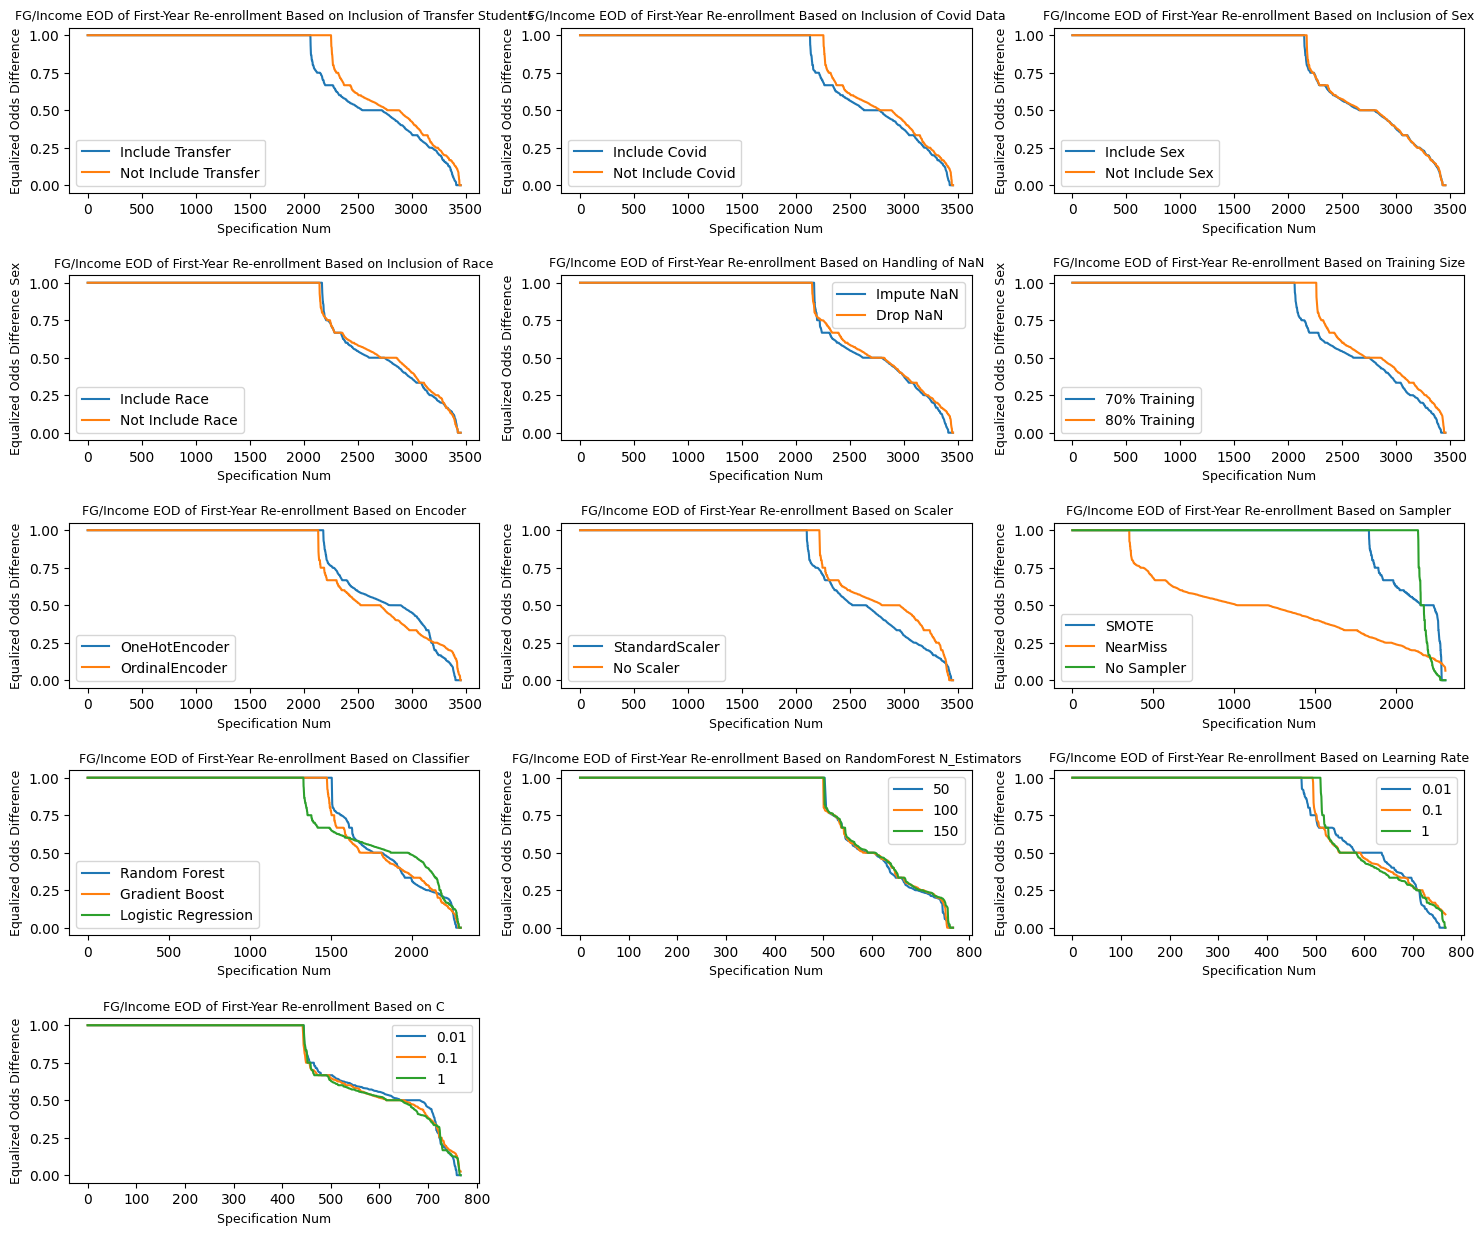

In [347]:
# Creating the subplots for Equalized Odds Difference FG/Income graph
fig, ax = plt.subplots(5, 3, figsize=(18,15))
plt.subplots_adjust(hspace=0.5)
fig.delaxes(ax[4, 1])
fig.delaxes(ax[4, 2])

# Plot Transfer
include_transfer = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Include_Transfer'] == 1]['Equalized_Odds_Difference_FG/Income']
not_include_transfer = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Include_Transfer'] == 0]['Equalized_Odds_Difference_FG/Income']
transfer_num = np.arange(len(include_transfer))
not_include_transfer_num= np.arange(len(not_include_transfer))


ax[0, 0].plot(transfer_num, include_transfer, label='Include Transfer')
ax[0, 0].plot(not_include_transfer_num, not_include_transfer, label='Not Include Transfer')
ax[0, 0].set_title("FG/Income EOD of First-Year Re-enrollment Based on Inclusion of Transfer Students", fontsize=9)
ax[0, 0].set_xlabel("Specification Num", fontsize=9)
ax[0, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[0, 0].legend()

# Plot Covid
include_covid = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Include_Covid'] == 1]['Equalized_Odds_Difference_FG/Income']
not_include_covid = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Include_Covid'] == 0]['Equalized_Odds_Difference_FG/Income']
covid_num = np.arange(len(include_covid))
not_include_covid_num= np.arange(len(not_include_covid_num))


ax[0, 1].plot(covid_num, include_covid, label='Include Covid')
ax[0, 1].plot(not_include_transfer_num, not_include_transfer, label='Not Include Covid')
ax[0, 1].set_title("FG/Income EOD of First-Year Re-enrollment Based on Inclusion of Covid Data", fontsize=9)
ax[0, 1].set_xlabel("Specification Num", fontsize=9)
ax[0, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[0, 1].legend()


# Plot Sex
include_sex = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Include_Sex'] == 1]['Equalized_Odds_Difference_FG/Income']
not_include_sex = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Include_Sex'] ==  0]['Equalized_Odds_Difference_FG/Income']
include_sex_num = np.arange(len(include_sex))
not_include_sex_num = np.arange(len(not_include_sex))


ax[0, 2].plot(include_sex_num, include_sex, label='Include Sex')
ax[0, 2].plot(not_include_sex_num, not_include_sex, label='Not Include Sex')
ax[0, 2].set_title("FG/Income EOD of First-Year Re-enrollment Based on Inclusion of Sex", fontsize=9)
ax[0, 2].set_xlabel("Specification Num", fontsize=9)
ax[0, 2].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[0, 2].legend()

# Plot Race
include_race = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Include_Race'] == 1]['Equalized_Odds_Difference_FG/Income']
not_include_race = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Include_Race'] == 0]['Equalized_Odds_Difference_FG/Income']
include_race_num = np.arange(len(include_race))
not_include_race_num = np.arange(len(not_include_race))


ax[1, 0].plot(include_race_num, include_race, label='Include Race')
ax[1, 0].plot(not_include_race_num, not_include_race, label='Not Include Race')
ax[1, 0].set_title("FG/Income EOD of First-Year Re-enrollment Based on Inclusion of Race", fontsize=9)
ax[1, 0].set_xlabel("Specification Num", fontsize=9)
ax[1, 0].set_ylabel("Equalized Odds Difference Sex", fontsize=9)
ax[1, 0].legend()


# Plot Handle Nan
impute_nan = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Handle_Nan'] == "Impute"]['Equalized_Odds_Difference_FG/Income']
drop_nan = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Handle_Nan'] == "Drop"]['Equalized_Odds_Difference_FG/Income']
impute_nan_num = np.arange(len(impute_nan))
drop_nan_num = np.arange(len(drop_nan))


ax[1, 1].plot(impute_nan_num, impute_nan, label='Impute NaN')
ax[1, 1].plot(drop_nan_num, drop_nan, label='Drop NaN')
ax[1, 1].set_title("FG/Income EOD of First-Year Re-enrollment Based on Handling of NaN", fontsize=9)
ax[1, 1].set_xlabel("Specification Num", fontsize=9)
ax[1, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[1, 1].legend()


# Plot Train Size
train_07 = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Train_Size'] == 0.7]['Equalized_Odds_Difference_FG/Income']
train_08 = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Train_Size'] == 0.8]['Equalized_Odds_Difference_FG/Income']
train_07_num = np.arange(len(train_07))
train_08_num = np.arange(len(train_08))


ax[1, 2].plot(train_07_num, train_07, label='70% Training')
ax[1, 2].plot(train_08_num, train_08, label='80% Training')
ax[1, 2].set_title("FG/Income EOD of First-Year Re-enrollment Based on Training Size", fontsize=9)
ax[1, 2].set_xlabel("Specification Num", fontsize=9)
ax[1, 2].set_ylabel("Equalized Odds Difference Sex", fontsize=9)
ax[1, 2].legend()



# Plot Encoder
onehot = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Encoder'] == 'OneHotEncoder']['Equalized_Odds_Difference_FG/Income']
ordinal = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Encoder'] == 'OrdinalEncoder']['Equalized_Odds_Difference_FG/Income']
onehot_num = np.arange(len(onehot))
ordinal_num = np.arange(len(ordinal))


ax[2, 0].plot(onehot_num, onehot, label='OneHotEncoder')
ax[2, 0].plot(ordinal_num, ordinal, label='OrdinalEncoder')
ax[2, 0].set_title("FG/Income EOD of First-Year Re-enrollment Based on Encoder", fontsize=9)
ax[2, 0].set_xlabel("Specification Num", fontsize=9)
ax[2, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[2, 0].legend()


# Plot Scaler
standard = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Scaler'] == 'StandardScaler']['Equalized_Odds_Difference_FG/Income']
no_scaler = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Scaler'].isna()]['Equalized_Odds_Difference_FG/Income']
standard_num = np.arange(len(standard))
no_scaler_num = np.arange(len(no_scaler))


ax[2, 1].plot(standard_num, standard, label='StandardScaler')
ax[2, 1].plot(no_scaler_num, no_scaler, label='No Scaler')
ax[2, 1].set_title("FG/Income EOD of First-Year Re-enrollment Based on Scaler", fontsize=9)
ax[2, 1].set_xlabel("Specification Num", fontsize=9)
ax[2, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[2, 1].legend()


# Plot Sampler
smote = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Sampler'] == 'SMOTE']['Equalized_Odds_Difference_FG/Income']
nearmiss = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Sampler'] == "NearMiss"]['Equalized_Odds_Difference_FG/Income']
no_sampler = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Sampler'].isna()]['Equalized_Odds_Difference_FG/Income']
smote_num = np.arange(len(smote))
nearmiss_num = np.arange(len(nearmiss))
no_sampler_num = np.arange(len(no_sampler))


ax[2, 2].plot(smote_num, smote, label='SMOTE')
ax[2, 2].plot(nearmiss_num, nearmiss, label='NearMiss')
ax[2, 2].plot(no_sampler_num, no_sampler, label='No Sampler')
ax[2, 2].set_title("FG/Income EOD of First-Year Re-enrollment Based on Sampler", fontsize=9)
ax[2, 2].set_xlabel("Specification Num", fontsize=9)
ax[2, 2].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[2, 2].legend()



# Plot Classifier
randomforest = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Classifier'] == 'RandomForestClassifier']['Equalized_Odds_Difference_FG/Income']
gradientboost = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Classifier'] == "GradientBoostingClassifier"]['Equalized_Odds_Difference_FG/Income']
logisticregression = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Classifier'] == 'LogisticRegression']['Equalized_Odds_Difference_FG/Income']
randomforest_num = np.arange(len(randomforest))
gradientboost_num = np.arange(len(gradientboost))
logisticregression_num = np.arange(len(logisticregression))


ax[3, 0].plot(randomforest_num, randomforest, label='Random Forest')
ax[3, 0].plot(gradientboost_num, gradientboost, label='Gradient Boost')
ax[3, 0].plot(logisticregression_num, logisticregression, label='Logistic Regression')
ax[3, 0].set_title("FG/Income EOD of First-Year Re-enrollment Based on Classifier", fontsize=9)
ax[3, 0].set_xlabel("Specification Num", fontsize=9)
ax[3, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[3, 0].legend()


# Plot N_Estimators
fifty = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['N_Estimators'] == 50]['Equalized_Odds_Difference_FG/Income']
onehundred = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['N_Estimators'] == 100]['Equalized_Odds_Difference_FG/Income']
onefifty = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['N_Estimators'] == 150]['Equalized_Odds_Difference_FG/Income']
fifty_num = np.arange(len(fifty))
onehundred_num = np.arange(len(onehundred))
onefifty_num = np.arange(len(onefifty))


ax[3, 1].plot(fifty_num, fifty, label='50')
ax[3, 1].plot(onehundred_num, onehundred, label='100')
ax[3, 1].plot(onefifty_num, onefifty, label='150')
ax[3, 1].set_title("FG/Income EOD of First-Year Re-enrollment Based on RandomForest N_Estimators", fontsize=9)
ax[3, 1].set_xlabel("Specification Num", fontsize=9)
ax[3, 1].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[3, 1].legend()


# Plot Learning Rate
rate_001 = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Learning_Rate'] == 0.01]['Equalized_Odds_Difference_FG/Income']
rate_01 = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Learning_Rate'] == 0.1]['Equalized_Odds_Difference_FG/Income']
rate_1 = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['Learning_Rate'] == 1]['Equalized_Odds_Difference_FG/Income']
rate_001_num = np.arange(len(rate_001))
rate_01_num = np.arange(len(rate_01))
rate_1_num = np.arange(len(rate_1))


ax[3, 2].plot(rate_001_num, rate_001, label='0.01')
ax[3, 2].plot(rate_01_num, rate_01, label='0.1')
ax[3, 2].plot(rate_1_num, rate_1, label='1')
ax[3, 2].set_title("FG/Income EOD of First-Year Re-enrollment Based on Learning Rate", fontsize=9)
ax[3, 2].set_xlabel("Specification Num", fontsize=9)
ax[3, 2].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[3, 2].legend()


# Plot C
c_001 = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['C'] == 0.01]['Equalized_Odds_Difference_FG/Income']
c_01 = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['C'] == 0.1]['Equalized_Odds_Difference_FG/Income']
c_1 = reenroll_sort_equalized_fg_income[reenroll_sort_equalized_fg_income['C'] == 1]['Equalized_Odds_Difference_FG/Income']
c_001_num = np.arange(len(c_001))
c_01_num = np.arange(len(c_01))
c_1_num = np.arange(len(c_1))


ax[4, 0].plot(c_001_num, c_001, label='0.01')
ax[4, 0].plot(c_01_num, c_01, label='0.1')
ax[4, 0].plot(c_1_num, c_1, label='1')
ax[4, 0].set_title("FG/Income EOD of First-Year Re-enrollment Based on C", fontsize=9)
ax[4, 0].set_xlabel("Specification Num", fontsize=9)
ax[4, 0].set_ylabel("Equalized Odds Difference", fontsize=9)
ax[4, 0].legend()

fig.savefig("graphs/EOD_FG_Income_Re-Enroll.png")

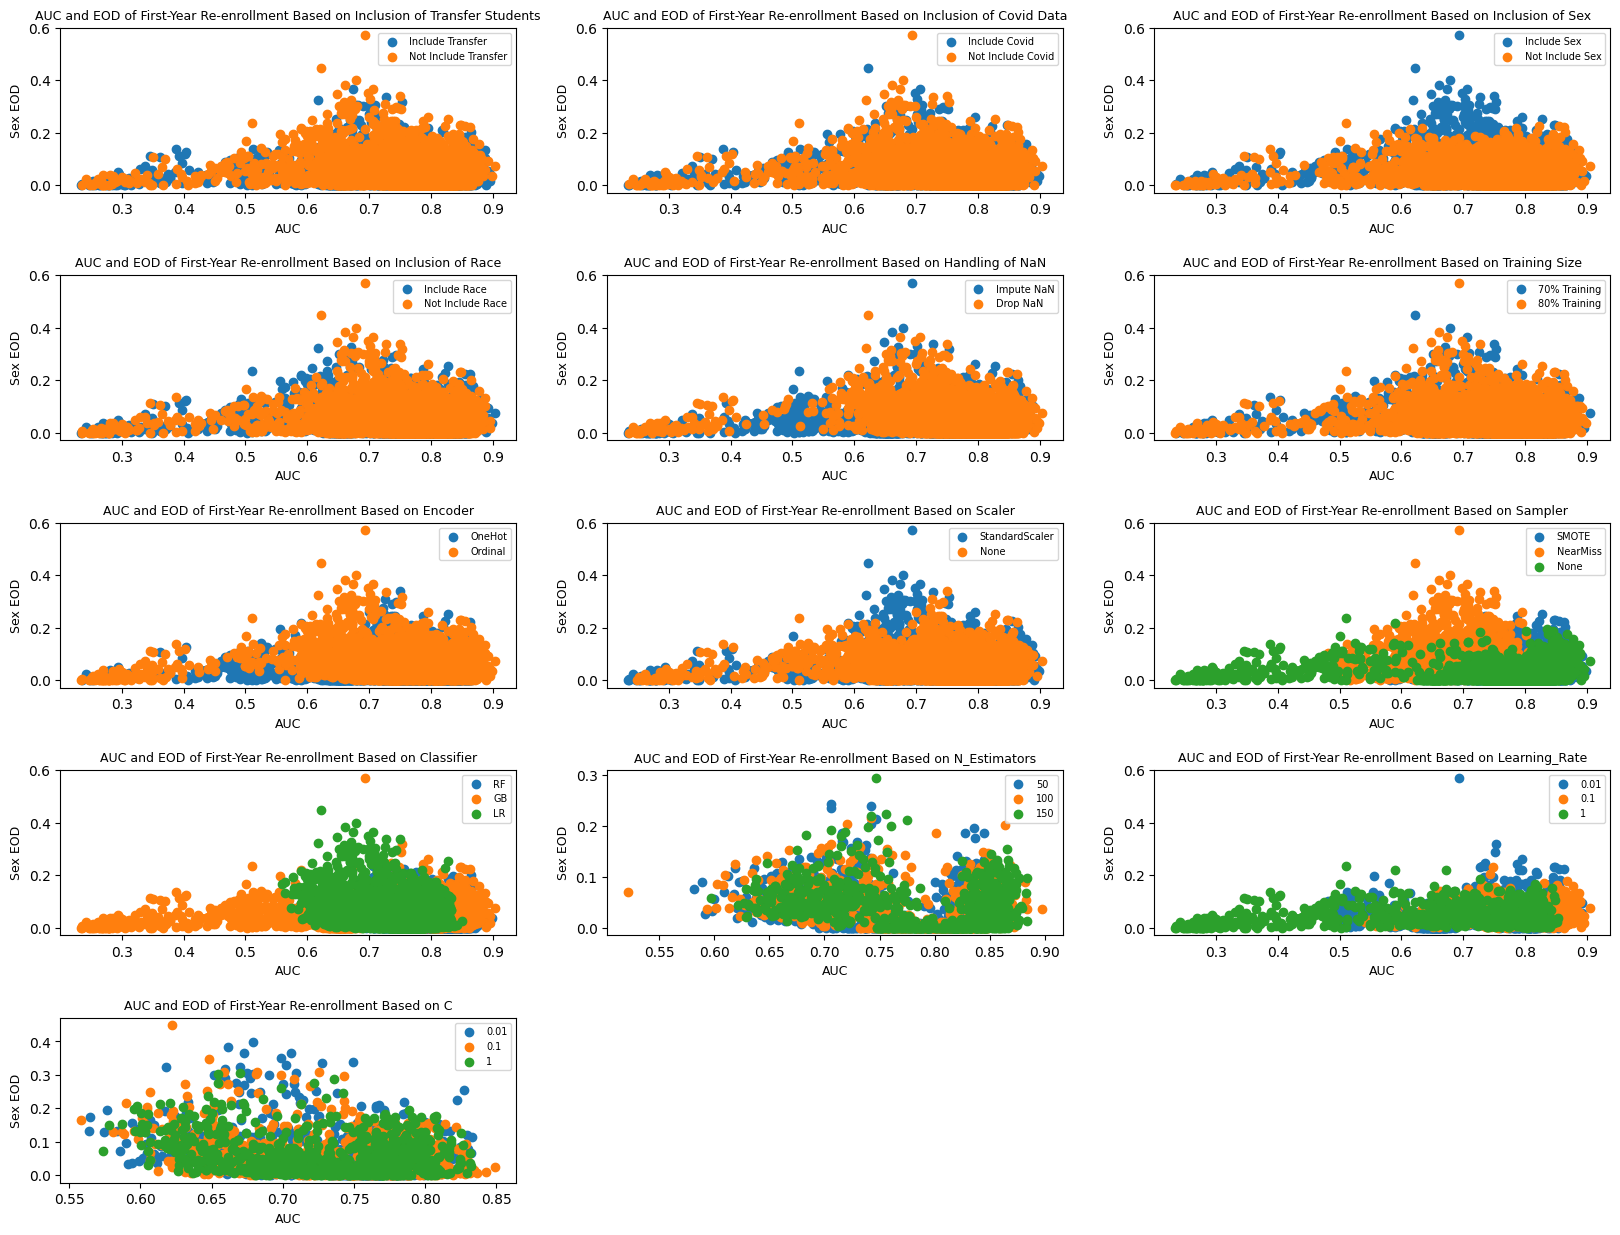

In [351]:
reenroll_good = reenroll_multiverse
# Creating the subplots for AUC graph
fig, ax = plt.subplots(5, 3, figsize=(20,15))
plt.subplots_adjust(hspace=0.5)
fig.delaxes(ax[4, 1])
fig.delaxes(ax[4, 2])

# Plot Transfer
include_transfer = reenroll_good[reenroll_good['Include_Transfer'] == 1]
not_include_transfer = reenroll_good[reenroll_good['Include_Transfer'] == 0]

ax[0, 0].scatter(include_transfer['AUC'], include_transfer['Equalized_Odds_Difference_Sex'], label='Include Transfer')
ax[0, 0].scatter(not_include_transfer['AUC'], not_include_transfer['Equalized_Odds_Difference_Sex'],label='Not Include Transfer')

ax[0, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on Inclusion of Transfer Students", fontsize=9)
ax[0, 0].set_xlabel("AUC", fontsize=9)
ax[0, 0].set_ylabel("Sex EOD", fontsize=9)
ax[0, 0].legend(fontsize=7)

# Plot Covid
include_covid = reenroll_good[reenroll_good['Include_Covid'] == 1]
not_include_covid = reenroll_good[reenroll_good['Include_Covid'] == 0]

ax[0, 1].scatter(include_covid['AUC'], include_covid['Equalized_Odds_Difference_Sex'],  label='Include Covid')
ax[0, 1].scatter(not_include_covid['AUC'], not_include_covid['Equalized_Odds_Difference_Sex'], label='Not Include Covid')

ax[0, 1].set_title("AUC and EOD of First-Year Re-enrollment Based on Inclusion of Covid Data", fontsize=9)
ax[0, 1].set_xlabel("AUC", fontsize=9)
ax[0, 1].set_ylabel("Sex EOD", fontsize=9)
ax[0, 1].legend(fontsize=7)


# # Plot Sex
include_sex = reenroll_good[reenroll_good['Include_Sex'] == 1]
not_include_sex = reenroll_good[reenroll_good['Include_Sex'] == 0]

ax[0, 2].scatter(include_sex['AUC'], include_sex['Equalized_Odds_Difference_Sex'],label='Include Sex')
ax[0, 2].scatter(not_include_sex['AUC'], not_include_sex['Equalized_Odds_Difference_Sex'], label='Not Include Sex')

ax[0, 2].set_title("AUC and EOD of First-Year Re-enrollment Based on Inclusion of Sex", fontsize=9)
ax[0, 2].set_xlabel("AUC", fontsize=9)
ax[0, 2].set_ylabel("Sex EOD", fontsize=9)
ax[0, 2].legend(fontsize=7)

# # Plot Race
include_race = reenroll_good[reenroll_good['Include_Race'] == 1]
not_include_race = reenroll_good[reenroll_good['Include_Race'] == 0]

ax[1, 0].scatter(include_race['AUC'], include_race['Equalized_Odds_Difference_Sex'], label='Include Race')
ax[1, 0].scatter(not_include_race['AUC'], not_include_race['Equalized_Odds_Difference_Sex'],label='Not Include Race')

ax[1, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on Inclusion of Race", fontsize=9)
ax[1, 0].set_xlabel("AUC", fontsize=9)
ax[1, 0].set_ylabel("Sex EOD", fontsize=9)
ax[1, 0].legend(fontsize=7)


# # Plot Handle Nan
impute_nan = reenroll_good[reenroll_good['Handle_Nan'] == "Impute"]
drop_nan = reenroll_good[reenroll_good['Handle_Nan'] == "Drop"]

ax[1, 1].scatter(impute_nan['AUC'], impute_nan['Equalized_Odds_Difference_Sex'],  label='Impute NaN')
ax[1, 1].scatter(drop_nan['AUC'], drop_nan['Equalized_Odds_Difference_Sex'], label='Drop NaN')

ax[1, 1].set_title("AUC and EOD of First-Year Re-enrollment Based on Handling of NaN", fontsize=9)
ax[1, 1].set_xlabel("AUC", fontsize=9)
ax[1, 1].set_ylabel("Sex EOD", fontsize=9)
ax[1, 1].legend(fontsize=7)


# # Plot Train Size
train_07 = reenroll_good[reenroll_good['Train_Size'] == 0.7]
train_08 = reenroll_good[reenroll_good['Train_Size'] == 0.8]

ax[1, 2].scatter(train_07['AUC'], train_07['Equalized_Odds_Difference_Sex'], label='70% Training')
ax[1, 2].scatter(train_08['AUC'], train_08['Equalized_Odds_Difference_Sex'],  label='80% Training')

ax[1, 2].set_title("AUC and EOD of First-Year Re-enrollment Based on Training Size", fontsize=9)
ax[1, 2].set_xlabel("AUC", fontsize=9)
ax[1, 2].set_ylabel("Sex EOD", fontsize=9)
ax[1, 2].legend(fontsize=7)



# # Plot Encoder
onehot = reenroll_good[reenroll_good['Encoder'] == "OneHotEncoder"]
ordinal = reenroll_good[reenroll_good['Encoder'] == "OrdinalEncoder"]

ax[2, 0].scatter(onehot['AUC'], onehot['Equalized_Odds_Difference_Sex'], label='OneHot')
ax[2, 0].scatter(ordinal['AUC'], ordinal['Equalized_Odds_Difference_Sex'],  label='Ordinal')

ax[2, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on Encoder", fontsize=9)
ax[2, 0].set_xlabel("AUC", fontsize=9)
ax[2, 0].set_ylabel("Sex EOD", fontsize=9)
ax[2, 0].legend(fontsize=7)


# # Plot Scaler
standard = reenroll_good[reenroll_good['Scaler'] == "StandardScaler"]
no_scaler = reenroll_good[reenroll_good['Scaler'].isna()]

ax[2, 1].scatter(standard['AUC'], standard['Equalized_Odds_Difference_Sex'],  label='StandardScaler')
ax[2, 1].scatter(no_scaler['AUC'], no_scaler['Equalized_Odds_Difference_Sex'],  label='None')

ax[2, 1].set_title("AUC and EOD of First-Year Re-enrollment Based on Scaler", fontsize=9)
ax[2, 1].set_xlabel("AUC", fontsize=9)
ax[2, 1].set_ylabel("Sex EOD", fontsize=9)
ax[2, 1].legend(fontsize=7)



# # Plot Sampler
smote = reenroll_good[reenroll_good['Sampler'] == "SMOTE"]
nearmiss = reenroll_good[reenroll_good['Sampler'] == "NearMiss"]
no_sampler = reenroll_good[reenroll_good['Sampler'].isna()]

ax[2, 2].scatter(smote['AUC'], smote['Equalized_Odds_Difference_Sex'], label='SMOTE')
ax[2, 2].scatter(nearmiss['AUC'], nearmiss['Equalized_Odds_Difference_Sex'], label='NearMiss')
ax[2, 2].scatter(no_sampler['AUC'], no_sampler['Equalized_Odds_Difference_Sex'],  label='None')

ax[2, 2].set_title("AUC and EOD of First-Year Re-enrollment Based on Sampler", fontsize=9)
ax[2, 2].set_xlabel("AUC", fontsize=9)
ax[2, 2].set_ylabel("Sex EOD", fontsize=9)
ax[2, 2].legend(fontsize=7)



# # Plot Classifier
randomforest = reenroll_good[reenroll_good['Classifier'] == "RandomForestClassifier"]
gradientboost = reenroll_good[reenroll_good['Classifier'] == "GradientBoostingClassifier"]
logisticregression = reenroll_good[reenroll_good['Classifier'] == "LogisticRegression"]

ax[3, 0].scatter(randomforest['AUC'], randomforest['Equalized_Odds_Difference_Sex'], label='RF')
ax[3, 0].scatter(gradientboost['AUC'], gradientboost['Equalized_Odds_Difference_Sex'], label='GB')
ax[3, 0].scatter(logisticregression['AUC'], logisticregression['Equalized_Odds_Difference_Sex'],  label='LR')

ax[3, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on Classifier", fontsize=9)
ax[3, 0].set_xlabel("AUC", fontsize=9)
ax[3, 0].set_ylabel("Sex EOD", fontsize=9)
ax[3, 0].legend(fontsize=7)


# # Plot N_Estimators
fifty = reenroll_good[reenroll_good['N_Estimators'] == 50]
onehundred = reenroll_good[reenroll_good['N_Estimators'] == 100]
onefifty = reenroll_good[reenroll_good['N_Estimators'] == 150]

ax[3, 1].scatter(fifty['AUC'], fifty['Equalized_Odds_Difference_Sex'], label='50')
ax[3, 1].scatter(onehundred['AUC'], onehundred['Equalized_Odds_Difference_Sex'], label='100')
ax[3, 1].scatter(onefifty['AUC'], onefifty['Equalized_Odds_Difference_Sex'], label='150')

ax[3, 1].set_title("AUC and EOD of First-Year Re-enrollment Based on N_Estimators", fontsize=9)
ax[3, 1].set_xlabel("AUC", fontsize=9)
ax[3, 1].set_ylabel("Sex EOD", fontsize=9)
ax[3, 1].legend(fontsize=7)

# # Plot Learning Rate
rate_001 = reenroll_good[reenroll_good['Learning_Rate'] == 0.01]
rate_01 = reenroll_good[reenroll_good['Learning_Rate'] == 0.1]
rate_1 = reenroll_good[reenroll_good['Learning_Rate'] == 1]

ax[3, 2].scatter(rate_001['AUC'], rate_001['Equalized_Odds_Difference_Sex'],  label='0.01')
ax[3, 2].scatter(rate_01['AUC'], rate_01['Equalized_Odds_Difference_Sex'],  label='0.1')
ax[3, 2].scatter(rate_1['AUC'], rate_1['Equalized_Odds_Difference_Sex'], label='1')

ax[3, 2].set_title("AUC and EOD of First-Year Re-enrollment Based on Learning_Rate", fontsize=9)
ax[3, 2].set_xlabel("AUC", fontsize=9)
ax[3, 2].set_ylabel("Sex EOD", fontsize=9)
ax[3, 2].legend(fontsize=7)


# # Plot C
c_001 = reenroll_good[reenroll_good['C'] == 0.01]
c_01 = reenroll_good[reenroll_good['C'] == 0.1]
c_1 = reenroll_good[reenroll_good['C'] == 1]

ax[4, 0].scatter(c_001['AUC'], c_001['Equalized_Odds_Difference_Sex'], label='0.01')
ax[4, 0].scatter(c_01['AUC'], c_01['Equalized_Odds_Difference_Sex'], label='0.1')
ax[4, 0].scatter(c_1['AUC'], c_1['Equalized_Odds_Difference_Sex'], label='1')

ax[4, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on C", fontsize=9)
ax[4, 0].set_xlabel("AUC", fontsize=9)
ax[4, 0].set_ylabel("Sex EOD", fontsize=9)
ax[4, 0].legend(fontsize=7)


fig.savefig("graphs/AUC&Sex_Re-Enroll.png")

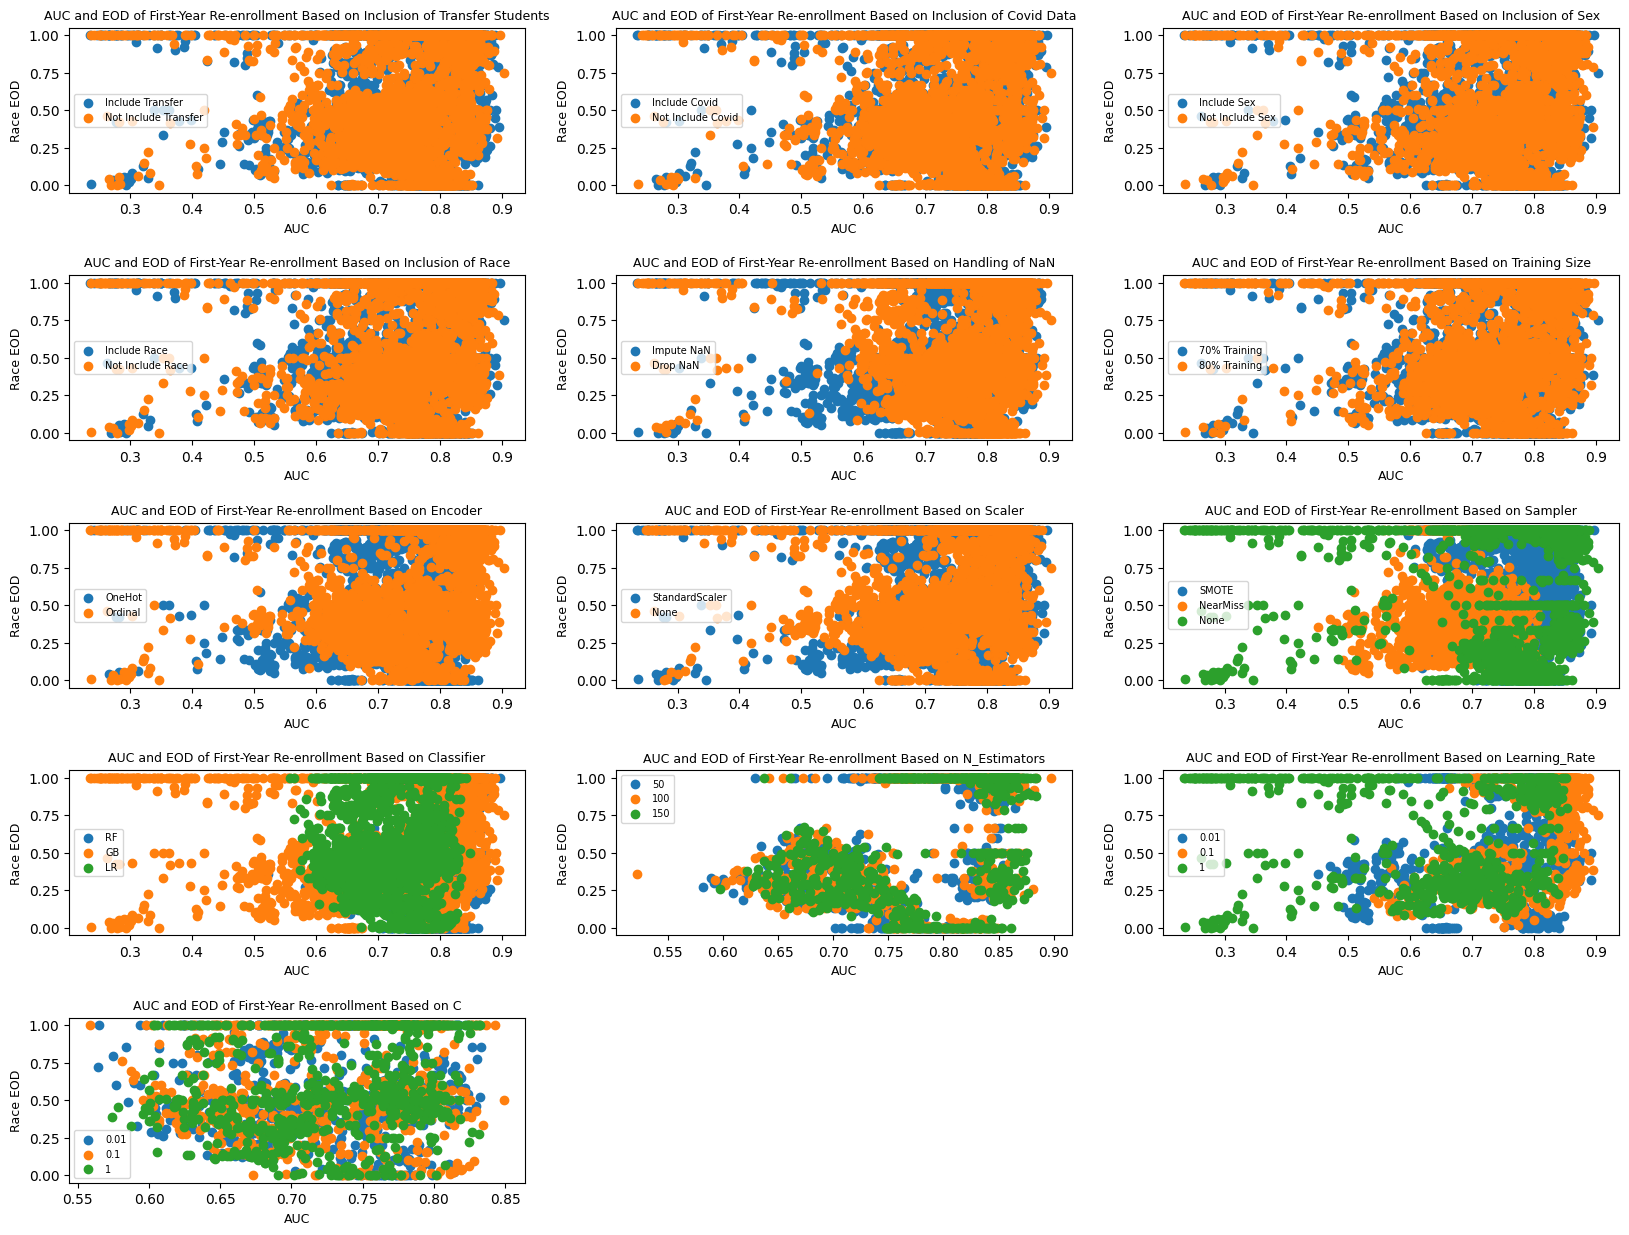

In [352]:
reenroll_good = reenroll_multiverse
# Creating the subplots for AUC graph
fig, ax = plt.subplots(5, 3, figsize=(20,15))
plt.subplots_adjust(hspace=0.5)
fig.delaxes(ax[4, 1])
fig.delaxes(ax[4, 2])

# Plot Transfer
include_transfer = reenroll_good[reenroll_good['Include_Transfer'] == 1]
not_include_transfer = reenroll_good[reenroll_good['Include_Transfer'] == 0]

ax[0, 0].scatter(include_transfer['AUC'], include_transfer['Equalized_Odds_Difference_Race'], label='Include Transfer')
ax[0, 0].scatter(not_include_transfer['AUC'], not_include_transfer['Equalized_Odds_Difference_Race'],label='Not Include Transfer')

ax[0, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on Inclusion of Transfer Students", fontsize=9)
ax[0, 0].set_xlabel("AUC", fontsize=9)
ax[0, 0].set_ylabel("Race EOD", fontsize=9)
ax[0, 0].legend(fontsize=7)

# Plot Covid
include_covid = reenroll_good[reenroll_good['Include_Covid'] == 1]
not_include_covid = reenroll_good[reenroll_good['Include_Covid'] == 0]

ax[0, 1].scatter(include_covid['AUC'], include_covid['Equalized_Odds_Difference_Race'],  label='Include Covid')
ax[0, 1].scatter(not_include_covid['AUC'], not_include_covid['Equalized_Odds_Difference_Race'], label='Not Include Covid')

ax[0, 1].set_title("AUC and EOD of First-Year Re-enrollment Based on Inclusion of Covid Data", fontsize=9)
ax[0, 1].set_xlabel("AUC", fontsize=9)
ax[0, 1].set_ylabel("Race EOD", fontsize=9)
ax[0, 1].legend(fontsize=7)


# # Plot Sex
include_sex = reenroll_good[reenroll_good['Include_Race'] == 1]
not_include_sex = reenroll_good[reenroll_good['Include_Race'] == 0]

ax[0, 2].scatter(include_sex['AUC'], include_sex['Equalized_Odds_Difference_Race'],label='Include Sex')
ax[0, 2].scatter(not_include_sex['AUC'], not_include_sex['Equalized_Odds_Difference_Race'], label='Not Include Sex')

ax[0, 2].set_title("AUC and EOD of First-Year Re-enrollment Based on Inclusion of Sex", fontsize=9)
ax[0, 2].set_xlabel("AUC", fontsize=9)
ax[0, 2].set_ylabel("Race EOD", fontsize=9)
ax[0, 2].legend(fontsize=7)

# # Plot Race
include_race = reenroll_good[reenroll_good['Include_Race'] == 1]
not_include_race = reenroll_good[reenroll_good['Include_Race'] == 0]

ax[1, 0].scatter(include_race['AUC'], include_race['Equalized_Odds_Difference_Race'], label='Include Race')
ax[1, 0].scatter(not_include_race['AUC'], not_include_race['Equalized_Odds_Difference_Race'],label='Not Include Race')

ax[1, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on Inclusion of Race", fontsize=9)
ax[1, 0].set_xlabel("AUC", fontsize=9)
ax[1, 0].set_ylabel("Race EOD", fontsize=9)
ax[1, 0].legend(fontsize=7)


# # Plot Handle Nan
impute_nan = reenroll_good[reenroll_good['Handle_Nan'] == "Impute"]
drop_nan = reenroll_good[reenroll_good['Handle_Nan'] == "Drop"]

ax[1, 1].scatter(impute_nan['AUC'], impute_nan['Equalized_Odds_Difference_Race'],  label='Impute NaN')
ax[1, 1].scatter(drop_nan['AUC'], drop_nan['Equalized_Odds_Difference_Race'], label='Drop NaN')

ax[1, 1].set_title("AUC and EOD of First-Year Re-enrollment Based on Handling of NaN", fontsize=9)
ax[1, 1].set_xlabel("AUC", fontsize=9)
ax[1, 1].set_ylabel("Race EOD", fontsize=9)
ax[1, 1].legend(fontsize=7)


# # Plot Train Size
train_07 = reenroll_good[reenroll_good['Train_Size'] == 0.7]
train_08 = reenroll_good[reenroll_good['Train_Size'] == 0.8]

ax[1, 2].scatter(train_07['AUC'], train_07['Equalized_Odds_Difference_Race'], label='70% Training')
ax[1, 2].scatter(train_08['AUC'], train_08['Equalized_Odds_Difference_Race'],  label='80% Training')

ax[1, 2].set_title("AUC and EOD of First-Year Re-enrollment Based on Training Size", fontsize=9)
ax[1, 2].set_xlabel("AUC", fontsize=9)
ax[1, 2].set_ylabel("Race EOD", fontsize=9)
ax[1, 2].legend(fontsize=7)



# # Plot Encoder
onehot = reenroll_good[reenroll_good['Encoder'] == "OneHotEncoder"]
ordinal = reenroll_good[reenroll_good['Encoder'] == "OrdinalEncoder"]

ax[2, 0].scatter(onehot['AUC'], onehot['Equalized_Odds_Difference_Race'], label='OneHot')
ax[2, 0].scatter(ordinal['AUC'], ordinal['Equalized_Odds_Difference_Race'],  label='Ordinal')

ax[2, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on Encoder", fontsize=9)
ax[2, 0].set_xlabel("AUC", fontsize=9)
ax[2, 0].set_ylabel("Race EOD", fontsize=9)
ax[2, 0].legend(fontsize=7)


# # Plot Scaler
standard = reenroll_good[reenroll_good['Scaler'] == "StandardScaler"]
no_scaler = reenroll_good[reenroll_good['Scaler'].isna()]

ax[2, 1].scatter(standard['AUC'], standard['Equalized_Odds_Difference_Race'],  label='StandardScaler')
ax[2, 1].scatter(no_scaler['AUC'], no_scaler['Equalized_Odds_Difference_Race'],  label='None')

ax[2, 1].set_title("AUC and EOD of First-Year Re-enrollment Based on Scaler", fontsize=9)
ax[2, 1].set_xlabel("AUC", fontsize=9)
ax[2, 1].set_ylabel("Race EOD", fontsize=9)
ax[2, 1].legend(fontsize=7)



# # Plot Sampler
smote = reenroll_good[reenroll_good['Sampler'] == "SMOTE"]
nearmiss = reenroll_good[reenroll_good['Sampler'] == "NearMiss"]
no_sampler = reenroll_good[reenroll_good['Sampler'].isna()]

ax[2, 2].scatter(smote['AUC'], smote['Equalized_Odds_Difference_Race'], label='SMOTE')
ax[2, 2].scatter(nearmiss['AUC'], nearmiss['Equalized_Odds_Difference_Race'], label='NearMiss')
ax[2, 2].scatter(no_sampler['AUC'], no_sampler['Equalized_Odds_Difference_Race'],  label='None')

ax[2, 2].set_title("AUC and EOD of First-Year Re-enrollment Based on Sampler", fontsize=9)
ax[2, 2].set_xlabel("AUC", fontsize=9)
ax[2, 2].set_ylabel("Race EOD", fontsize=9)
ax[2, 2].legend(fontsize=7)



# # Plot Classifier
randomforest = reenroll_good[reenroll_good['Classifier'] == "RandomForestClassifier"]
gradientboost = reenroll_good[reenroll_good['Classifier'] == "GradientBoostingClassifier"]
logisticregression = reenroll_good[reenroll_good['Classifier'] == "LogisticRegression"]

ax[3, 0].scatter(randomforest['AUC'], randomforest['Equalized_Odds_Difference_Race'], label='RF')
ax[3, 0].scatter(gradientboost['AUC'], gradientboost['Equalized_Odds_Difference_Race'], label='GB')
ax[3, 0].scatter(logisticregression['AUC'], logisticregression['Equalized_Odds_Difference_Race'],  label='LR')

ax[3, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on Classifier", fontsize=9)
ax[3, 0].set_xlabel("AUC", fontsize=9)
ax[3, 0].set_ylabel("Race EOD", fontsize=9)
ax[3, 0].legend(fontsize=7)


# # Plot N_Estimators
fifty = reenroll_good[reenroll_good['N_Estimators'] == 50]
onehundred = reenroll_good[reenroll_good['N_Estimators'] == 100]
onefifty = reenroll_good[reenroll_good['N_Estimators'] == 150]

ax[3, 1].scatter(fifty['AUC'], fifty['Equalized_Odds_Difference_Race'], label='50')
ax[3, 1].scatter(onehundred['AUC'], onehundred['Equalized_Odds_Difference_Race'], label='100')
ax[3, 1].scatter(onefifty['AUC'], onefifty['Equalized_Odds_Difference_Race'], label='150')

ax[3, 1].set_title("AUC and EOD of First-Year Re-enrollment Based on N_Estimators", fontsize=9)
ax[3, 1].set_xlabel("AUC", fontsize=9)
ax[3, 1].set_ylabel("Race EOD", fontsize=9)
ax[3, 1].legend(fontsize=7)

# # Plot Learning Rate
rate_001 = reenroll_good[reenroll_good['Learning_Rate'] == 0.01]
rate_01 = reenroll_good[reenroll_good['Learning_Rate'] == 0.1]
rate_1 = reenroll_good[reenroll_good['Learning_Rate'] == 1]

ax[3, 2].scatter(rate_001['AUC'], rate_001['Equalized_Odds_Difference_Race'],  label='0.01')
ax[3, 2].scatter(rate_01['AUC'], rate_01['Equalized_Odds_Difference_Race'],  label='0.1')
ax[3, 2].scatter(rate_1['AUC'], rate_1['Equalized_Odds_Difference_Race'], label='1')

ax[3, 2].set_title("AUC and EOD of First-Year Re-enrollment Based on Learning_Rate", fontsize=9)
ax[3, 2].set_xlabel("AUC", fontsize=9)
ax[3, 2].set_ylabel("Race EOD", fontsize=9)
ax[3, 2].legend(fontsize=7)


# # Plot C
c_001 = reenroll_good[reenroll_good['C'] == 0.01]
c_01 = reenroll_good[reenroll_good['C'] == 0.1]
c_1 = reenroll_good[reenroll_good['C'] == 1]

ax[4, 0].scatter(c_001['AUC'], c_001['Equalized_Odds_Difference_Race'], label='0.01')
ax[4, 0].scatter(c_01['AUC'], c_01['Equalized_Odds_Difference_Race'], label='0.1')
ax[4, 0].scatter(c_1['AUC'], c_1['Equalized_Odds_Difference_Race'], label='1')

ax[4, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on C", fontsize=9)
ax[4, 0].set_xlabel("AUC", fontsize=9)
ax[4, 0].set_ylabel("Race EOD", fontsize=9)
ax[4, 0].legend(fontsize=7)


fig.savefig("graphs/AUC&Race_Re-Enroll.png")

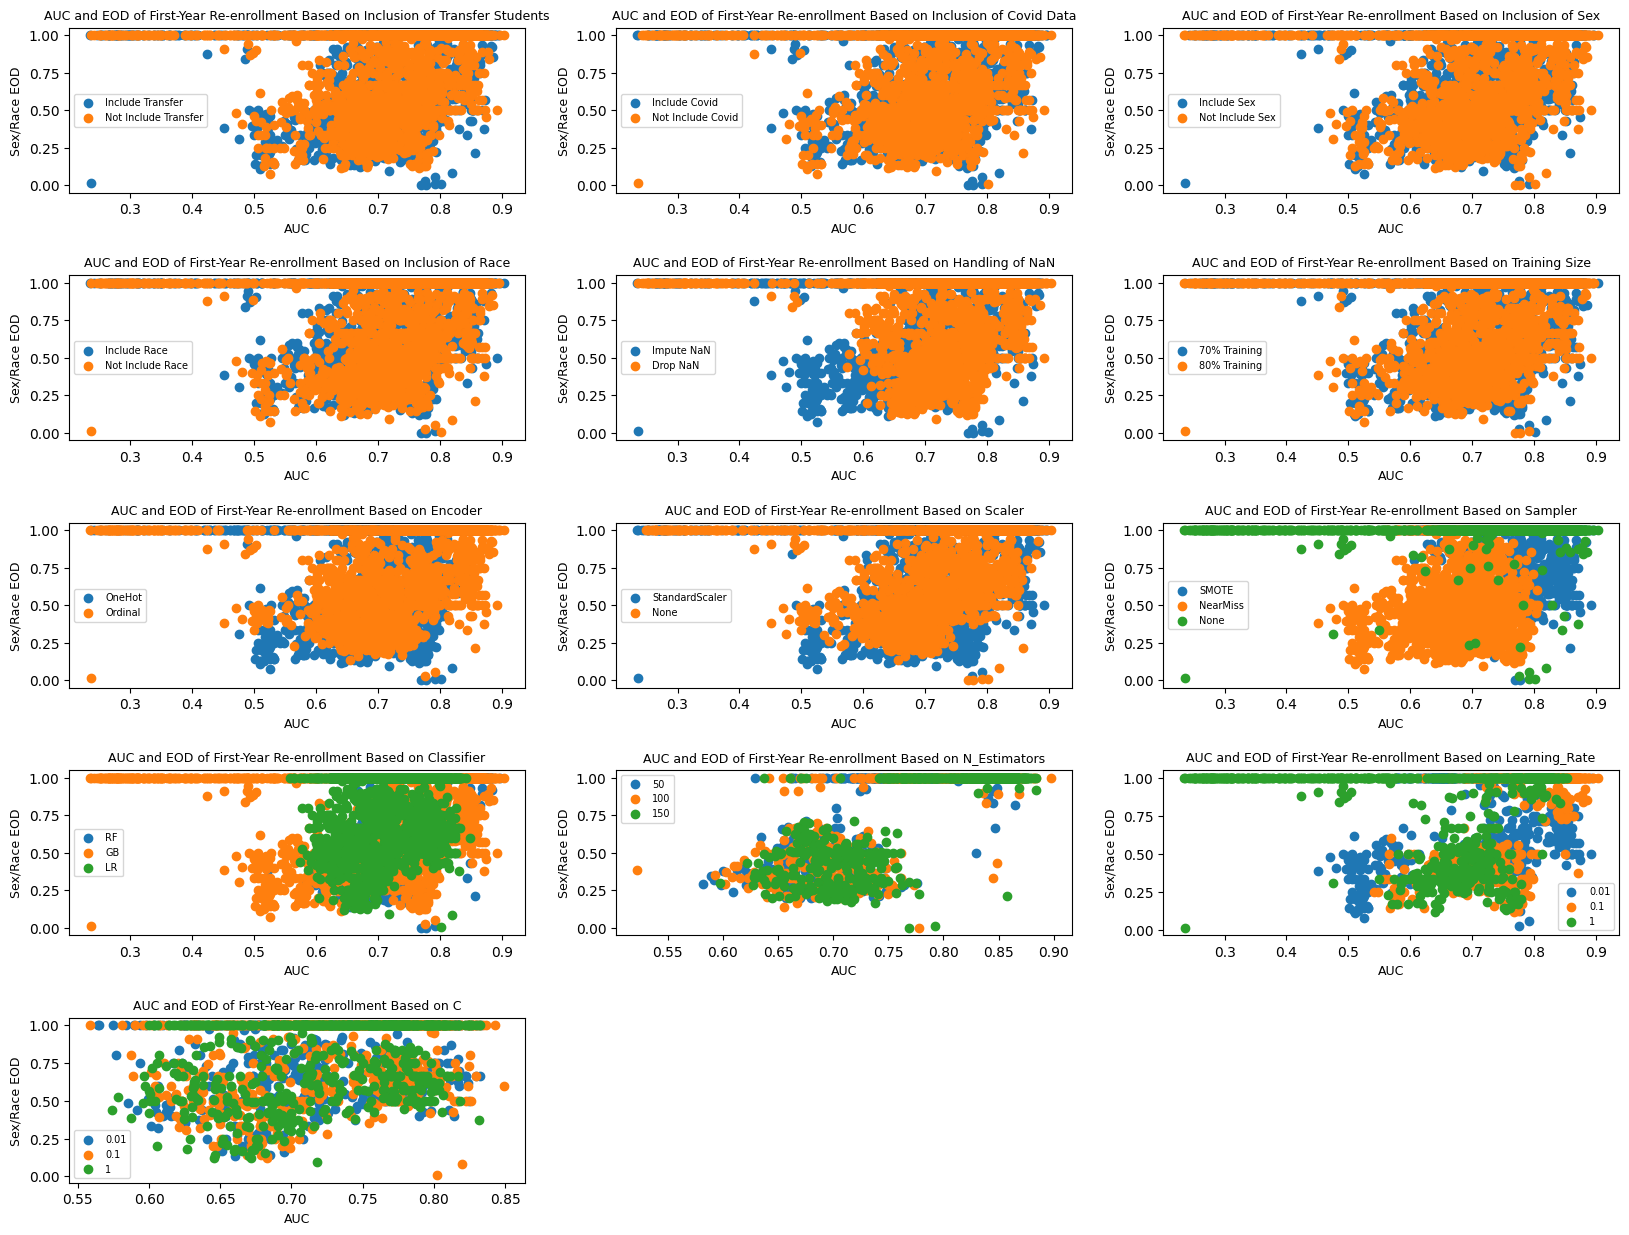

In [353]:
reenroll_good = reenroll_multiverse
# Creating the subplots for AUC graph
fig, ax = plt.subplots(5, 3, figsize=(20,15))
plt.subplots_adjust(hspace=0.5)
fig.delaxes(ax[4, 1])
fig.delaxes(ax[4, 2])

# Plot Transfer
include_transfer = reenroll_good[reenroll_good['Include_Transfer'] == 1]
not_include_transfer = reenroll_good[reenroll_good['Include_Transfer'] == 0]

ax[0, 0].scatter(include_transfer['AUC'], include_transfer['Equalized_Odds_Difference_Sex/Race'], label='Include Transfer')
ax[0, 0].scatter(not_include_transfer['AUC'], not_include_transfer['Equalized_Odds_Difference_Sex/Race'],label='Not Include Transfer')

ax[0, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on Inclusion of Transfer Students", fontsize=9)
ax[0, 0].set_xlabel("AUC", fontsize=9)
ax[0, 0].set_ylabel("Sex/Race EOD", fontsize=9)
ax[0, 0].legend(fontsize=7)

# Plot Covid
include_covid = reenroll_good[reenroll_good['Include_Covid'] == 1]
not_include_covid = reenroll_good[reenroll_good['Include_Covid'] == 0]

ax[0, 1].scatter(include_covid['AUC'], include_covid['Equalized_Odds_Difference_Sex/Race'],  label='Include Covid')
ax[0, 1].scatter(not_include_covid['AUC'], not_include_covid['Equalized_Odds_Difference_Sex/Race'], label='Not Include Covid')

ax[0, 1].set_title("AUC and EOD of First-Year Re-enrollment Based on Inclusion of Covid Data", fontsize=9)
ax[0, 1].set_xlabel("AUC", fontsize=9)
ax[0, 1].set_ylabel("Sex/Race EOD", fontsize=9)
ax[0, 1].legend(fontsize=7)


# # Plot Sex
include_sex = reenroll_good[reenroll_good['Include_Sex'] == 1]
not_include_sex = reenroll_good[reenroll_good['Include_Sex'] == 0]

ax[0, 2].scatter(include_sex['AUC'], include_sex['Equalized_Odds_Difference_Sex/Race'],label='Include Sex')
ax[0, 2].scatter(not_include_sex['AUC'], not_include_sex['Equalized_Odds_Difference_Sex/Race'], label='Not Include Sex')

ax[0, 2].set_title("AUC and EOD of First-Year Re-enrollment Based on Inclusion of Sex", fontsize=9)
ax[0, 2].set_xlabel("AUC", fontsize=9)
ax[0, 2].set_ylabel("Sex/Race EOD", fontsize=9)
ax[0, 2].legend(fontsize=7)

# # Plot Race
include_race = reenroll_good[reenroll_good['Include_Race'] == 1]
not_include_race = reenroll_good[reenroll_good['Include_Race'] == 0]

ax[1, 0].scatter(include_race['AUC'], include_race['Equalized_Odds_Difference_Sex/Race'], label='Include Race')
ax[1, 0].scatter(not_include_race['AUC'], not_include_race['Equalized_Odds_Difference_Sex/Race'],label='Not Include Race')

ax[1, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on Inclusion of Race", fontsize=9)
ax[1, 0].set_xlabel("AUC", fontsize=9)
ax[1, 0].set_ylabel("Sex/Race EOD", fontsize=9)
ax[1, 0].legend(fontsize=7)


# # Plot Handle Nan
impute_nan = reenroll_good[reenroll_good['Handle_Nan'] == "Impute"]
drop_nan = reenroll_good[reenroll_good['Handle_Nan'] == "Drop"]

ax[1, 1].scatter(impute_nan['AUC'], impute_nan['Equalized_Odds_Difference_Sex/Race'],  label='Impute NaN')
ax[1, 1].scatter(drop_nan['AUC'], drop_nan['Equalized_Odds_Difference_Sex/Race'], label='Drop NaN')

ax[1, 1].set_title("AUC and EOD of First-Year Re-enrollment Based on Handling of NaN", fontsize=9)
ax[1, 1].set_xlabel("AUC", fontsize=9)
ax[1, 1].set_ylabel("Sex/Race EOD", fontsize=9)
ax[1, 1].legend(fontsize=7)


# # Plot Train Size
train_07 = reenroll_good[reenroll_good['Train_Size'] == 0.7]
train_08 = reenroll_good[reenroll_good['Train_Size'] == 0.8]

ax[1, 2].scatter(train_07['AUC'], train_07['Equalized_Odds_Difference_Sex/Race'], label='70% Training')
ax[1, 2].scatter(train_08['AUC'], train_08['Equalized_Odds_Difference_Sex/Race'],  label='80% Training')

ax[1, 2].set_title("AUC and EOD of First-Year Re-enrollment Based on Training Size", fontsize=9)
ax[1, 2].set_xlabel("AUC", fontsize=9)
ax[1, 2].set_ylabel("Sex/Race EOD", fontsize=9)
ax[1, 2].legend(fontsize=7)



# # Plot Encoder
onehot = reenroll_good[reenroll_good['Encoder'] == "OneHotEncoder"]
ordinal = reenroll_good[reenroll_good['Encoder'] == "OrdinalEncoder"]

ax[2, 0].scatter(onehot['AUC'], onehot['Equalized_Odds_Difference_Sex/Race'], label='OneHot')
ax[2, 0].scatter(ordinal['AUC'], ordinal['Equalized_Odds_Difference_Sex/Race'],  label='Ordinal')

ax[2, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on Encoder", fontsize=9)
ax[2, 0].set_xlabel("AUC", fontsize=9)
ax[2, 0].set_ylabel("Sex/Race EOD", fontsize=9)
ax[2, 0].legend(fontsize=7)


# # Plot Scaler
standard = reenroll_good[reenroll_good['Scaler'] == "StandardScaler"]
no_scaler = reenroll_good[reenroll_good['Scaler'].isna()]

ax[2, 1].scatter(standard['AUC'], standard['Equalized_Odds_Difference_Sex/Race'],  label='StandardScaler')
ax[2, 1].scatter(no_scaler['AUC'], no_scaler['Equalized_Odds_Difference_Sex/Race'],  label='None')

ax[2, 1].set_title("AUC and EOD of First-Year Re-enrollment Based on Scaler", fontsize=9)
ax[2, 1].set_xlabel("AUC", fontsize=9)
ax[2, 1].set_ylabel("Sex/Race EOD", fontsize=9)
ax[2, 1].legend(fontsize=7)



# # Plot Sampler
smote = reenroll_good[reenroll_good['Sampler'] == "SMOTE"]
nearmiss = reenroll_good[reenroll_good['Sampler'] == "NearMiss"]
no_sampler = reenroll_good[reenroll_good['Sampler'].isna()]

ax[2, 2].scatter(smote['AUC'], smote['Equalized_Odds_Difference_Sex/Race'], label='SMOTE')
ax[2, 2].scatter(nearmiss['AUC'], nearmiss['Equalized_Odds_Difference_Sex/Race'], label='NearMiss')
ax[2, 2].scatter(no_sampler['AUC'], no_sampler['Equalized_Odds_Difference_Sex/Race'],  label='None')

ax[2, 2].set_title("AUC and EOD of First-Year Re-enrollment Based on Sampler", fontsize=9)
ax[2, 2].set_xlabel("AUC", fontsize=9)
ax[2, 2].set_ylabel("Sex/Race EOD", fontsize=9)
ax[2, 2].legend(fontsize=7)



# # Plot Classifier
randomforest = reenroll_good[reenroll_good['Classifier'] == "RandomForestClassifier"]
gradientboost = reenroll_good[reenroll_good['Classifier'] == "GradientBoostingClassifier"]
logisticregression = reenroll_good[reenroll_good['Classifier'] == "LogisticRegression"]

ax[3, 0].scatter(randomforest['AUC'], randomforest['Equalized_Odds_Difference_Sex/Race'], label='RF')
ax[3, 0].scatter(gradientboost['AUC'], gradientboost['Equalized_Odds_Difference_Sex/Race'], label='GB')
ax[3, 0].scatter(logisticregression['AUC'], logisticregression['Equalized_Odds_Difference_Sex/Race'],  label='LR')

ax[3, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on Classifier", fontsize=9)
ax[3, 0].set_xlabel("AUC", fontsize=9)
ax[3, 0].set_ylabel("Sex/Race EOD", fontsize=9)
ax[3, 0].legend(fontsize=7)


# # Plot N_Estimators
fifty = reenroll_good[reenroll_good['N_Estimators'] == 50]
onehundred = reenroll_good[reenroll_good['N_Estimators'] == 100]
onefifty = reenroll_good[reenroll_good['N_Estimators'] == 150]

ax[3, 1].scatter(fifty['AUC'], fifty['Equalized_Odds_Difference_Sex/Race'], label='50')
ax[3, 1].scatter(onehundred['AUC'], onehundred['Equalized_Odds_Difference_Sex/Race'], label='100')
ax[3, 1].scatter(onefifty['AUC'], onefifty['Equalized_Odds_Difference_Sex/Race'], label='150')

ax[3, 1].set_title("AUC and EOD of First-Year Re-enrollment Based on N_Estimators", fontsize=9)
ax[3, 1].set_xlabel("AUC", fontsize=9)
ax[3, 1].set_ylabel("Sex/Race EOD", fontsize=9)
ax[3, 1].legend(fontsize=7)

# # Plot Learning Rate
rate_001 = reenroll_good[reenroll_good['Learning_Rate'] == 0.01]
rate_01 = reenroll_good[reenroll_good['Learning_Rate'] == 0.1]
rate_1 = reenroll_good[reenroll_good['Learning_Rate'] == 1]

ax[3, 2].scatter(rate_001['AUC'], rate_001['Equalized_Odds_Difference_Sex/Race'],  label='0.01')
ax[3, 2].scatter(rate_01['AUC'], rate_01['Equalized_Odds_Difference_Sex/Race'],  label='0.1')
ax[3, 2].scatter(rate_1['AUC'], rate_1['Equalized_Odds_Difference_Sex/Race'], label='1')

ax[3, 2].set_title("AUC and EOD of First-Year Re-enrollment Based on Learning_Rate", fontsize=9)
ax[3, 2].set_xlabel("AUC", fontsize=9)
ax[3, 2].set_ylabel("Sex/Race EOD", fontsize=9)
ax[3, 2].legend(fontsize=7)


# # Plot C
c_001 = reenroll_good[reenroll_good['C'] == 0.01]
c_01 = reenroll_good[reenroll_good['C'] == 0.1]
c_1 = reenroll_good[reenroll_good['C'] == 1]

ax[4, 0].scatter(c_001['AUC'], c_001['Equalized_Odds_Difference_Sex/Race'], label='0.01')
ax[4, 0].scatter(c_01['AUC'], c_01['Equalized_Odds_Difference_Sex/Race'], label='0.1')
ax[4, 0].scatter(c_1['AUC'], c_1['Equalized_Odds_Difference_Sex/Race'], label='1')

ax[4, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on C", fontsize=9)
ax[4, 0].set_xlabel("AUC", fontsize=9)
ax[4, 0].set_ylabel("Sex/Race EOD", fontsize=9)
ax[4, 0].legend(fontsize=7)


fig.savefig("graphs/AUC&Sex_Race_Re-Enroll.png")

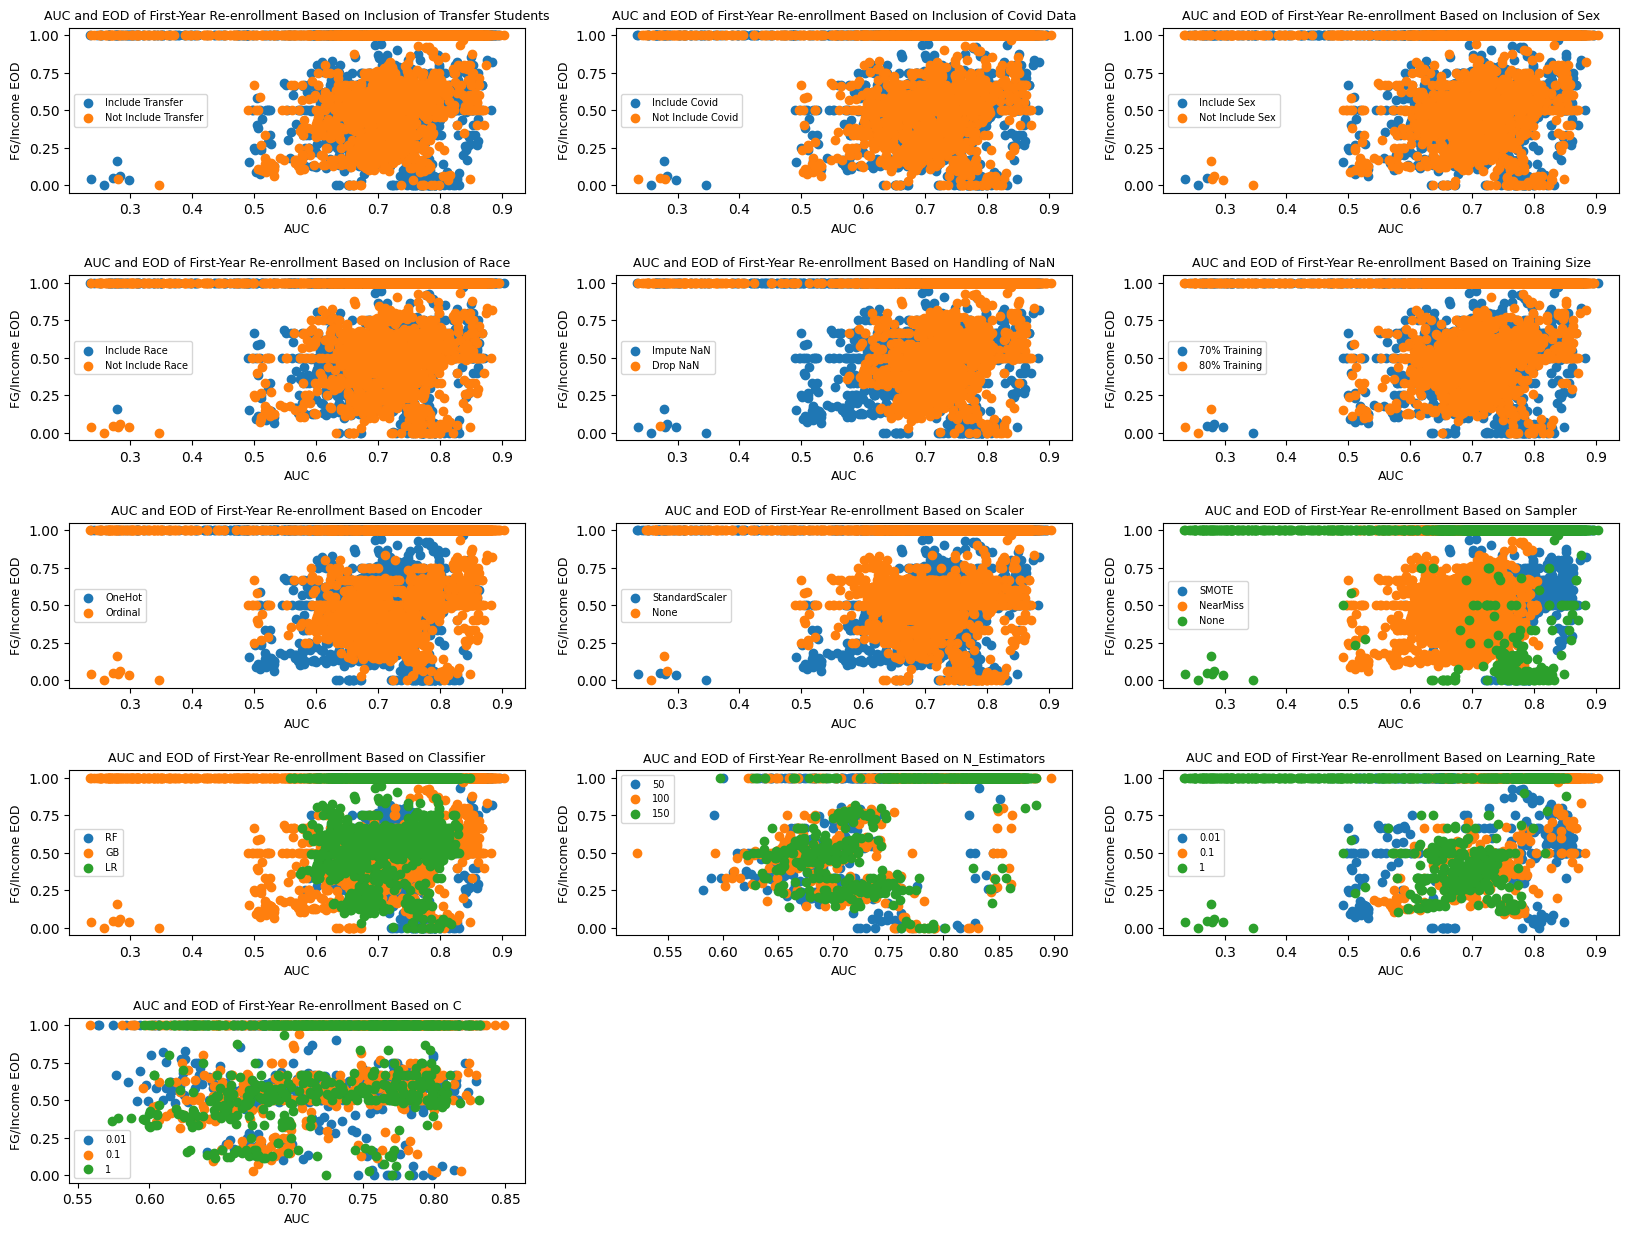

In [354]:
reenroll_good = reenroll_multiverse
# Creating the subplots for AUC graph
fig, ax = plt.subplots(5, 3, figsize=(20,15))
plt.subplots_adjust(hspace=0.5)
fig.delaxes(ax[4, 1])
fig.delaxes(ax[4, 2])

# Plot Transfer
include_transfer = reenroll_good[reenroll_good['Include_Transfer'] == 1]
not_include_transfer = reenroll_good[reenroll_good['Include_Transfer'] == 0]

ax[0, 0].scatter(include_transfer['AUC'], include_transfer['Equalized_Odds_Difference_FG/Income'], label='Include Transfer')
ax[0, 0].scatter(not_include_transfer['AUC'], not_include_transfer['Equalized_Odds_Difference_FG/Income'],label='Not Include Transfer')

ax[0, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on Inclusion of Transfer Students", fontsize=9)
ax[0, 0].set_xlabel("AUC", fontsize=9)
ax[0, 0].set_ylabel("FG/Income EOD", fontsize=9)
ax[0, 0].legend(fontsize=7)

# Plot Covid
include_covid = reenroll_good[reenroll_good['Include_Covid'] == 1]
not_include_covid = reenroll_good[reenroll_good['Include_Covid'] == 0]

ax[0, 1].scatter(include_covid['AUC'], include_covid['Equalized_Odds_Difference_FG/Income'],  label='Include Covid')
ax[0, 1].scatter(not_include_covid['AUC'], not_include_covid['Equalized_Odds_Difference_FG/Income'], label='Not Include Covid')

ax[0, 1].set_title("AUC and EOD of First-Year Re-enrollment Based on Inclusion of Covid Data", fontsize=9)
ax[0, 1].set_xlabel("AUC", fontsize=9)
ax[0, 1].set_ylabel("FG/Income EOD", fontsize=9)
ax[0, 1].legend(fontsize=7)


# # Plot Sex
include_sex = reenroll_good[reenroll_good['Include_Sex'] == 1]
not_include_sex = reenroll_good[reenroll_good['Include_Sex'] == 0]

ax[0, 2].scatter(include_sex['AUC'], include_sex['Equalized_Odds_Difference_FG/Income'],label='Include Sex')
ax[0, 2].scatter(not_include_sex['AUC'], not_include_sex['Equalized_Odds_Difference_FG/Income'], label='Not Include Sex')

ax[0, 2].set_title("AUC and EOD of First-Year Re-enrollment Based on Inclusion of Sex", fontsize=9)
ax[0, 2].set_xlabel("AUC", fontsize=9)
ax[0, 2].set_ylabel("FG/Income EOD", fontsize=9)
ax[0, 2].legend(fontsize=7)

# # Plot Race
include_race = reenroll_good[reenroll_good['Include_Race'] == 1]
not_include_race = reenroll_good[reenroll_good['Include_Race'] == 0]

ax[1, 0].scatter(include_race['AUC'], include_race['Equalized_Odds_Difference_FG/Income'], label='Include Race')
ax[1, 0].scatter(not_include_race['AUC'], not_include_race['Equalized_Odds_Difference_FG/Income'],label='Not Include Race')

ax[1, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on Inclusion of Race", fontsize=9)
ax[1, 0].set_xlabel("AUC", fontsize=9)
ax[1, 0].set_ylabel("FG/Income EOD", fontsize=9)
ax[1, 0].legend(fontsize=7)


# # Plot Handle Nan
impute_nan = reenroll_good[reenroll_good['Handle_Nan'] == "Impute"]
drop_nan = reenroll_good[reenroll_good['Handle_Nan'] == "Drop"]

ax[1, 1].scatter(impute_nan['AUC'], impute_nan['Equalized_Odds_Difference_FG/Income'],  label='Impute NaN')
ax[1, 1].scatter(drop_nan['AUC'], drop_nan['Equalized_Odds_Difference_FG/Income'], label='Drop NaN')

ax[1, 1].set_title("AUC and EOD of First-Year Re-enrollment Based on Handling of NaN", fontsize=9)
ax[1, 1].set_xlabel("AUC", fontsize=9)
ax[1, 1].set_ylabel("FG/Income EOD", fontsize=9)
ax[1, 1].legend(fontsize=7)


# # Plot Train Size
train_07 = reenroll_good[reenroll_good['Train_Size'] == 0.7]
train_08 = reenroll_good[reenroll_good['Train_Size'] == 0.8]

ax[1, 2].scatter(train_07['AUC'], train_07['Equalized_Odds_Difference_FG/Income'], label='70% Training')
ax[1, 2].scatter(train_08['AUC'], train_08['Equalized_Odds_Difference_FG/Income'],  label='80% Training')

ax[1, 2].set_title("AUC and EOD of First-Year Re-enrollment Based on Training Size", fontsize=9)
ax[1, 2].set_xlabel("AUC", fontsize=9)
ax[1, 2].set_ylabel("FG/Income EOD", fontsize=9)
ax[1, 2].legend(fontsize=7)



# # Plot Encoder
onehot = reenroll_good[reenroll_good['Encoder'] == "OneHotEncoder"]
ordinal = reenroll_good[reenroll_good['Encoder'] == "OrdinalEncoder"]

ax[2, 0].scatter(onehot['AUC'], onehot['Equalized_Odds_Difference_FG/Income'], label='OneHot')
ax[2, 0].scatter(ordinal['AUC'], ordinal['Equalized_Odds_Difference_FG/Income'],  label='Ordinal')

ax[2, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on Encoder", fontsize=9)
ax[2, 0].set_xlabel("AUC", fontsize=9)
ax[2, 0].set_ylabel("FG/Income EOD", fontsize=9)
ax[2, 0].legend(fontsize=7)


# # Plot Scaler
standard = reenroll_good[reenroll_good['Scaler'] == "StandardScaler"]
no_scaler = reenroll_good[reenroll_good['Scaler'].isna()]

ax[2, 1].scatter(standard['AUC'], standard['Equalized_Odds_Difference_FG/Income'],  label='StandardScaler')
ax[2, 1].scatter(no_scaler['AUC'], no_scaler['Equalized_Odds_Difference_FG/Income'],  label='None')

ax[2, 1].set_title("AUC and EOD of First-Year Re-enrollment Based on Scaler", fontsize=9)
ax[2, 1].set_xlabel("AUC", fontsize=9)
ax[2, 1].set_ylabel("FG/Income EOD", fontsize=9)
ax[2, 1].legend(fontsize=7)



# # Plot Sampler
smote = reenroll_good[reenroll_good['Sampler'] == "SMOTE"]
nearmiss = reenroll_good[reenroll_good['Sampler'] == "NearMiss"]
no_sampler = reenroll_good[reenroll_good['Sampler'].isna()]

ax[2, 2].scatter(smote['AUC'], smote['Equalized_Odds_Difference_FG/Income'], label='SMOTE')
ax[2, 2].scatter(nearmiss['AUC'], nearmiss['Equalized_Odds_Difference_FG/Income'], label='NearMiss')
ax[2, 2].scatter(no_sampler['AUC'], no_sampler['Equalized_Odds_Difference_FG/Income'],  label='None')

ax[2, 2].set_title("AUC and EOD of First-Year Re-enrollment Based on Sampler", fontsize=9)
ax[2, 2].set_xlabel("AUC", fontsize=9)
ax[2, 2].set_ylabel("FG/Income EOD", fontsize=9)
ax[2, 2].legend(fontsize=7)



# # Plot Classifier
randomforest = reenroll_good[reenroll_good['Classifier'] == "RandomForestClassifier"]
gradientboost = reenroll_good[reenroll_good['Classifier'] == "GradientBoostingClassifier"]
logisticregression = reenroll_good[reenroll_good['Classifier'] == "LogisticRegression"]

ax[3, 0].scatter(randomforest['AUC'], randomforest['Equalized_Odds_Difference_FG/Income'], label='RF')
ax[3, 0].scatter(gradientboost['AUC'], gradientboost['Equalized_Odds_Difference_FG/Income'], label='GB')
ax[3, 0].scatter(logisticregression['AUC'], logisticregression['Equalized_Odds_Difference_FG/Income'],  label='LR')

ax[3, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on Classifier", fontsize=9)
ax[3, 0].set_xlabel("AUC", fontsize=9)
ax[3, 0].set_ylabel("FG/Income EOD", fontsize=9)
ax[3, 0].legend(fontsize=7)


# # Plot N_Estimators
fifty = reenroll_good[reenroll_good['N_Estimators'] == 50]
onehundred = reenroll_good[reenroll_good['N_Estimators'] == 100]
onefifty = reenroll_good[reenroll_good['N_Estimators'] == 150]

ax[3, 1].scatter(fifty['AUC'], fifty['Equalized_Odds_Difference_FG/Income'], label='50')
ax[3, 1].scatter(onehundred['AUC'], onehundred['Equalized_Odds_Difference_FG/Income'], label='100')
ax[3, 1].scatter(onefifty['AUC'], onefifty['Equalized_Odds_Difference_FG/Income'], label='150')

ax[3, 1].set_title("AUC and EOD of First-Year Re-enrollment Based on N_Estimators", fontsize=9)
ax[3, 1].set_xlabel("AUC", fontsize=9)
ax[3, 1].set_ylabel("FG/Income EOD", fontsize=9)
ax[3, 1].legend(fontsize=7)

# # Plot Learning Rate
rate_001 = reenroll_good[reenroll_good['Learning_Rate'] == 0.01]
rate_01 = reenroll_good[reenroll_good['Learning_Rate'] == 0.1]
rate_1 = reenroll_good[reenroll_good['Learning_Rate'] == 1]

ax[3, 2].scatter(rate_001['AUC'], rate_001['Equalized_Odds_Difference_FG/Income'],  label='0.01')
ax[3, 2].scatter(rate_01['AUC'], rate_01['Equalized_Odds_Difference_FG/Income'],  label='0.1')
ax[3, 2].scatter(rate_1['AUC'], rate_1['Equalized_Odds_Difference_FG/Income'], label='1')

ax[3, 2].set_title("AUC and EOD of First-Year Re-enrollment Based on Learning_Rate", fontsize=9)
ax[3, 2].set_xlabel("AUC", fontsize=9)
ax[3, 2].set_ylabel("FG/Income EOD", fontsize=9)
ax[3, 2].legend(fontsize=7)


# # Plot C
c_001 = reenroll_good[reenroll_good['C'] == 0.01]
c_01 = reenroll_good[reenroll_good['C'] == 0.1]
c_1 = reenroll_good[reenroll_good['C'] == 1]

ax[4, 0].scatter(c_001['AUC'], c_001['Equalized_Odds_Difference_FG/Income'], label='0.01')
ax[4, 0].scatter(c_01['AUC'], c_01['Equalized_Odds_Difference_FG/Income'], label='0.1')
ax[4, 0].scatter(c_1['AUC'], c_1['Equalized_Odds_Difference_FG/Income'], label='1')

ax[4, 0].set_title("AUC and EOD of First-Year Re-enrollment Based on C", fontsize=9)
ax[4, 0].set_xlabel("AUC", fontsize=9)
ax[4, 0].set_ylabel("FG/Income EOD", fontsize=9)
ax[4, 0].legend(fontsize=7)


fig.savefig("graphs/AUC&FG_Income_Re-Enroll.png")

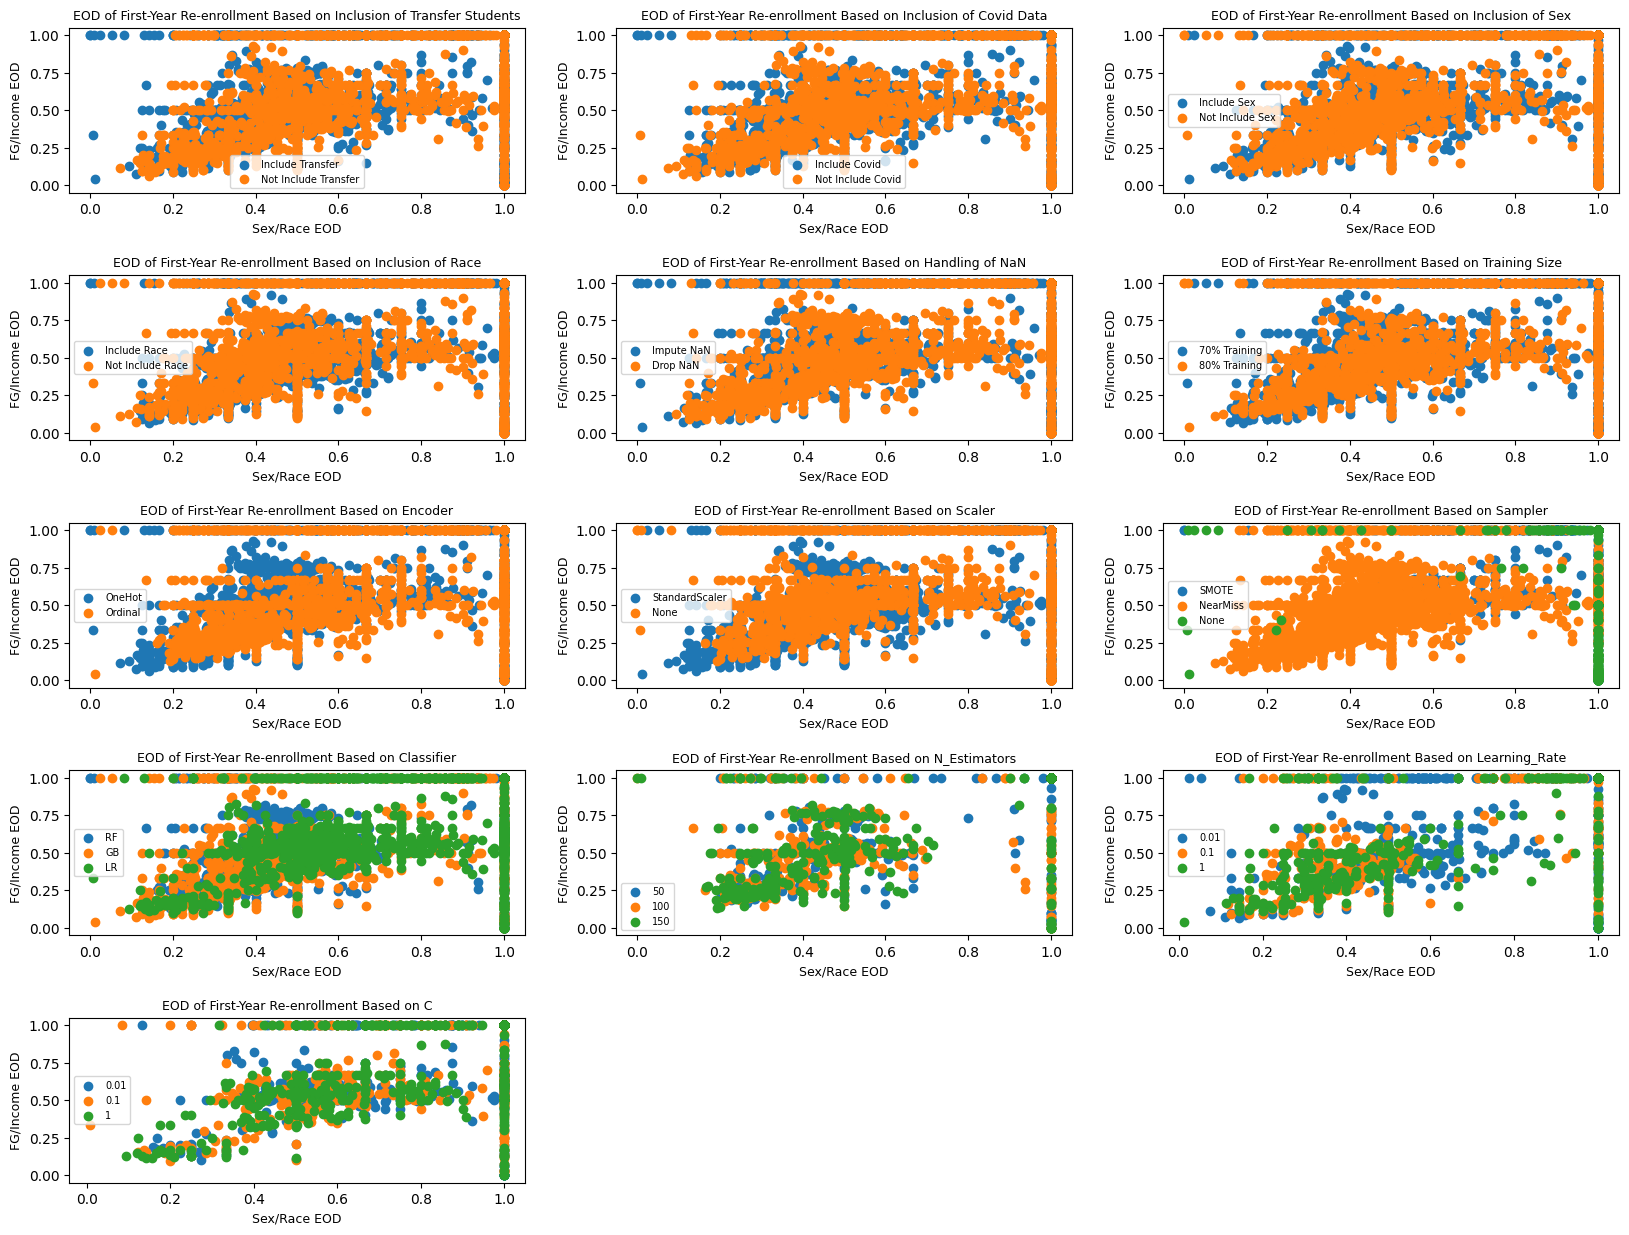

In [355]:
reenroll_good = reenroll_multiverse
# Creating the subplots for AUC graph
fig, ax = plt.subplots(5, 3, figsize=(20,15))
plt.subplots_adjust(hspace=0.5)
fig.delaxes(ax[4, 1])
fig.delaxes(ax[4, 2])

# Plot Transfer
include_transfer = reenroll_good[reenroll_good['Include_Transfer'] == 1]
not_include_transfer = reenroll_good[reenroll_good['Include_Transfer'] == 0]

ax[0, 0].scatter(include_transfer['Equalized_Odds_Difference_Sex/Race'], include_transfer['Equalized_Odds_Difference_FG/Income'], label='Include Transfer')
ax[0, 0].scatter(not_include_transfer['Equalized_Odds_Difference_Sex/Race'], not_include_transfer['Equalized_Odds_Difference_FG/Income'],label='Not Include Transfer')

ax[0, 0].set_title("EOD of First-Year Re-enrollment Based on Inclusion of Transfer Students", fontsize=9)
ax[0, 0].set_xlabel("Sex/Race EOD", fontsize=9)
ax[0, 0].set_ylabel("FG/Income EOD", fontsize=9)
ax[0, 0].legend(fontsize=7)

# Plot Covid
include_covid = reenroll_good[reenroll_good['Include_Covid'] == 1]
not_include_covid = reenroll_good[reenroll_good['Include_Covid'] == 0]

ax[0, 1].scatter(include_covid['Equalized_Odds_Difference_Sex/Race'], include_covid['Equalized_Odds_Difference_FG/Income'],  label='Include Covid')
ax[0, 1].scatter(not_include_covid['Equalized_Odds_Difference_Sex/Race'], not_include_covid['Equalized_Odds_Difference_FG/Income'], label='Not Include Covid')

ax[0, 1].set_title("EOD of First-Year Re-enrollment Based on Inclusion of Covid Data", fontsize=9)
ax[0, 1].set_xlabel("Sex/Race EOD", fontsize=9)
ax[0, 1].set_ylabel("FG/Income EOD", fontsize=9)
ax[0, 1].legend(fontsize=7)


# # Plot Sex
include_sex = reenroll_good[reenroll_good['Include_Sex'] == 1]
not_include_sex = reenroll_good[reenroll_good['Include_Sex'] == 0]

ax[0, 2].scatter(include_sex['Equalized_Odds_Difference_Sex/Race'], include_sex['Equalized_Odds_Difference_FG/Income'],label='Include Sex')
ax[0, 2].scatter(not_include_sex['Equalized_Odds_Difference_Sex/Race'], not_include_sex['Equalized_Odds_Difference_FG/Income'], label='Not Include Sex')

ax[0, 2].set_title("EOD of First-Year Re-enrollment Based on Inclusion of Sex", fontsize=9)
ax[0, 2].set_xlabel("Sex/Race EOD", fontsize=9)
ax[0, 2].set_ylabel("FG/Income EOD", fontsize=9)
ax[0, 2].legend(fontsize=7)

# # Plot Race
include_race = reenroll_good[reenroll_good['Include_Race'] == 1]
not_include_race = reenroll_good[reenroll_good['Include_Race'] == 0]

ax[1, 0].scatter(include_race['Equalized_Odds_Difference_Sex/Race'], include_race['Equalized_Odds_Difference_FG/Income'], label='Include Race')
ax[1, 0].scatter(not_include_race['Equalized_Odds_Difference_Sex/Race'], not_include_race['Equalized_Odds_Difference_FG/Income'],label='Not Include Race')

ax[1, 0].set_title("EOD of First-Year Re-enrollment Based on Inclusion of Race", fontsize=9)
ax[1, 0].set_xlabel("Sex/Race EOD", fontsize=9)
ax[1, 0].set_ylabel("FG/Income EOD", fontsize=9)
ax[1, 0].legend(fontsize=7)


# # Plot Handle Nan
impute_nan = reenroll_good[reenroll_good['Handle_Nan'] == "Impute"]
drop_nan = reenroll_good[reenroll_good['Handle_Nan'] == "Drop"]

ax[1, 1].scatter(impute_nan['Equalized_Odds_Difference_Sex/Race'], impute_nan['Equalized_Odds_Difference_FG/Income'],  label='Impute NaN')
ax[1, 1].scatter(drop_nan['Equalized_Odds_Difference_Sex/Race'], drop_nan['Equalized_Odds_Difference_FG/Income'], label='Drop NaN')

ax[1, 1].set_title("EOD of First-Year Re-enrollment Based on Handling of NaN", fontsize=9)
ax[1, 1].set_xlabel("Sex/Race EOD", fontsize=9)
ax[1, 1].set_ylabel("FG/Income EOD", fontsize=9)
ax[1, 1].legend(fontsize=7)


# # Plot Train Size
train_07 = reenroll_good[reenroll_good['Train_Size'] == 0.7]
train_08 = reenroll_good[reenroll_good['Train_Size'] == 0.8]

ax[1, 2].scatter(train_07['Equalized_Odds_Difference_Sex/Race'], train_07['Equalized_Odds_Difference_FG/Income'], label='70% Training')
ax[1, 2].scatter(train_08['Equalized_Odds_Difference_Sex/Race'], train_08['Equalized_Odds_Difference_FG/Income'],  label='80% Training')

ax[1, 2].set_title("EOD of First-Year Re-enrollment Based on Training Size", fontsize=9)
ax[1, 2].set_xlabel("Sex/Race EOD", fontsize=9)
ax[1, 2].set_ylabel("FG/Income EOD", fontsize=9)
ax[1, 2].legend(fontsize=7)



# # Plot Encoder
onehot = reenroll_good[reenroll_good['Encoder'] == "OneHotEncoder"]
ordinal = reenroll_good[reenroll_good['Encoder'] == "OrdinalEncoder"]

ax[2, 0].scatter(onehot['Equalized_Odds_Difference_Sex/Race'], onehot['Equalized_Odds_Difference_FG/Income'], label='OneHot')
ax[2, 0].scatter(ordinal['Equalized_Odds_Difference_Sex/Race'], ordinal['Equalized_Odds_Difference_FG/Income'],  label='Ordinal')

ax[2, 0].set_title("EOD of First-Year Re-enrollment Based on Encoder", fontsize=9)
ax[2, 0].set_xlabel("Sex/Race EOD", fontsize=9)
ax[2, 0].set_ylabel("FG/Income EOD", fontsize=9)
ax[2, 0].legend(fontsize=7)


# # Plot Scaler
standard = reenroll_good[reenroll_good['Scaler'] == "StandardScaler"]
no_scaler = reenroll_good[reenroll_good['Scaler'].isna()]

ax[2, 1].scatter(standard['Equalized_Odds_Difference_Sex/Race'], standard['Equalized_Odds_Difference_FG/Income'],  label='StandardScaler')
ax[2, 1].scatter(no_scaler['Equalized_Odds_Difference_Sex/Race'], no_scaler['Equalized_Odds_Difference_FG/Income'],  label='None')

ax[2, 1].set_title("EOD of First-Year Re-enrollment Based on Scaler", fontsize=9)
ax[2, 1].set_xlabel("Sex/Race EOD", fontsize=9)
ax[2, 1].set_ylabel("FG/Income EOD", fontsize=9)
ax[2, 1].legend(fontsize=7)



# # Plot Sampler
smote = reenroll_good[reenroll_good['Sampler'] == "SMOTE"]
nearmiss = reenroll_good[reenroll_good['Sampler'] == "NearMiss"]
no_sampler = reenroll_good[reenroll_good['Sampler'].isna()]

ax[2, 2].scatter(smote['Equalized_Odds_Difference_Sex/Race'], smote['Equalized_Odds_Difference_FG/Income'], label='SMOTE')
ax[2, 2].scatter(nearmiss['Equalized_Odds_Difference_Sex/Race'], nearmiss['Equalized_Odds_Difference_FG/Income'], label='NearMiss')
ax[2, 2].scatter(no_sampler['Equalized_Odds_Difference_Sex/Race'], no_sampler['Equalized_Odds_Difference_FG/Income'],  label='None')

ax[2, 2].set_title("EOD of First-Year Re-enrollment Based on Sampler", fontsize=9)
ax[2, 2].set_xlabel("Sex/Race EOD", fontsize=9)
ax[2, 2].set_ylabel("FG/Income EOD", fontsize=9)
ax[2, 2].legend(fontsize=7)



# # Plot Classifier
randomforest = reenroll_good[reenroll_good['Classifier'] == "RandomForestClassifier"]
gradientboost = reenroll_good[reenroll_good['Classifier'] == "GradientBoostingClassifier"]
logisticregression = reenroll_good[reenroll_good['Classifier'] == "LogisticRegression"]

ax[3, 0].scatter(randomforest['Equalized_Odds_Difference_Sex/Race'], randomforest['Equalized_Odds_Difference_FG/Income'], label='RF')
ax[3, 0].scatter(gradientboost['Equalized_Odds_Difference_Sex/Race'], gradientboost['Equalized_Odds_Difference_FG/Income'], label='GB')
ax[3, 0].scatter(logisticregression['Equalized_Odds_Difference_Sex/Race'], logisticregression['Equalized_Odds_Difference_FG/Income'],  label='LR')

ax[3, 0].set_title("EOD of First-Year Re-enrollment Based on Classifier", fontsize=9)
ax[3, 0].set_xlabel("Sex/Race EOD", fontsize=9)
ax[3, 0].set_ylabel("FG/Income EOD", fontsize=9)
ax[3, 0].legend(fontsize=7)


# # Plot N_Estimators
fifty = reenroll_good[reenroll_good['N_Estimators'] == 50]
onehundred = reenroll_good[reenroll_good['N_Estimators'] == 100]
onefifty = reenroll_good[reenroll_good['N_Estimators'] == 150]

ax[3, 1].scatter(fifty['Equalized_Odds_Difference_Sex/Race'], fifty['Equalized_Odds_Difference_FG/Income'], label='50')
ax[3, 1].scatter(onehundred['Equalized_Odds_Difference_Sex/Race'], onehundred['Equalized_Odds_Difference_FG/Income'], label='100')
ax[3, 1].scatter(onefifty['Equalized_Odds_Difference_Sex/Race'], onefifty['Equalized_Odds_Difference_FG/Income'], label='150')

ax[3, 1].set_title("EOD of First-Year Re-enrollment Based on N_Estimators", fontsize=9)
ax[3, 1].set_xlabel("Sex/Race EOD", fontsize=9)
ax[3, 1].set_ylabel("FG/Income EOD", fontsize=9)
ax[3, 1].legend(fontsize=7)

# # Plot Learning Rate
rate_001 = reenroll_good[reenroll_good['Learning_Rate'] == 0.01]
rate_01 = reenroll_good[reenroll_good['Learning_Rate'] == 0.1]
rate_1 = reenroll_good[reenroll_good['Learning_Rate'] == 1]

ax[3, 2].scatter(rate_001['Equalized_Odds_Difference_Sex/Race'], rate_001['Equalized_Odds_Difference_FG/Income'],  label='0.01')
ax[3, 2].scatter(rate_01['Equalized_Odds_Difference_Sex/Race'], rate_01['Equalized_Odds_Difference_FG/Income'],  label='0.1')
ax[3, 2].scatter(rate_1['Equalized_Odds_Difference_Sex/Race'], rate_1['Equalized_Odds_Difference_FG/Income'], label='1')

ax[3, 2].set_title("EOD of First-Year Re-enrollment Based on Learning_Rate", fontsize=9)
ax[3, 2].set_xlabel("Sex/Race EOD", fontsize=9)
ax[3, 2].set_ylabel("FG/Income EOD", fontsize=9)
ax[3, 2].legend(fontsize=7)


# # Plot C
c_001 = reenroll_good[reenroll_good['C'] == 0.01]
c_01 = reenroll_good[reenroll_good['C'] == 0.1]
c_1 = reenroll_good[reenroll_good['C'] == 1]

ax[4, 0].scatter(c_001['Equalized_Odds_Difference_Sex/Race'], c_001['Equalized_Odds_Difference_FG/Income'], label='0.01')
ax[4, 0].scatter(c_01['Equalized_Odds_Difference_Sex/Race'], c_01['Equalized_Odds_Difference_FG/Income'], label='0.1')
ax[4, 0].scatter(c_1['Equalized_Odds_Difference_Sex/Race'], c_1['Equalized_Odds_Difference_FG/Income'], label='1')

ax[4, 0].set_title("EOD of First-Year Re-enrollment Based on C", fontsize=9)
ax[4, 0].set_xlabel("Sex/Race EOD", fontsize=9)
ax[4, 0].set_ylabel("FG/Income EOD", fontsize=9)
ax[4, 0].legend(fontsize=7)


fig.savefig("graphs/Sex_Race&FG_Income_Re-Enroll.png")

In [322]:
# reenroll_sort_sex = reenroll_multiverse.sort_values('Equalized_Odds_Difference_Sex', ascending=True)
# reenroll_sex = reenroll_sort_sex['Equalized_Odds_Difference_Sex']
# plt.title('Equalized Odds Difference of Sex for Reenrollment vs Specification')
# plt.plot(num, reenroll_sex)

In [323]:
# reenroll_sort_race = reenroll_multiverse.sort_values('Equalized_Odds_Difference_Race', ascending=True)
# reenroll_race = reenroll_sort_race['Equalized_Odds_Difference_Race']
# plt.title('Equalized Odds Difference of Race for Reenrollment vs Specification')
# plt.plot(num, reenroll_race)

In [324]:
# graduation_multiverse = pd.read_csv('graduation_multiverse.csv', low_memory=False)
# graduation_sort_auc4 = graduation_multiverse.sort_values('AUC_Graduated_In_4', ascending=True)
# graduation_auc4 = graduation_sort_auc4['AUC_Graduated_In_4']
# num = np.arange(1, len(graduation_multiverse) + 1)
# plt.title('AUC of Graduated in 4 Years v.s. Specification')
# plt.plot(num, graduation_auc4)
# # print(reenroll_multiverse)

In [325]:
# graduation_multiverse = pd.read_csv('graduation_multiverse.csv', low_memory=False)
# graduation_sort_auc6 = graduation_multiverse.sort_values('AUC_Graduated_In_6', ascending=True)
# graduation_auc6 = graduation_sort_auc6['AUC_Graduated_In_6']
# num = np.arange(1, len(graduation_multiverse) + 1)
# plt.title('AUC of Graduated in 6 Years v.s. Specification')
# plt.plot(num, graduation_auc6)
# # print(reenroll_multiverse)

In [326]:
# graduation_multiverse = pd.read_csv('graduation_multiverse.csv', low_memory=False)
# graduation_sort_sex4 = graduation_multiverse.sort_values('Equalized_Odds_Difference_Sex_4', ascending=True)
# graduation_sex4 = graduation_sort_sex4['Equalized_Odds_Difference_Sex_4']
# num = np.arange(1, len(graduation_multiverse) + 1)
# plt.title('Equalized Odds Difference of Sex of Graduated in 4 Years v.s. Specification')
# plt.plot(num, graduation_sex4)
# # print(reenroll_multiverse)

In [327]:
# graduation_multiverse = pd.read_csv('graduation_multiverse.csv', low_memory=False)
# graduation_sort_sex6 = graduation_multiverse.sort_values('Equalized_Odds_Difference_Sex_6', ascending=True)
# graduation_sex6 = graduation_sort_sex6['Equalized_Odds_Difference_Sex_6']
# num = np.arange(1, len(graduation_multiverse) + 1)
# plt.title('Equalized Odds Difference of Sex of Graduated in 6 Years v.s. Specification')
# plt.plot(num, graduation_sex6)
# # print(reenroll_multiverse)

In [328]:
# graduation_multiverse = pd.read_csv('graduation_multiverse.csv', low_memory=False)
# graduation_sort_race4 = graduation_multiverse.sort_values('Equalized_Odds_Difference_Race_4', ascending=True)
# graduation_race4 = graduation_sort_race4['Equalized_Odds_Difference_Race_4']
# num = np.arange(1, len(graduation_multiverse) + 1)
# plt.title('Equalized Odds Difference of Race of Graduated in 4 Years v.s. Specification')
# plt.plot(num, graduation_race4)
# # print(reenroll_multiverse)

In [329]:
# graduation_multiverse = pd.read_csv('graduation_multiverse.csv', low_memory=False)
# graduation_sort_race6 = graduation_multiverse.sort_values('Equalized_Odds_Difference_Race_6', ascending=True)
# graduation_race6 = graduation_sort_race6['Equalized_Odds_Difference_Race_6']
# num = np.arange(1, len(graduation_multiverse) + 1)
# plt.title('Equalized Odds Difference of Race of Graduated in 6 Years v.s. Specification')
# plt.plot(num, graduation_race6)
# # print(reenroll_multiverse)

In [330]:
# import matplotlib.pyplot as plt

# # Data
# col1 = ['a', 'b', 'c', 'a', 'c']
# col2 = ['x', 'y', 'z', 'y', 'x']

# # Combine the values from both columns, but keep them grouped
# values = ['a', 'b', 'c', 'x', 'y', 'z']

# # Create the y-axis positions for each value, keeping them close together
# y_positions = [5, 4.5, 4, 2, 1.5, 1]  # col1 values closer together, col2 values closer together

# # Create a mapping of value to y position for plotting
# value_index_map = {value: pos for value, pos in zip(values, y_positions)}

# # Example indices where values occur
# ind = [0, 1, 2, 3, 5]  # these are the indices on x-axis where col1 values are found

# # Create the figure and axis
# fig, ax = plt.subplots(figsize=(8, 6))

# # Plot the dots for each column
# ax.scatter(ind, [value_index_map[val] for val in col1], color='blue', label='col1')
# ax.scatter(ind, [value_index_map[val] for val in col2], color='green', label='col2')

# # Set y-ticks and labels
# ax.set_yticks(y_positions)
# ax.set_yticklabels(values)

# # Add group labels for Col 1 and Col 2
# ax.text(-0.5, 5.25, 'Col 1', fontsize=14, weight='bold', ha='center')
# ax.text(-0.5, 2.25, 'Col 2', fontsize=14, weight='bold', ha='center')

# # Set labels and title
# ax.set_xlabel('Index')
# ax.set_title('Horizontal Dot Plot with Two Columns')


# # Show the plot
# plt.legend()
# plt.show()







